In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Approach 1: Top Down (Average Team Stats and attach to the Match Data) 

## Load in and Prepare the Player Data

In [2]:
#Load in the player data
df_players = pd.read_csv('../data/PlayerData_v1.csv',index_col=0)
df_players

Player Position   T  Ti50  PA  DHPA  S  CDOOO  CDL  CDL%  \
0             Joel Corey      MID  12     0  24    11  0      0    0   0.0   
1         Michael Barlow      MID  11     3  27    14  2      0    0   0.0   
2           Jimmy Bartel      MID   8     1  17     9  1      0    0   0.0   
3           Paul Chapman      FWD   8     3  20     5  2      0    0   0.0   
4            Chris Mayne      FWD   8     4  19     8  0      0    0   0.0   
...                  ...      ...  ..   ...  ..   ... ..    ...  ...   ...   
111116        Bobby Hill      FWD   1     0  17     1  0      0    0   0.0   
111117        Bobby Hill      FWD   4     1  13     3  1      0    0   0.0   
111118        Bobby Hill      FWD   3     1  22    11  0      0    0   0.0   
111119        Bobby Hill      FWD   4     0  17     9  1      0    0   0.0   
111120  Angus Litherland      DEF   3     0   8     7  5      1    0   0.0   

        ...  SI SL  CC  SC  HTA  HTW%  HTA%  RC           lPlayer  \
0       ...   3  1   2   2    0   0.0   0.0   0        joel corey   
1       ...   4  0   1   1    0   0.0   0.0   0    michael barlow   
2       ...   4  0   1   4    0   0.0   0.0   0      jimmy bartel   
3       ...   3  1   1   3    0   0.0   0.0   0      paul chapman   
4       ...   2  1   0   0    0   0.0   0.0   0       chris mayne   
...     ...  .. ..  ..  ..  ...   ...   ...  ..               ...   
111116  ...   5  1   1   1    0   0.0   0.0   0        bobby hill   
111117  ...   2  1   0   0    0   0.0   0.0   0        bobby hill   
111118  ...   5  0   0   0    0   0.0   0.0   0        bobby hill   
111119  ...   4  0   0   0    0   0.0   0.0   0        bobby hill   
111120  ...   2  1   0   0    0   0.0   0.0   0  angus litherland   

                          Team  
0                      Geelong  
1                    Fremantle  
2                      Geelong  
3                      Geelong  
4                    Fremantle  
...                        ...  
111116  Greater Western Sydney  
111117  Greater Western Sydney  
111118  Greater Western Sydney  
111119  Greater Western Sydney  
111120              West Coast  

[109919 rows x 56 columns]

In [3]:
#Remove the 'lPlayer' column, City and any rows with ToG% == 0 and pre 2024
df_players.drop('lPlayer',axis=1,inplace=True)
df_players = df_players[(df_players['ToG%']>0)&(df_players['Season']<2024)]

In [4]:
df_players

Player Position   T  Ti50  PA  DHPA  S  CDOOO  CDL  CDL%  \
0             Joel Corey      MID  12     0  24    11  0      0    0   0.0   
1         Michael Barlow      MID  11     3  27    14  2      0    0   0.0   
2           Jimmy Bartel      MID   8     1  17     9  1      0    0   0.0   
3           Paul Chapman      FWD   8     3  20     5  2      0    0   0.0   
4            Chris Mayne      FWD   8     4  19     8  0      0    0   0.0   
...                  ...      ...  ..   ...  ..   ... ..    ...  ...   ...   
111116        Bobby Hill      FWD   1     0  17     1  0      0    0   0.0   
111117        Bobby Hill      FWD   4     1  13     3  1      0    0   0.0   
111118        Bobby Hill      FWD   3     1  22    11  0      0    0   0.0   
111119        Bobby Hill      FWD   4     0  17     9  1      0    0   0.0   
111120  Angus Litherland      DEF   3     0   8     7  5      1    0   0.0   

        ...  SAG SI  SL  CC  SC  HTA  HTW%  HTA%  RC                    Team  
0       ...    0  3   1   2   2    0   0.0   0.0   0                 Geelong  
1       ...    1  4   0   1   1    0   0.0   0.0   0               Fremantle  
2       ...    1  4   0   1   4    0   0.0   0.0   0                 Geelong  
3       ...    1  3   1   1   3    0   0.0   0.0   0                 Geelong  
4       ...    1  2   1   0   0    0   0.0   0.0   0               Fremantle  
...     ...  ... ..  ..  ..  ..  ...   ...   ...  ..                     ...  
111116  ...    1  5   1   1   1    0   0.0   0.0   0  Greater Western Sydney  
111117  ...    2  2   1   0   0    0   0.0   0.0   0  Greater Western Sydney  
111118  ...    1  5   0   0   0    0   0.0   0.0   0  Greater Western Sydney  
111119  ...    2  4   0   0   0    0   0.0   0.0   0  Greater Western Sydney  
111120  ...    0  2   1   0   0    0   0.0   0.0   0              West Coast  

[108537 rows x 55 columns]

In [5]:
#Remove plural 's' from 'Round' Column
df_players.loc[:,'Round'] = df_players['Round'].str.replace(r's$','',regex=True) 

In [6]:
df_players['Round'].unique()

array(['Finals Week 1', 'Grand Final', 'Preliminary Final', 'Round 10',
       'Round 11', 'Round 12', 'Round 13', 'Round 14', 'Round 15',
       'Round 16', 'Round 17', 'Round 18', 'Round 19', 'Round 1',
       'Round 20', 'Round 21', 'Round 22', 'Round 23', 'Round 2',
       'Round 3', 'Round 4', 'Round 5', 'Round 6', 'Round 7', 'Round 8',
       'Round 9', 'Semi Final', 'Round 24'], dtype=object)

## Load in and Prepare the Match Data

In [7]:
#Load in the match data
df_matches = pd.read_csv('../data/MatchData_v2.csv',index_col=0)
#Remove 'City'
df_matches.drop('City',axis=1,inplace=True)
#Covert weather data into floats
weather_cols = ['Max Temp (C)','Min Temp (C)','Max Humid (%)','Min Humid (%)','Wind Speed (m/s)',\
                'Solar Rad (MJ/sq m)','Rain (mm)']
df_matches[weather_cols] = df_matches[weather_cols].apply(pd.to_numeric,errors='coerce')

In [8]:
#Keep only pre 2024
df_matches = df_matches[df_matches['Season']<2024] 

In [9]:
df_matches['Round'].unique()

array(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 6',
       'Round 7', 'Round 8', 'Round 9', 'Round 10', 'Round 11',
       'Round 12', 'Round 13', 'Round 14', 'Round 15', 'Round 16',
       'Round 17', 'Round 18', 'Round 19', 'Round 20', 'Round 21',
       'Round 22', 'Round 23', 'Qualifying Final', 'Elimination Final',
       'Semi Final', 'Preliminary Final', 'Grand Final', 'Round 24'],
      dtype=object)

In [10]:
#Commonise the 'Round' Column
df_matches.loc[(df_matches['Round']=='Qualifying Final')|(df_matches['Round']=='Elimination Final'),'Round'] = 'Finals Week 1'

## Aggregate player data and join onto the Match Data

In [11]:
#Extract only ther numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = list(df_players.select_dtypes(include=numerics).columns)
#Append Round and Team
num_cols.append('Round')
num_cols.append('Team')

In [12]:
#Keep only numeric and aggregation variables
df_play_num = df_players[num_cols]

## NOTE: May have to approach some values (such as num goals) with sum instead of mean

In [13]:
df_play_agg = df_play_num.groupby(['Season','Round','Team']).agg('mean').reset_index()

### Join to match data

In [14]:
#Join on team data
df_matches_v2 = df_matches.merge(df_play_agg,on=['Season','Round','Team'],how='left')
#Join on opponent data
df_matches_v2 = df_matches_v2.merge(df_play_agg,left_on=['Season','Round','Opponent'],right_on=['Season','Round','Team'],\
                                 how='left',suffixes=('_team','_opp'))
#Rename Team_team to Team and drop Team_opp
df_matches_v2.rename(columns={'Team_team':'Team'},inplace=True)
df_matches_v2.drop('Team_opp',axis=1,inplace=True)

In [15]:
#Rename Round for ease of sorting
round_dict = {'Finals Week 1':25,'Semi Final':26,'Preliminary Final':27,\
             'Grand Final':28}
#Define function to change values based on dict
def rename_round(x):
    if x in list(round_dict.keys()):
        return round_dict[x]
    else:
        return int(re.search(r'(\d+)',x)[0])

In [16]:
df_matches_v2

Team        Opponent  PointsF  PointsA  \
0     Greater Western Sydney          Sydney     37.0    100.0   
1                   Richmond         Carlton     81.0    125.0   
2                   Hawthorn     Collingwood    137.0    115.0   
3                  Melbourne  Brisbane Lions     78.0    119.0   
4                 Gold Coast        Adelaide     68.0    137.0   
...                      ...             ...      ...      ...   
4889                 Carlton       Melbourne     73.0     71.0   
4890  Greater Western Sydney   Port Adelaide     93.0     70.0   
4891  Greater Western Sydney     Collingwood     57.0     58.0   
4892                 Carlton  Brisbane Lions     63.0     79.0   
4893          Brisbane Lions     Collingwood     86.0     90.0   

                  Venue  Season              Round  Day         Date  \
0     Stadium Australia    2012            Round 1  Sat  24-Mar-2012   
1                M.C.G.    2012            Round 1  Thu  29-Mar-2012   
2                M.C.G.    2012            Round 1  Fri  30-Mar-2012   
3                M.C.G.    2012            Round 1  Sat  31-Mar-2012   
4               Carrara    2012            Round 1  Sat  31-Mar-2012   
...                 ...     ...                ...  ...          ...   
4889             M.C.G.    2023         Semi Final  Fri  15-Sep-2023   
4890      Adelaide Oval    2023         Semi Final  Sat  16-Sep-2023   
4891             M.C.G.    2023  Preliminary Final  Fri  22-Sep-2023   
4892              Gabba    2023  Preliminary Final  Sat  23-Sep-2023   
4893             M.C.G.    2023        Grand Final  Sat  30-Sep-2023   

      Attendance  ...    GA%_opp   SAG_opp    SI_opp    SL_opp    CC_opp  \
0        38203.0  ...  34.390909  1.409091  4.636364  1.272727  0.454545   
1        78285.0  ...  35.909091  1.545455  5.818182  1.545455  0.681818   
2        78466.0  ...  28.486364  1.727273  5.727273  1.500000  0.818182   
3        33473.0  ...  28.522727  1.500000  5.454545  1.454545  0.545455   
4        12790.0  ...  23.263636  1.863636  7.000000  1.909091  0.818182   
...          ...  ...        ...       ...       ...       ...       ...   
4889     96412.0  ...  13.863636  1.272727  4.363636  1.181818  0.363636   
4890     45520.0  ...  20.291304  1.130435  3.391304  1.086957  0.521739   
4891     97665.0  ...  15.939130  0.869565  3.000000  0.782609  0.478261   
4892     36012.0  ...  20.439130  1.043478  3.652174  1.043478  0.521739   
4893    100024.0  ...  23.191304  1.304348  5.000000  1.260870  0.434783   

        SC_opp   HTA_opp  HTW%_opp  HTA%_opp    RC_opp  
0     1.363636  0.409091  3.963636  6.213636  4.227273  
1     1.090909  0.227273  7.431818  1.513636  3.590909  
2     1.000000  0.454545  3.422727  2.972727  3.772727  
3     1.545455  0.545455  4.068182  2.677273  4.363636  
4     0.954545  0.545455  5.268182  2.700000  3.545455  
...        ...       ...       ...       ...       ...  
4889  1.272727  0.318182  4.109091  5.304545  3.636364  
4890  0.739130  0.086957  3.534783  0.956522  3.826087  
4891  1.434783  0.739130  4.221739  3.217391  4.000000  
4892  1.391304  0.608696  2.813043  1.600000  4.347826  
4893  1.217391  0.521739  4.039130  2.126087  4.652174  

[4894 rows x 120 columns]

In [17]:
#Apply changes to round names
df_matches_v2['RoundNum'] = df_matches_v2['Round'].apply(rename_round) 

In [18]:
#Sort Match data by Team, Season, Round
with pd.option_context('display.max_row',None):
    print(df_matches_v2.sort_values(['Team','Season','RoundNum'])[['Team','Season','Round']])

                        Team  Season              Round
2451                Adelaide    2012            Round 1
13                  Adelaide    2012            Round 2
2472                Adelaide    2012            Round 3
30                  Adelaide    2012            Round 4
44                  Adelaide    2012            Round 5
2496                Adelaide    2012            Round 6
55                  Adelaide    2012            Round 7
2517                Adelaide    2012            Round 8
76                  Adelaide    2012            Round 9
2531                Adelaide    2012           Round 10
97                  Adelaide    2012           Round 12
2554                Adelaide    2012           Round 13
110                 Adelaide    2012           Round 14
2568                Adelaide    2012           Round 15
2579                Adelaide    2012           Round 16
137                 Adelaide    2012           Round 17
2592                Adelaide    2012           R

In [19]:
df_matches_v2 = df_matches_v2.sort_values(['Team','Season','RoundNum'])

## Extract all columns with _team or _opp and attendacne and lag them by 3

In [20]:
df_team_stats = df_matches_v2.filter(regex=(".+_opp|.+_team"))
df_team_stats = pd.concat([df_team_stats,df_matches_v2['Attendance']],axis=1)

In [21]:
#Try the last 3 matches as predictors
num_lags = 3
for i in range(num_lags):
    #Lag the stats
    df_team_temp = df_team_stats.shift(i+1)
    #Get the column names
    cols = df_team_temp.columns.to_list()
    #Define new column names with lag number as suffix
    new_cols = [col+str(i+1) for col in cols]
    df_team_temp.columns = new_cols
    #Concatenate with the match data
    df_matches_v2 = pd.concat([df_matches_v2,df_team_temp],axis=1)

In [22]:
#Remove the present match stats from the dataframe
present_cols = df_matches_v2.filter(regex=(".+_opp$|.+_team$")).columns.to_list()
#add Attendance to the list
present_cols.append('Attendance')
#Drop from the data
df_matches_v2.drop(present_cols,axis=1,inplace=True)

In [23]:
#Remove 2012 Round 1-3 to remove NAN values
df_matches_v3 = df_matches_v2[~((df_matches_v2['Season']==2012)&(df_matches_v2['Round'].isin(['Round 1','Round 2','Round 3'])))]

## Check and impute missing values

In [24]:
with pd.option_context('display.max_row',None):
    print(df_matches_v3.isna().sum())

Team                     0
Opponent                 0
PointsF                  0
PointsA                  0
Venue                    0
Season                   0
Round                    0
Day                      0
Date                     0
Outcome                  0
H/A                      0
oppH/A                   0
Rain (mm)               56
Max Temp (C)            64
Min Temp (C)            54
Max Humid (%)           44
Min Humid (%)           44
Wind Speed (m/s)        44
Solar Rad (MJ/sq m)     58
RoundNum                 0
T_team1                  0
Ti50_team1               0
PA_team1                 0
DHPA_team1               0
S_team1                  0
CDOOO_team1              0
CDL_team1                0
CDL%_team1               0
D_team1                  0
K_team1                  0
H_team1                  0
i50s_team1               0
DE%_team1                0
C_team1                  0
R50s_team1               0
EK_team1                 0
KE%_team1                0
K

We have seen previously that missing attendance is associated with the COVID period. We will set the missings to 0. As for missing weather information, we will assume 0 rainfall and impute with average values in the others.

In [25]:
#Fill na with 0 for Rain (mm) and Attendance
df_matches_v3.loc[:,['Rain (mm)','Attendance1','Attendance2','Attendance3']] = df_matches_v3[['Rain (mm)','Attendance1','Attendance2','Attendance3']].fillna(0.0)
#Fill remaining with means
impute_cols = ['Max Temp (C)','Min Temp (C)','Max Humid (%)','Min Humid (%)','Wind Speed (m/s)','Solar Rad (MJ/sq m)']
df_matches_v3.loc[:,impute_cols] = df_matches_v3[impute_cols].fillna(df_matches_v3[impute_cols].mean()) 

### Final Analysis Version Data: 

In [26]:
df_matches_v3

Team                Opponent  PointsF  PointsA  \
30            Adelaide  Greater Western Sydney     96.0     50.0   
44            Adelaide           Port Adelaide    110.0     91.0   
2496          Adelaide                  Sydney     99.0     94.0   
55            Adelaide                 Geelong    122.0     72.0   
2517          Adelaide                 Carlton    124.0     55.0   
...                ...                     ...      ...      ...   
2394  Western Bulldogs  Greater Western Sydney     73.0     78.0   
2402  Western Bulldogs                Richmond    126.0     71.0   
4864  Western Bulldogs                Hawthorn     64.0     67.0   
2426  Western Bulldogs              West Coast     85.0     92.0   
4880  Western Bulldogs                 Geelong    104.0     79.0   

               Venue  Season     Round  Day         Date  Outcome  ...  \
30     Football Park    2012   Round 4  Sat  21-Apr-2012        1  ...   
44     Football Park    2012   Round 5  Sun  29-Apr-2012        1  ...   
2496          S.C.G.    2012   Round 6  Sat  05-May-2012        1  ...   
55     Football Park    2012   Round 7  Sat  12-May-2012        1  ...   
2517       Docklands    2012   Round 8  Sun  20-May-2012        1  ...   
...              ...     ...       ...  ...          ...      ...  ...   
2394  Eureka Stadium    2023  Round 20  Sat  29-Jul-2023        0  ...   
2402       Docklands    2023  Round 21  Fri  04-Aug-2023        1  ...   
4864       York Park    2023  Round 22  Sun  13-Aug-2023        0  ...   
2426       Docklands    2023  Round 23  Sun  20-Aug-2023        0  ...   
4880   Kardinia Park    2023  Round 24  Sat  26-Aug-2023        1  ...   

      SAG_opp3   SI_opp3   SL_opp3   CC_opp3   SC_opp3  HTA_opp3  HTW%_opp3  \
30    0.863636  2.954545  0.818182  0.545455  1.000000  0.227273   3.286364   
44    0.772727  3.409091  0.818182  0.590909  0.863636  0.500000   2.945455   
2496  1.727273  6.909091  1.409091  0.681818  0.727273  0.363636   3.336364   
55    0.000000  0.000000  0.000000  0.454545  1.272727  0.000000   0.000000   
2517  1.181818  4.181818  0.909091  0.590909  0.636364  0.272727   2.259091   
...        ...       ...       ...       ...       ...       ...        ...   
2394  1.000000  4.217391  1.043478  0.565217  1.000000  0.478261   4.904348   
2402  1.130435  3.869565  1.000000  0.347826  1.130435  0.304348   4.030435   
4864  0.652174  2.260870  0.608696  0.391304  0.739130  0.608696   6.873913   
2426  1.130435  4.695652  0.956522  0.391304  1.130435  0.260870   2.973913   
4880  1.043478  3.173913  0.913043  0.608696  1.173913  0.565217   4.365217   

      HTA%_opp3   RC_opp3  Attendance3  
30     5.759091  3.545455      12790.0  
44     4.186364  3.681818      34021.0  
2496   2.500000  3.772727      33524.0  
55     0.000000  0.000000      28261.0  
2517   3.409091  3.636364      41649.0  
...         ...       ...          ...  
2394   1.969565  4.173913      43482.0  
2402   1.769565  4.913043      26221.0  
4864   5.113043  4.173913      43634.0  
2426   1.434783  4.913043       9080.0  
4880   2.013043  4.695652      39304.0  

[4840 rows x 323 columns]

### Remove Non Predictors

In [27]:
#Remover the time based data and points for and against at present match
#Remove Season later after separating into IT/OOT
df_ML = df_matches_v3.drop(['PointsF','PointsA','Round','Date','RoundNum'],axis=1)

## Pre Encoding Preprocessing

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
def split_preprocess(data):
    data_IT = data[data['Season']<=2019]
    data_OOT = data[data['Season']>2019]
    #Get the dependent variable
    y = data_IT.pop('Outcome')
    #Split the in time data, stratify by outcome and shuffle
    X_train, X_test, y_train, y_test = train_test_split(data_IT,y,test_size=0.3,shuffle=True,random_state=5432,stratify=y)
    #Return the split data
    return data_IT, data_OOT, X_train, X_test, y_train, y_test

### Encode Categorical Data

In [30]:
#Identify and remove the object data and convert to category
df_categories = df_ML.select_dtypes(include=['object']).astype('category')
cat_cols = df_categories.columns
#Remove from the ML data to join back on later
df_ML.drop(cat_cols,axis=1,inplace=True)
#One Hot Encode the categories
df_categories = pd.get_dummies(df_categories,dtype=int)
#Join back on to the df_ML data
df_ML = df_ML.join(df_categories)

### Separate into in Time and OOT

In [31]:
df_ML_IT, df_ML_OOT, X_train, X_test, y_train, y_test = split_preprocess(df_ML)
#Drop season from all the data
df_ML_IT = df_ML_IT.drop('Season',axis=1)
df_ML_OOT = df_ML_OOT.drop('Season',axis=1)
X_train.drop('Season',axis=1,inplace=True)
X_test.drop('Season',axis=1,inplace=True)

In [32]:
#Extract Feature names for diagnostics
feature_names = df_ML_IT.columns.to_list()

## Variable Importance

Note that variable importance here is specific to the model we produce with RF. As such, if the model is bad, the feature selection may be useless. Only consider these results in parrallel to the model performance and with other measures such as IVs.

In [33]:
#Import random forest for variable importance
from sklearn.ensemble import RandomForestClassifier
#Set up model
forest = RandomForestClassifier(random_state=5432)
#Fit the model
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=5432)

#### Check performance on test data

In [34]:
y_pred = forest.predict(X_test)

confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Pred'])

In [35]:
confusion_matrix

Pred      0    1
Actual          
0       302  187
1       184  304

**Definitions Reminder:**

- Precision: %Predicted wins that were actually wins.
- Recall: %Wins that were predicted

We want to be sure the predicted wins are correct, precision should be our target metric.

In [36]:
acc = np.trace(confusion_matrix)/confusion_matrix.sum()
prec = confusion_matrix.loc[1,1]/confusion_matrix.loc[:,1].sum()
rec = confusion_matrix.loc[1,1]/confusion_matrix.loc[1,:].sum()

print('Accuracy: ',acc,'\nPrecision: ',prec*100,'\nRecall: ',rec*100)

Accuracy:  Pred
0    1.246914
1    1.234216
dtype: float64 
Precision:  61.91446028513238 
Recall:  62.295081967213115


Results aren't fantastic, so take the following importances with a grain of salt.

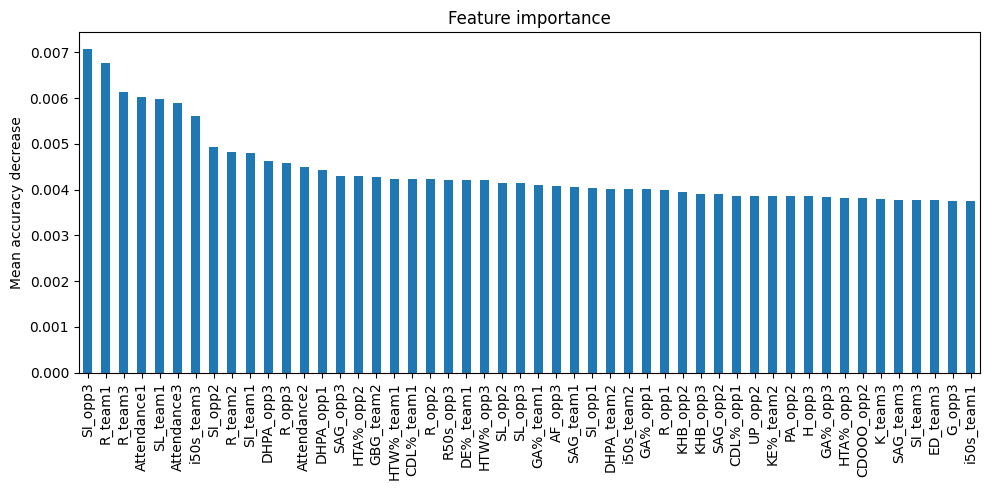

In [37]:
importances = pd.Series(forest.feature_importances_,index=feature_names)
importances = importances.sort_values(ascending=False)
#Plot the importances
fig, ax = plt.subplots(figsize=(10,5))
importances[0:50].plot.bar(ax=ax)
ax.set_title('Feature importance')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()

In [38]:
with pd.option_context('display.max_row',None):
    print(importances)

SI_opp3                            0.007086
R_team1                            0.006764
R_team3                            0.006126
Attendance1                        0.006027
SL_team1                           0.005975
Attendance3                        0.005894
i50s_team3                         0.005621
SI_opp2                            0.004936
R_team2                            0.004834
SI_team1                           0.004796
DHPA_opp3                          0.004618
R_opp3                             0.004575
Attendance2                        0.004488
DHPA_opp1                          0.004437
SAG_opp3                           0.004299
HTA%_opp2                          0.004291
GBG_team2                          0.004281
HTW%_team1                         0.004239
CDL%_team1                         0.004232
R_opp2                             0.004222
R50s_opp3                          0.004218
DE%_team1                          0.004216
HTW%_opp3                       

### Player Stats

At a glance it appears **SI** (Score Involvement), **SL** (Score Launches), **R** (Rating Points), **DHPA** (defensive half pressure acts), **SAG** (shots at goal), **i50s** (Inside 50s), **HTA%** (Hitouts to Advantage percent), **HTW%** (Hitouts to Win percent), **KE%** (kick efficiency), **KHB** (kick to handball ratio), **CP** (contested possessions), **Mi50** (Marks Inside 50), **GA%** (shots at goal accuracy), **CDL%** (contested defensive losses) are important player stats.

### Weather Data

**Max/Min Temp**, **Solar Radiation**, **Wind Speed** seem important, however **Rain** and **Humidity** do not.

### Other

**Attendance** seems very important. Keep **home/away** as well, but seems less important. **Venue**, **Team**, **Opponent** and **Day** to be quite unimportant. 

## Information Values:

Get the information values for all variables, binning the numerical varaibles into deciles.

In [60]:
df_matches_v3_IT, df_matches_v3_OOT, Xv2_train, Xv2_test, yv2_train, yv2_test = split_preprocess(df_matches_v3)
#Drop season from all the data
df_matches_v3_IT = df_matches_v3_IT.drop(['PointsF','PointsA','Round','Date','RoundNum','Season'],axis=1)
df_matches_v3_OOT = df_matches_v3_OOT.drop(['PointsF','PointsA','Round','Date','RoundNum','Season'],axis=1)
Xv2_train.drop(['PointsF','PointsA','Round','Date','RoundNum','Season'],axis=1,inplace=True)
Xv2_test.drop(['PointsF','PointsA','Round','Date','RoundNum','Season'],axis=1,inplace=True)

In [61]:
#Join the outcome variable back to the data
Xv2_train = pd.concat([Xv2_train,yv2_train],axis=1)

### Bin the numerical variables as quantiles 

In [41]:
#Get numerical columns
#Extract only ther numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = list(Xv2_train.select_dtypes(include=numerics).columns)
num_cols.remove('Outcome')

In [42]:
for col in num_cols:
    try:
        Xv2_train.loc[:,col] = pd.qcut(Xv2_train[col],10,duplicates='drop') 
    except:
        continue

In [43]:
num_cols = list(Xv2_train.select_dtypes(include=numerics).columns)

In [44]:
num_cols

['Outcome']

In [45]:
Xv2_train_copy = Xv2_train.copy(deep=True)

In [46]:
Xv2_train_copy.columns

Index(['Team', 'Opponent', 'Venue', 'Day', 'H/A', 'oppH/A', 'Rain (mm)',
       'Max Temp (C)', 'Min Temp (C)', 'Max Humid (%)',
       ...
       'SI_opp3', 'SL_opp3', 'CC_opp3', 'SC_opp3', 'HTA_opp3', 'HTW%_opp3',
       'HTA%_opp3', 'RC_opp3', 'Attendance3', 'Outcome'],
      dtype='object', length=317)

## IV Functions

In [47]:
import sys
sys.path.append('../functions')
from IVfunctions import * 

In [48]:
df_IV,Xout = IV_summary(Xv2_train_copy,'Outcome')

G:\Local\Projects\AFL-Analytics-Project\Analysis\../functions\IVfunctions.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  agg['WoE'] = agg.apply(lambda x: np.log(x.goods_perc/x.bads_perc),axis=1)


<Axes: xlabel='Variable'>

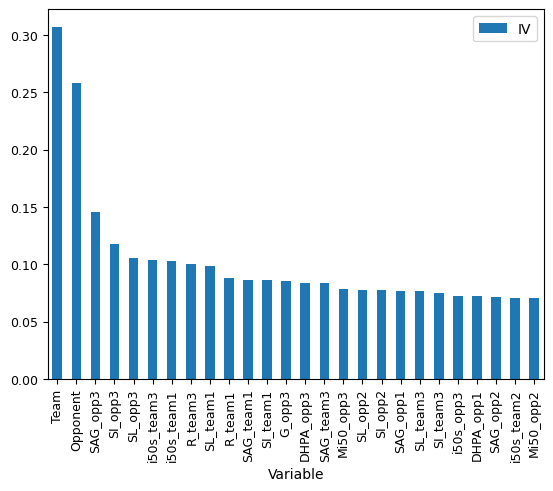

In [49]:
df_IV[df_IV['IV']>=0.07].plot.bar(x = 'Variable', y = 'IV', fontsize='9')

Seems the important variables are 'Team', 'Opponent', 'SAG', 'SI','SL', 'i50s','R', 'G','DHPA','Mi50'

## Univariate Analysis

In [62]:
#Extract only the relevant columns
Xv2_train = Xv2_train[['Team','Opponent','SAG_team1','SAG_team2','SAG_team3','SAG_opp1','SAG_opp2','SAG_opp3',
                    'SL_team1','SL_team2','SL_team3','SL_opp1','SL_opp2','SL_opp3',
                    'SI_team1','SI_team2','SI_team3','SI_opp1','SI_opp2','SI_opp3',
                    'i50s_team1','i50s_team2','i50s_team3','i50s_opp1','i50s_opp2','i50s_opp3',
                    'R_team1','R_team2','R_team3','R_opp1','R_opp2','R_opp3',
                    'G_team1','G_team2','G_team3','G_opp1','G_opp2','G_opp3',
                    'DHPA_team1','DHPA_team2','DHPA_team3','DHPA_opp1','DHPA_opp2','DHPA_opp3',
                    'Mi50_team1','Mi50_team2','Mi50_team3','Mi50_opp1','Mi50_opp2','Mi50_opp3','Outcome']]

In [66]:
#Numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = list(Xv2_train.select_dtypes(include=numerics).columns)
num_cols.remove('Outcome')
#Category columns
cat_cols = list(Xv2_train.select_dtypes(include='object').columns)


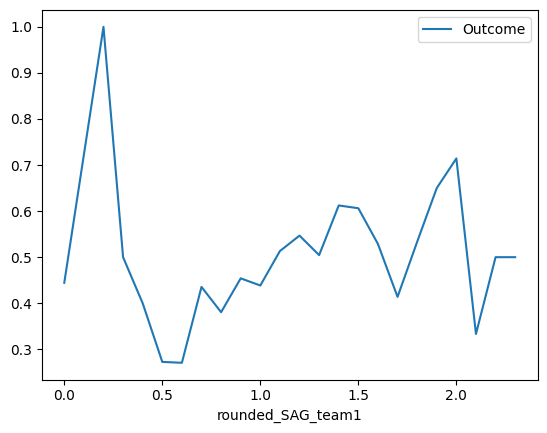

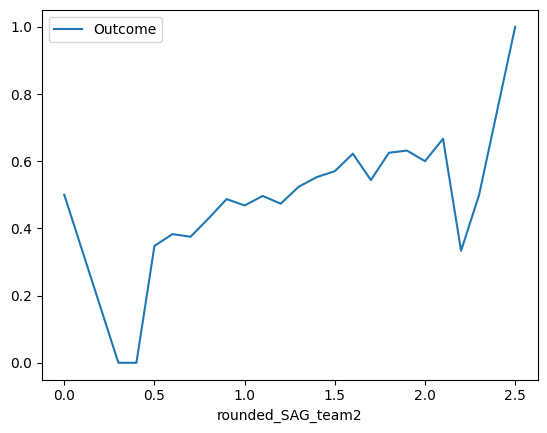

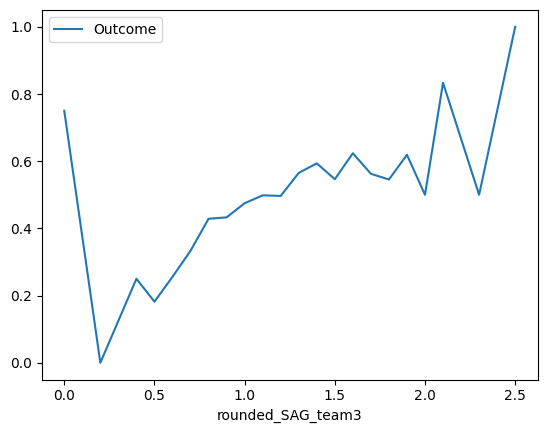

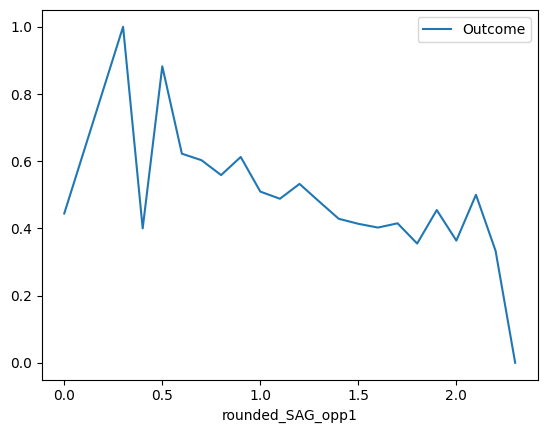

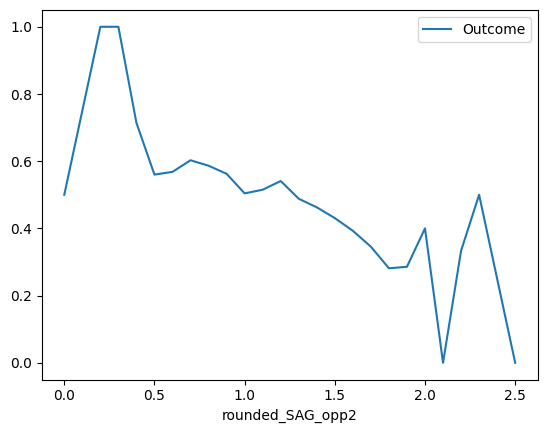

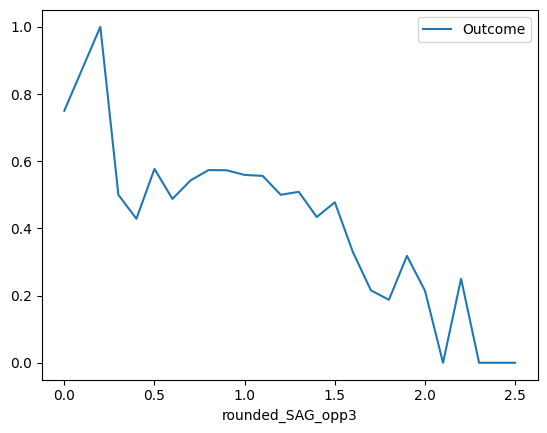

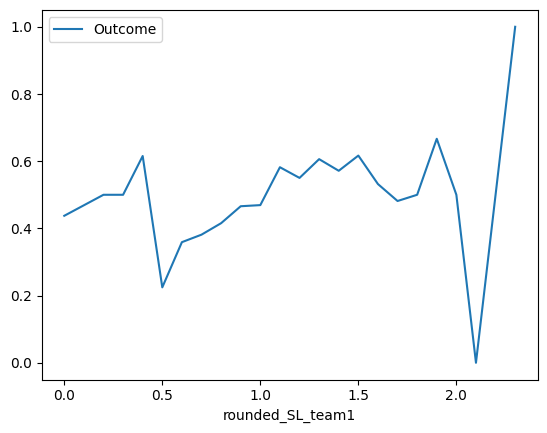

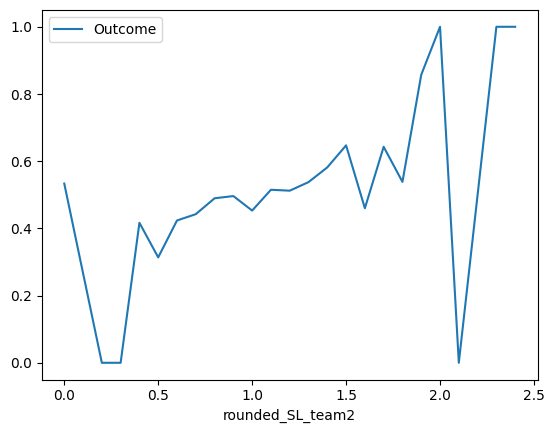

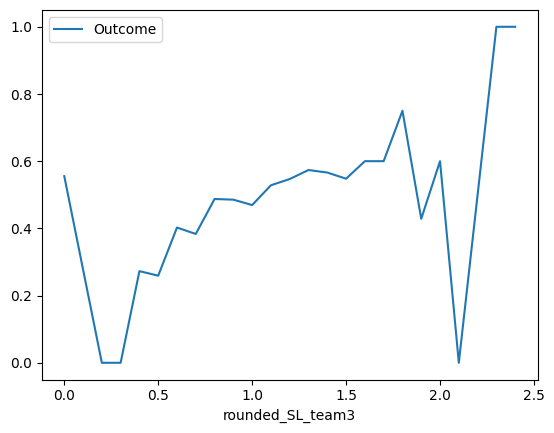

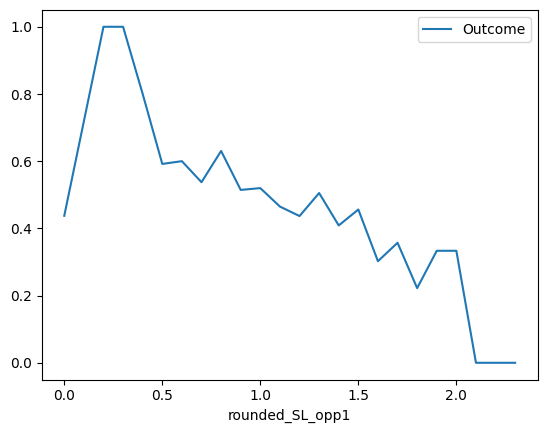

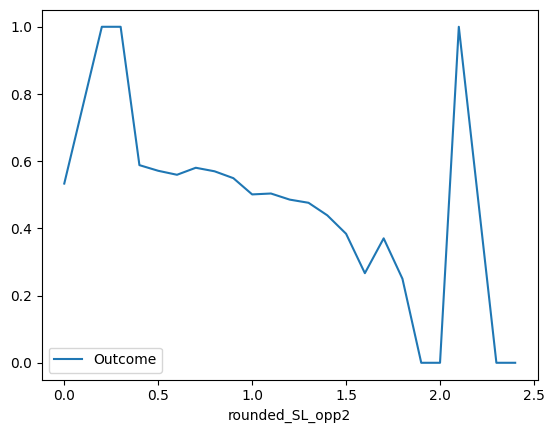

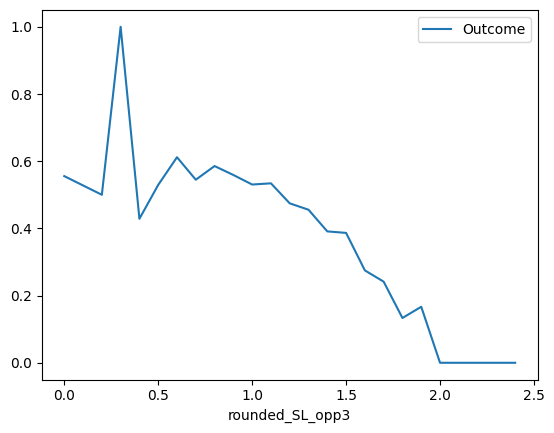

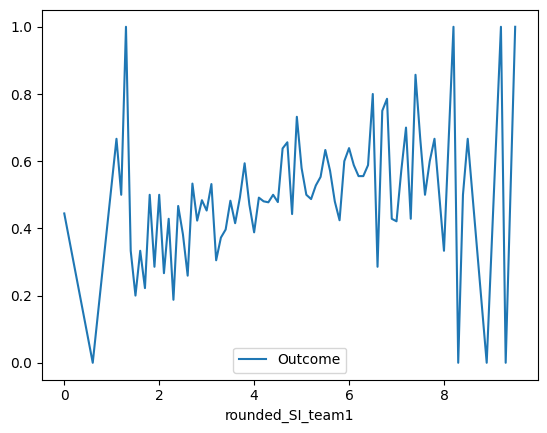

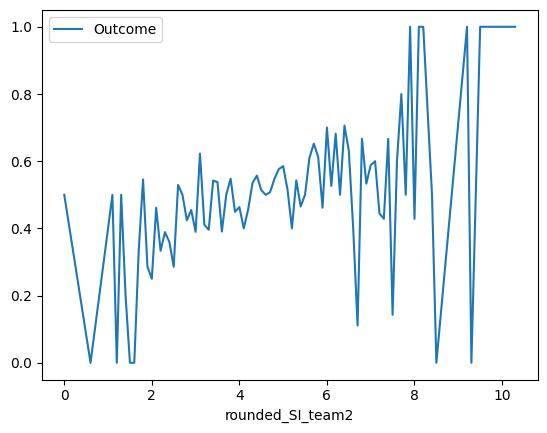

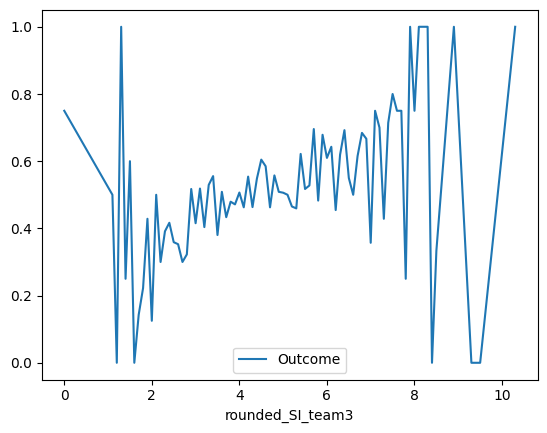

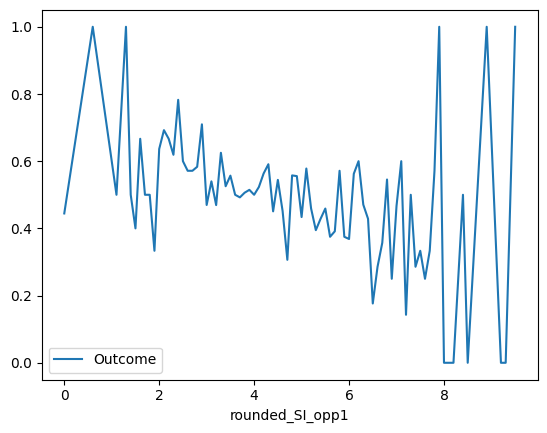

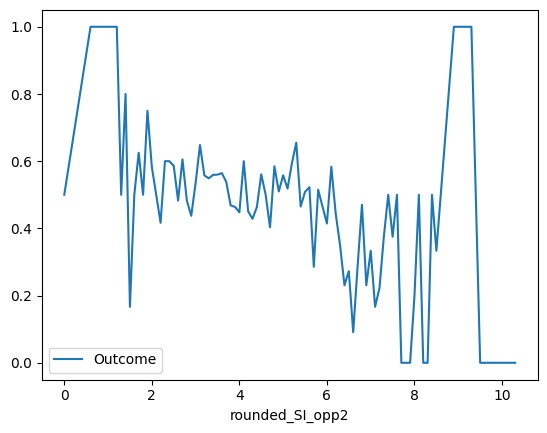

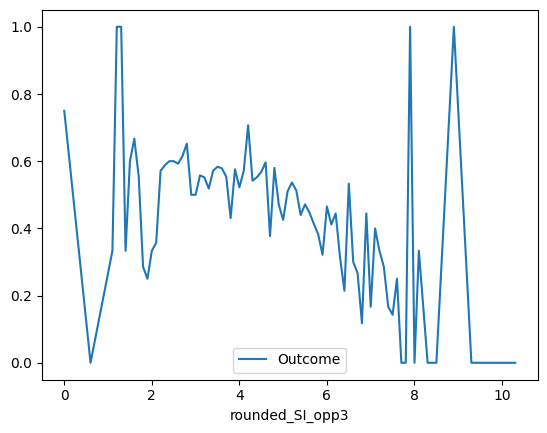

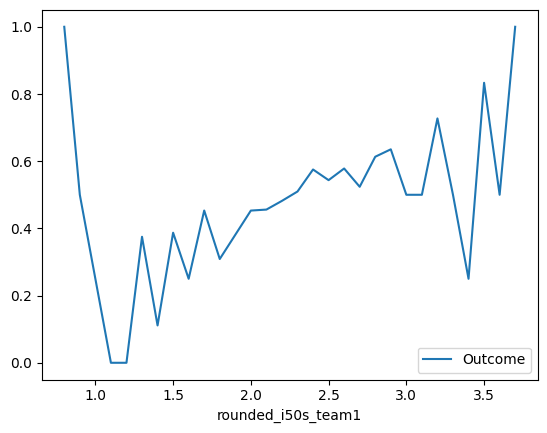

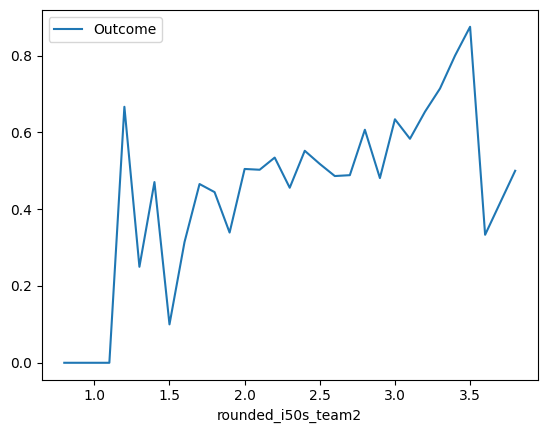

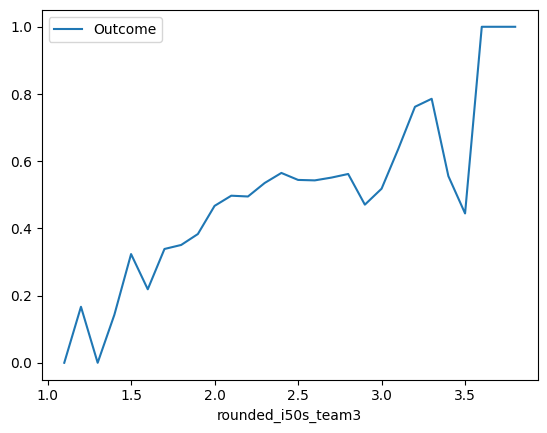

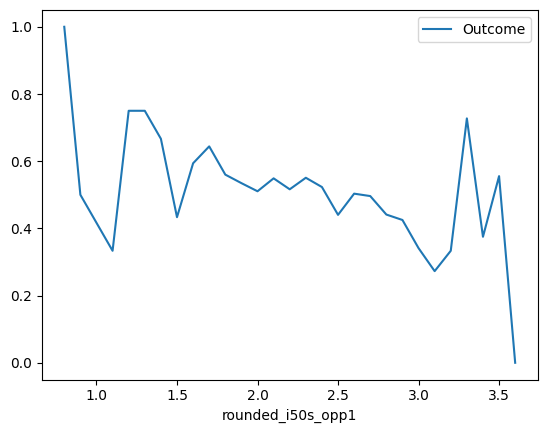

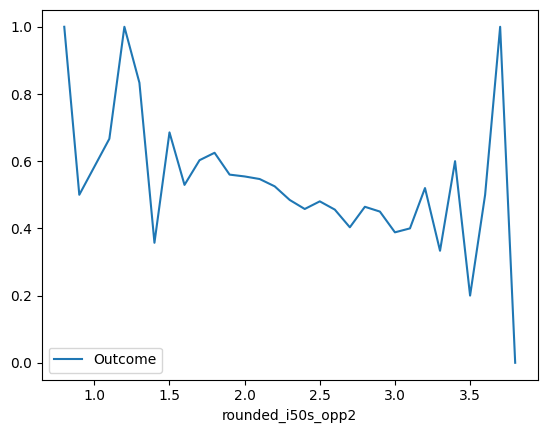

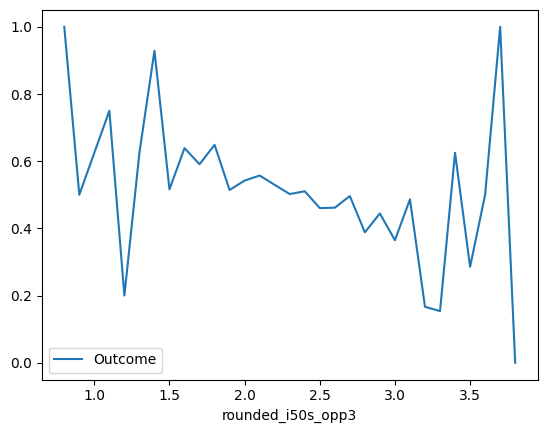

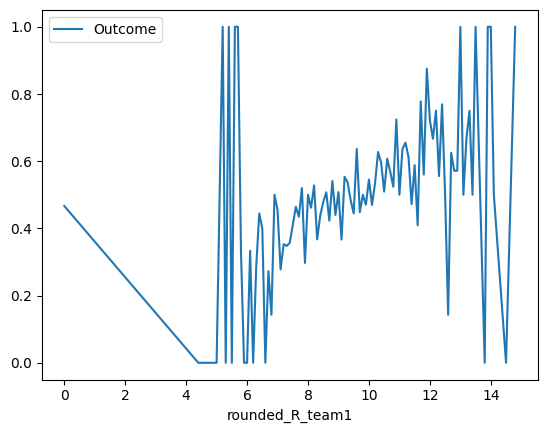

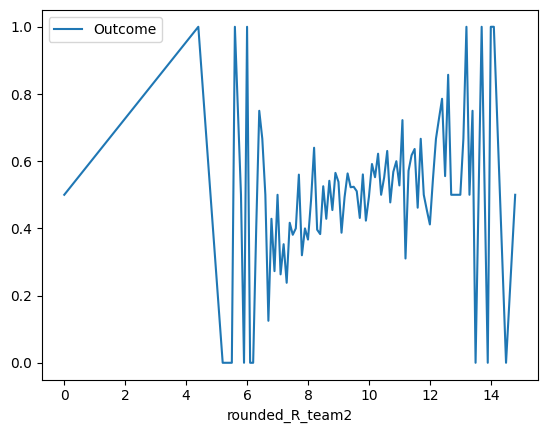

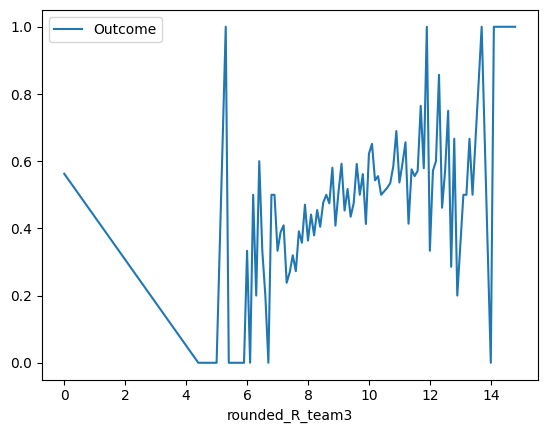

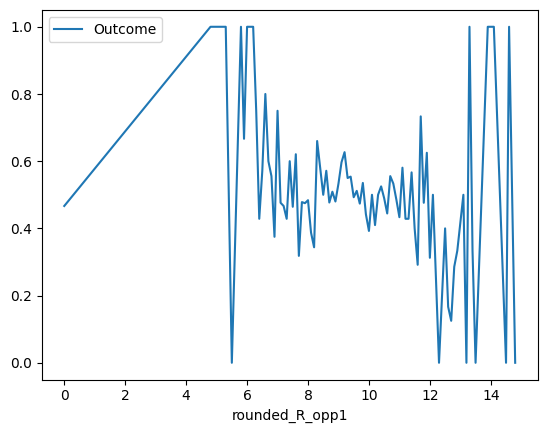

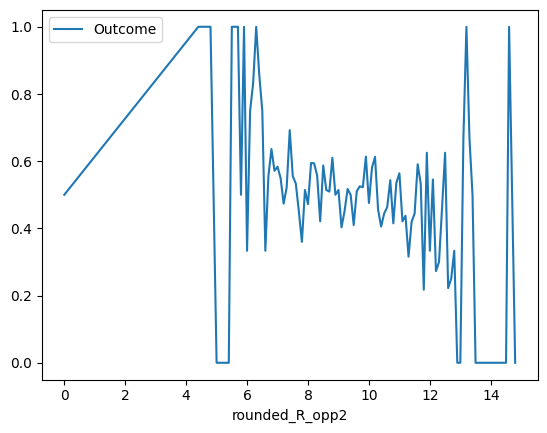

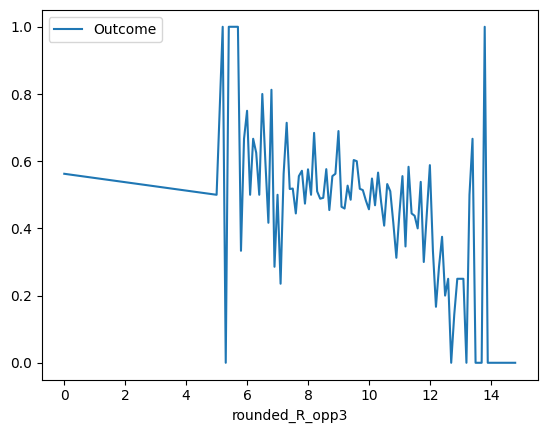

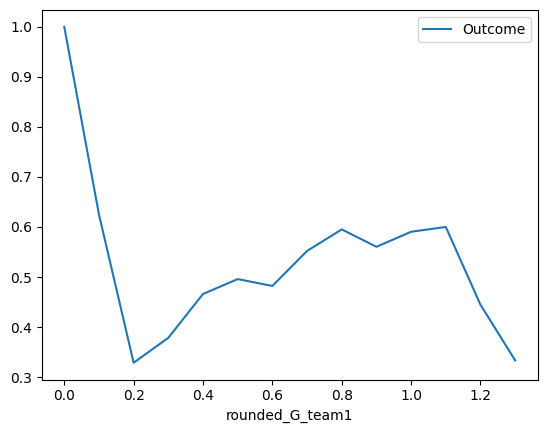

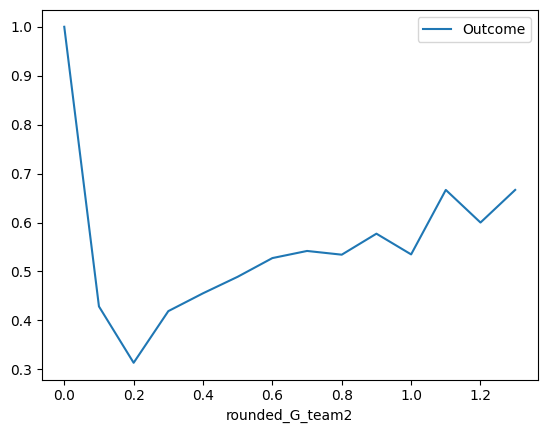

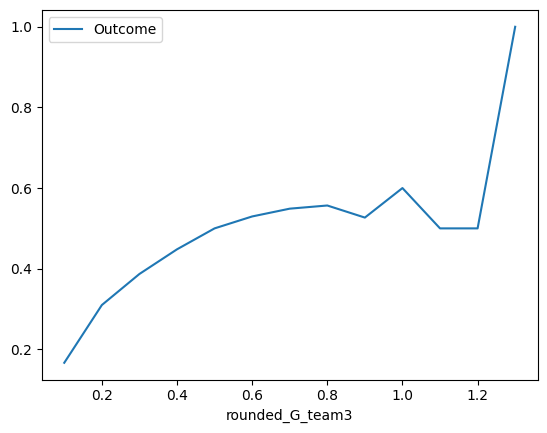

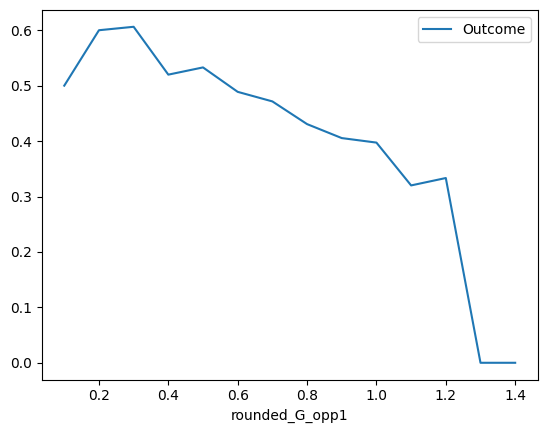

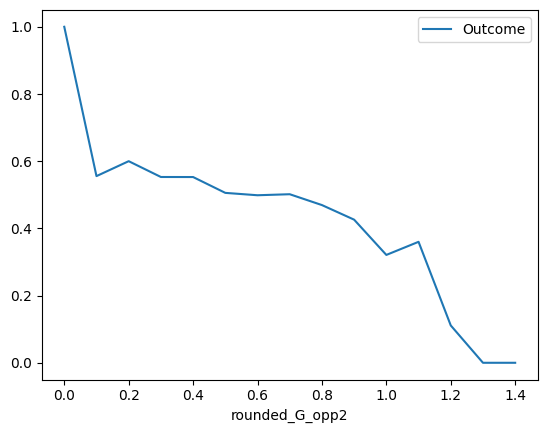

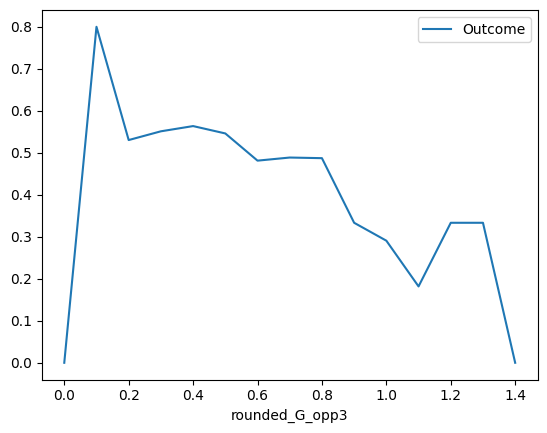

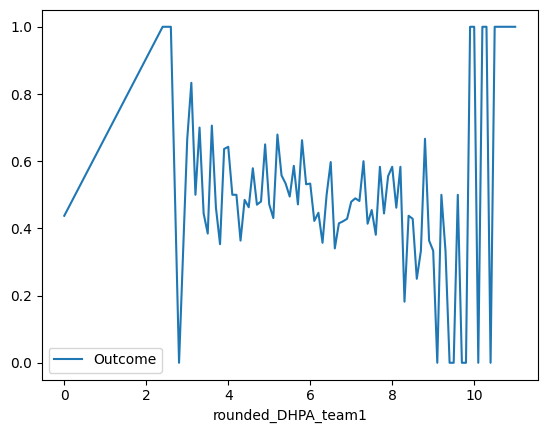

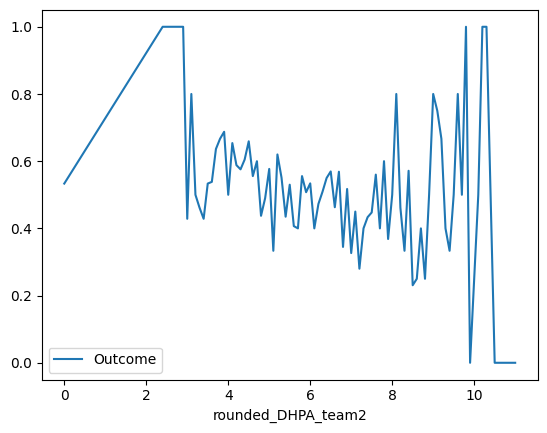

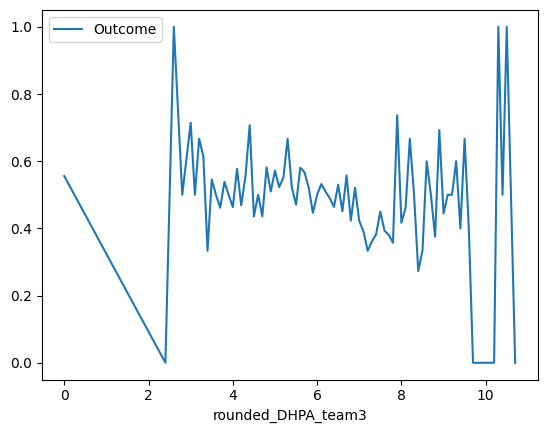

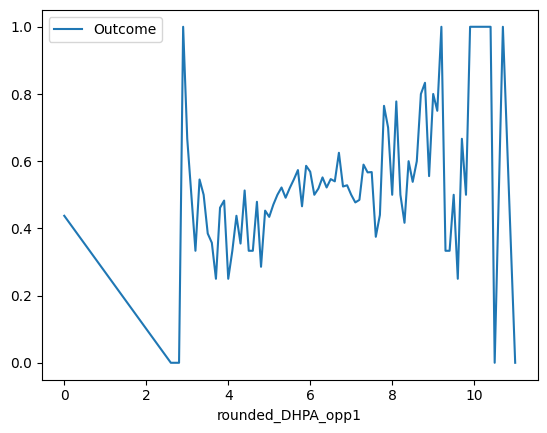

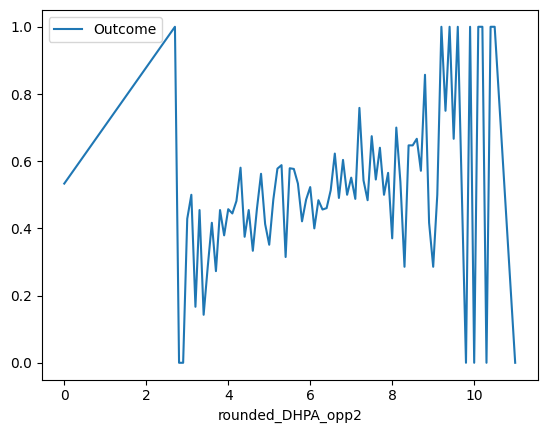

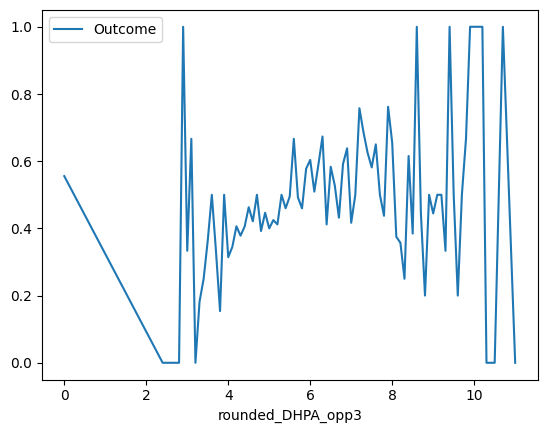

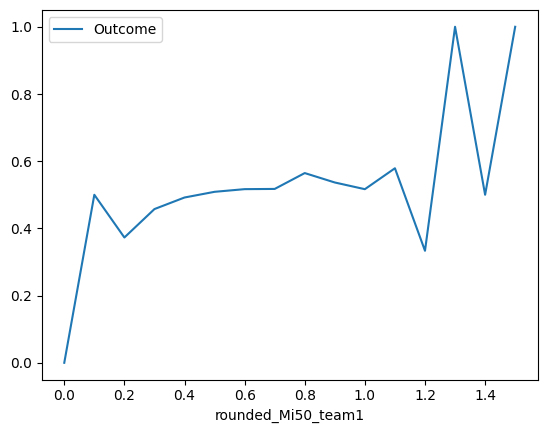

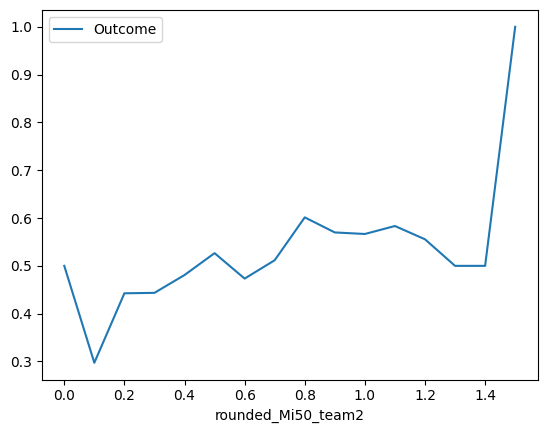

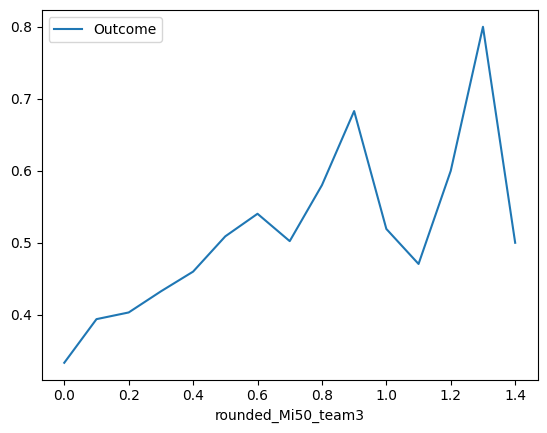

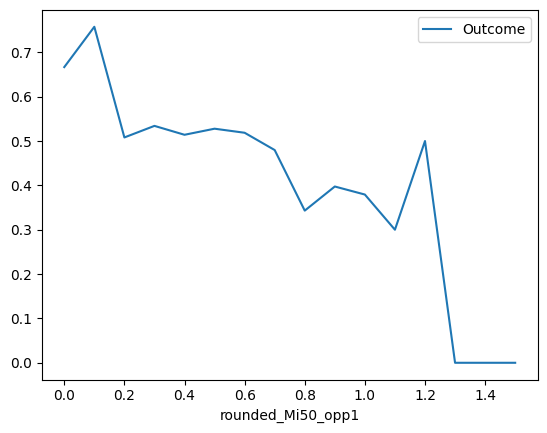

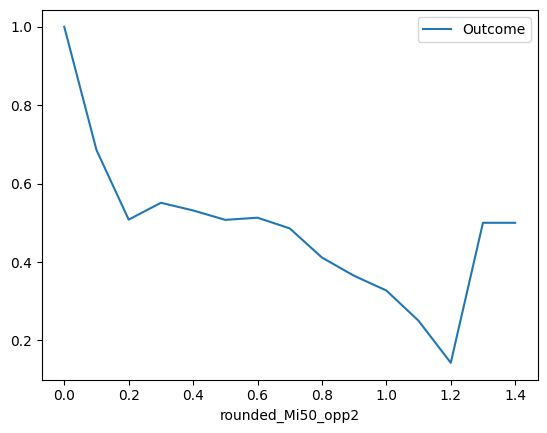

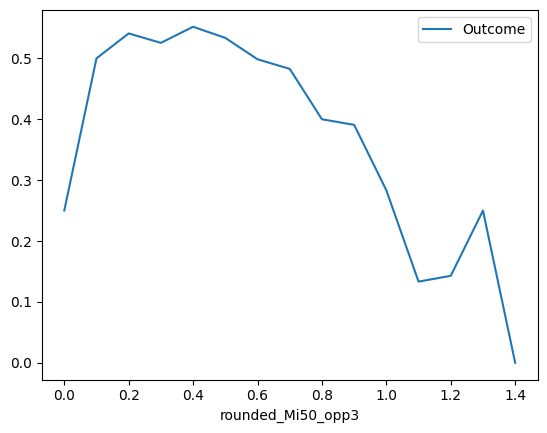

In [65]:
for col in num_cols:
    #round to 2d.p.'s
    Xv2_train['rounded_'+col] = Xv2_train[col].round(1)
    agg = Xv2_train.groupby('rounded_'+col).agg({'Outcome':'mean'})
    agg = agg.sort_index()
    agg = agg.reset_index()
    fig,ax = plt.subplots()
    agg.plot(x='rounded_'+col,y='Outcome',ax=ax)
    plt.show()

### Summary

Team Positive relationships:
- SAG
- SL
- SI
- i50s
- R
- G
- Mi50s

Team Negative relationships:
- DHPA

In [92]:
#Remove the rounded columns created from earlier
rounded_cols = Xv2_train.columns[Xv2_train.columns.str.match(r'^rounded_')].to_list()

#Remove from the dataframe
Xv2_train=Xv2_train.drop(rounded_cols,axis=1)

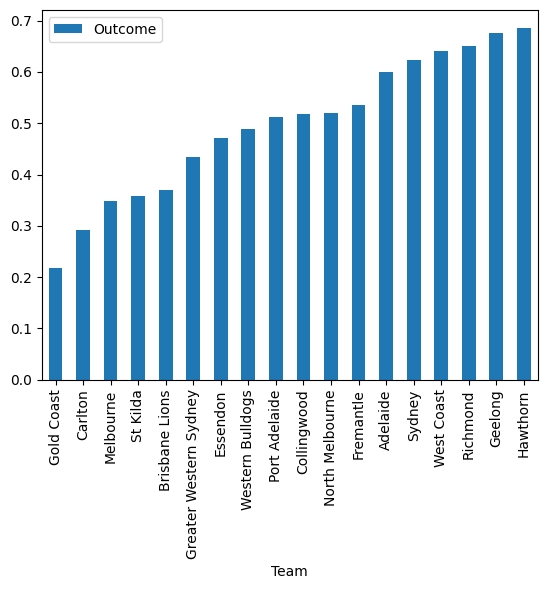

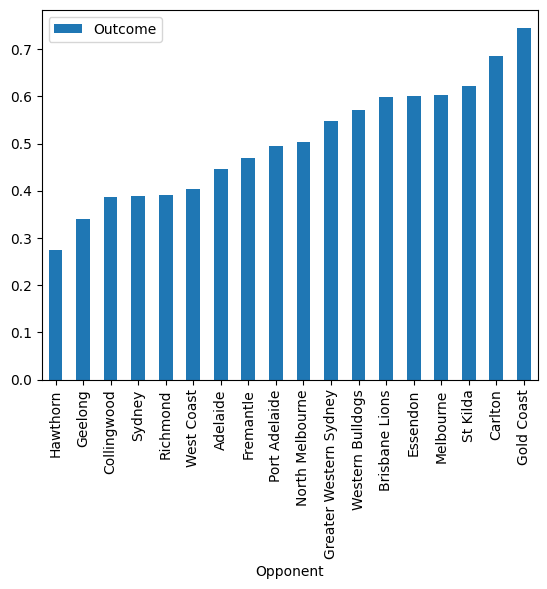

In [69]:
for col in cat_cols:
    #round to 2d.p.'s
    agg = Xv2_train.groupby(col).agg({'Outcome':'mean'})
    agg = agg.sort_values('Outcome')
    agg = agg.reset_index()
    fig,ax = plt.subplots()
    agg.plot.bar(x=col,y='Outcome',ax=ax)
    plt.show()

## Use Decision Tree to find Optimal Cut Points for Numeric Variables

In [ ]:
Xv2_train.pop('Outcome')

In [81]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=5432)

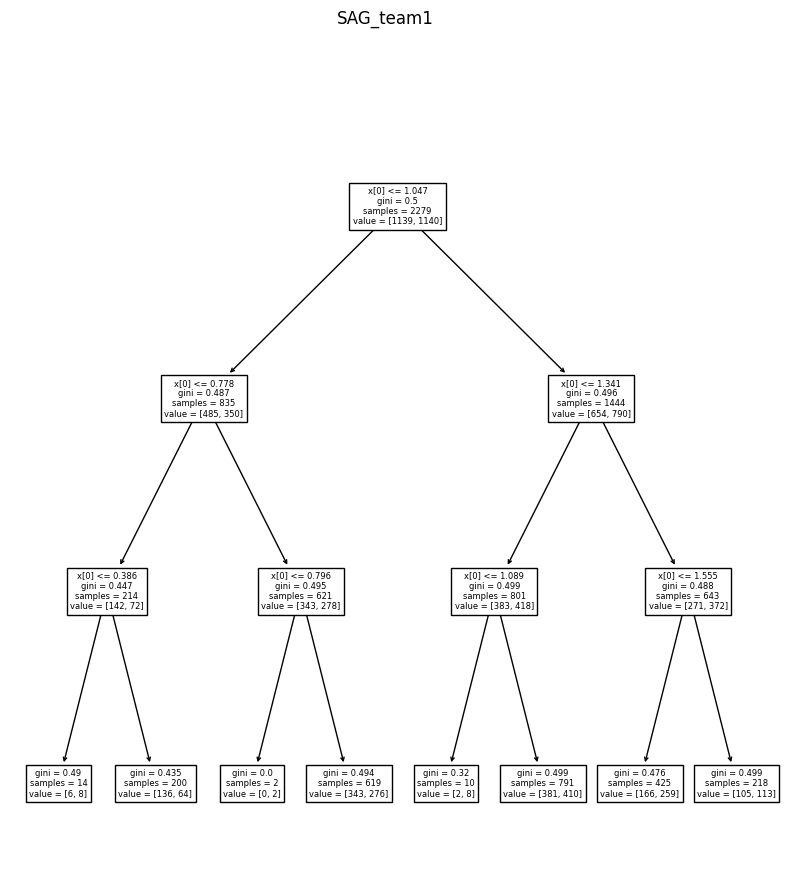

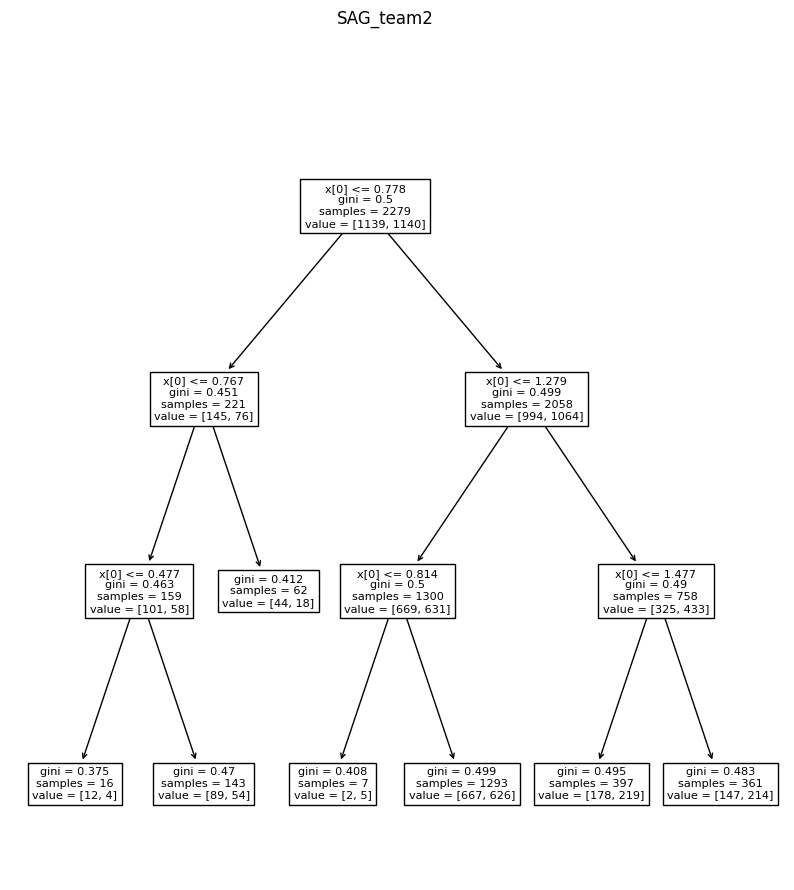

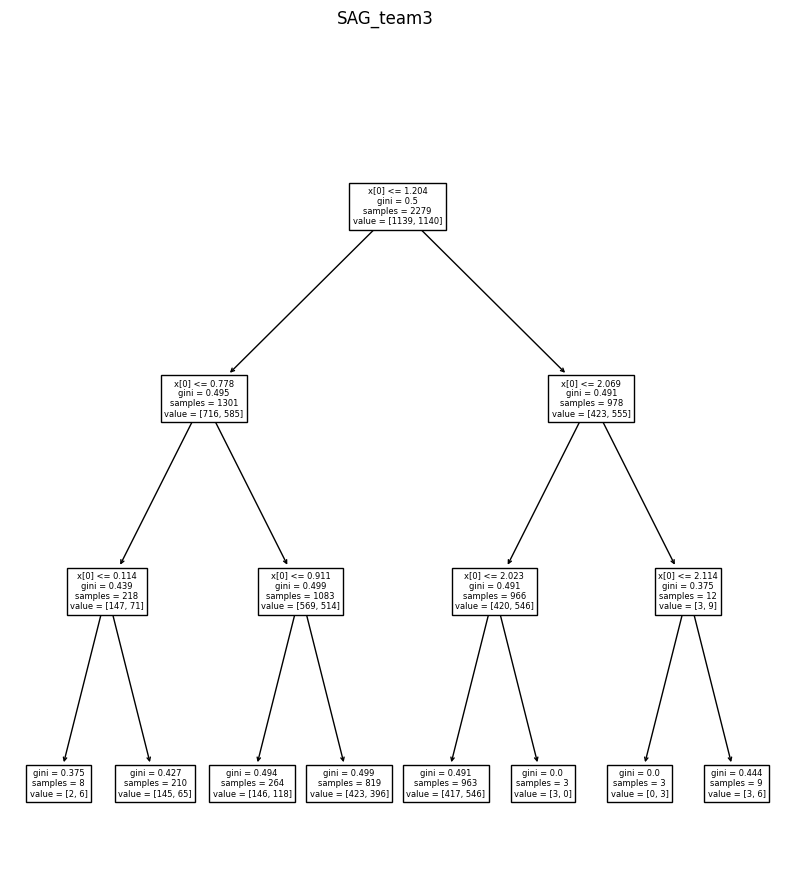

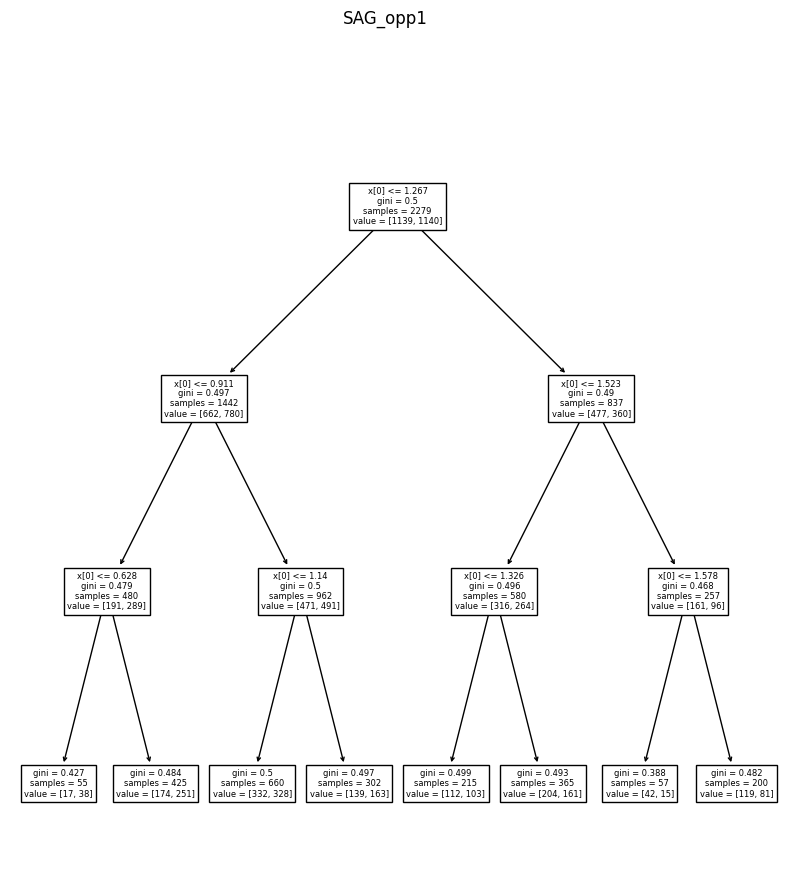

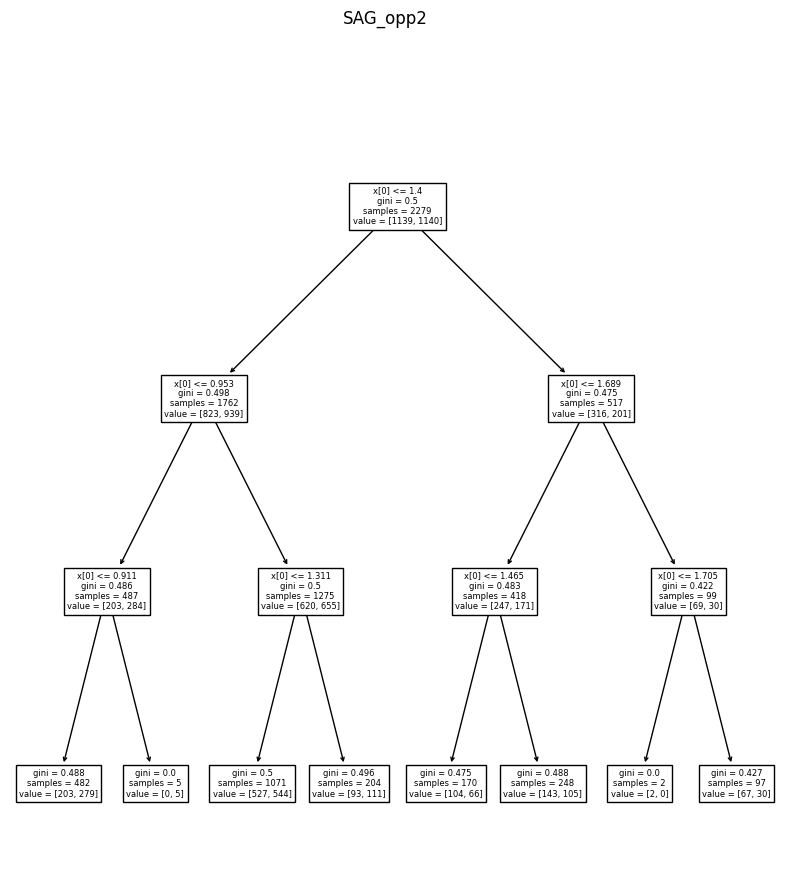

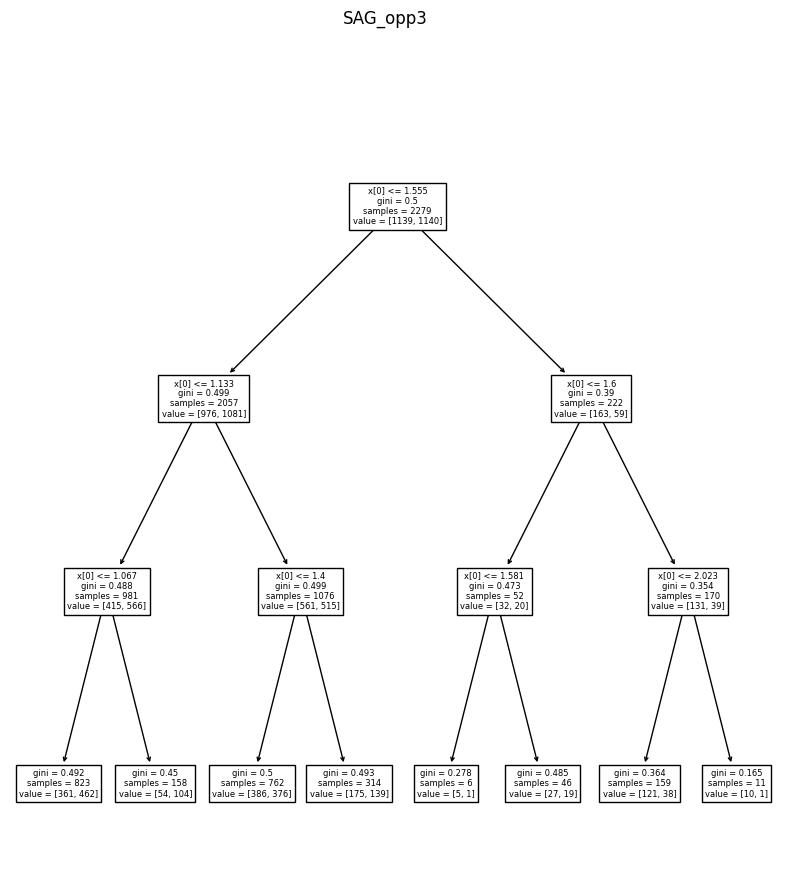

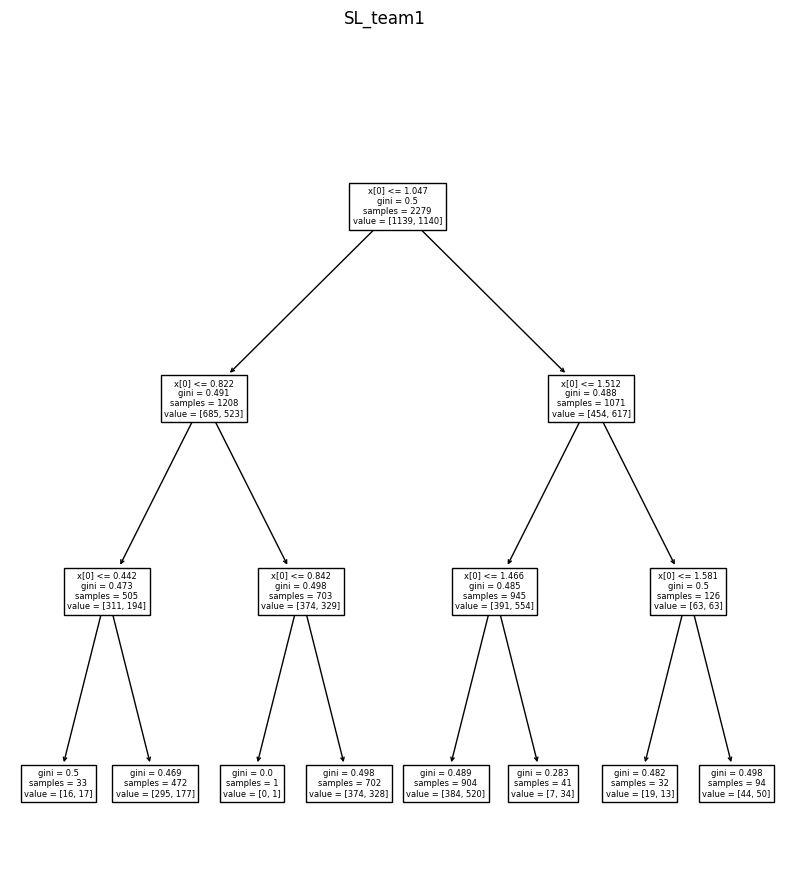

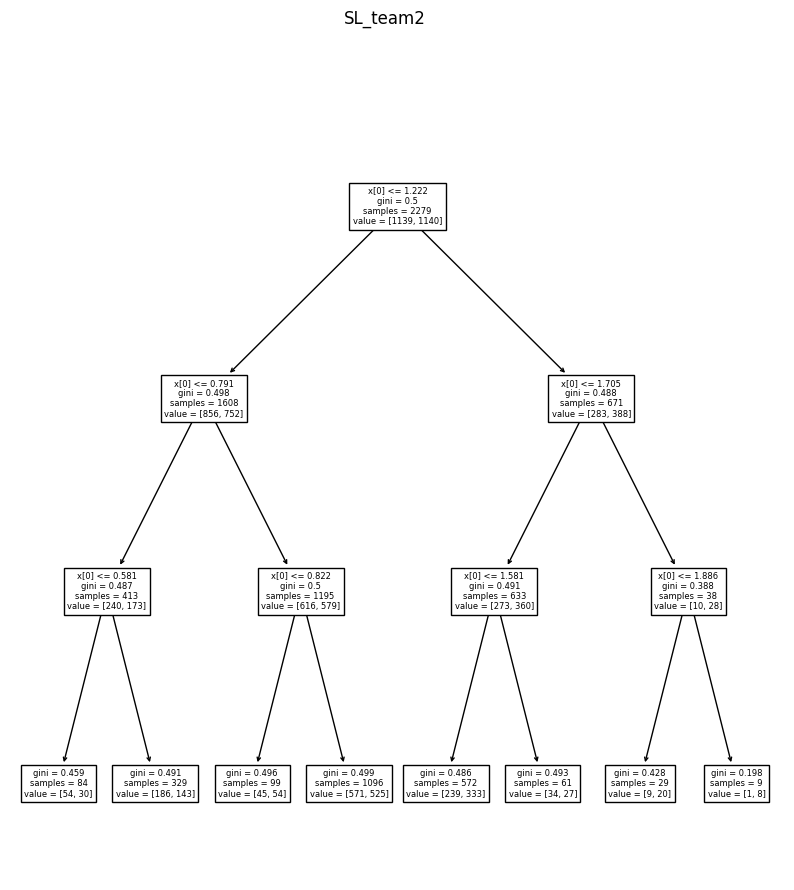

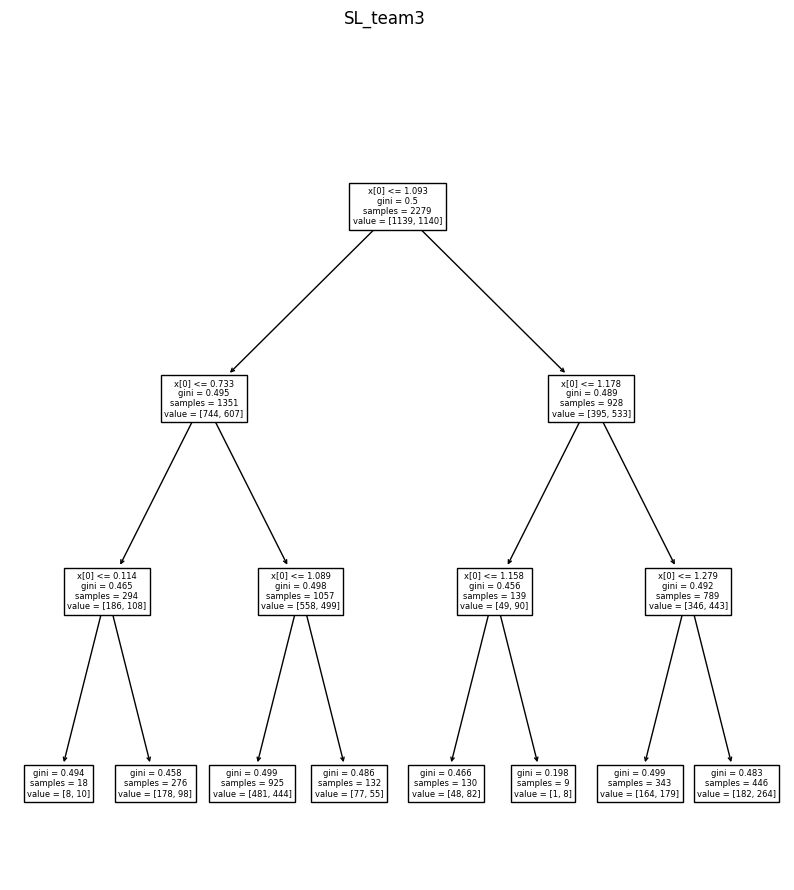

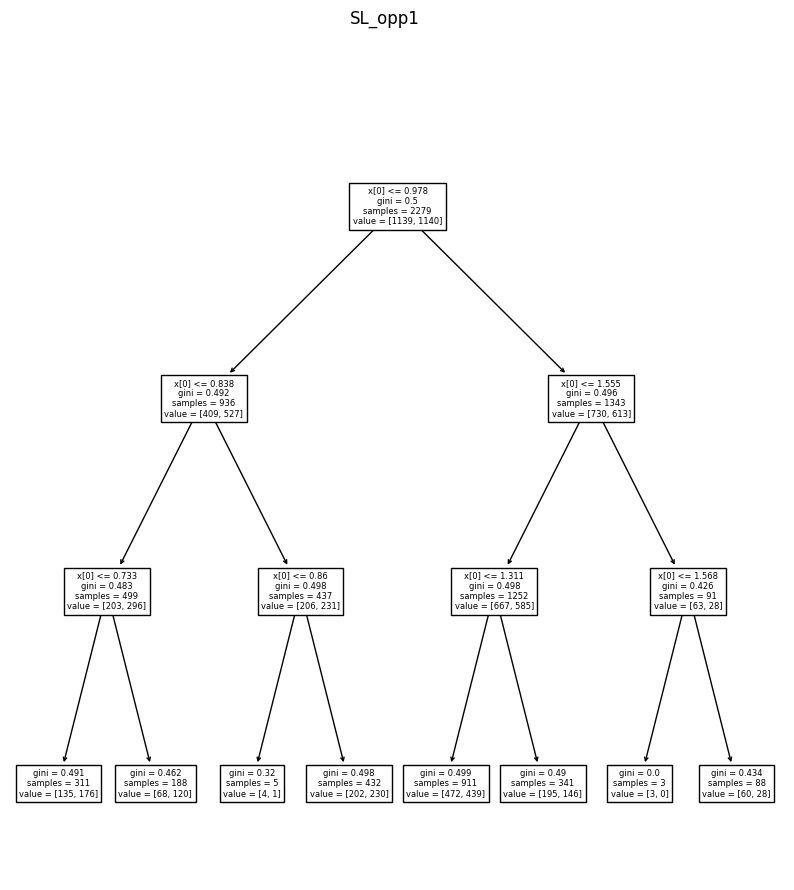

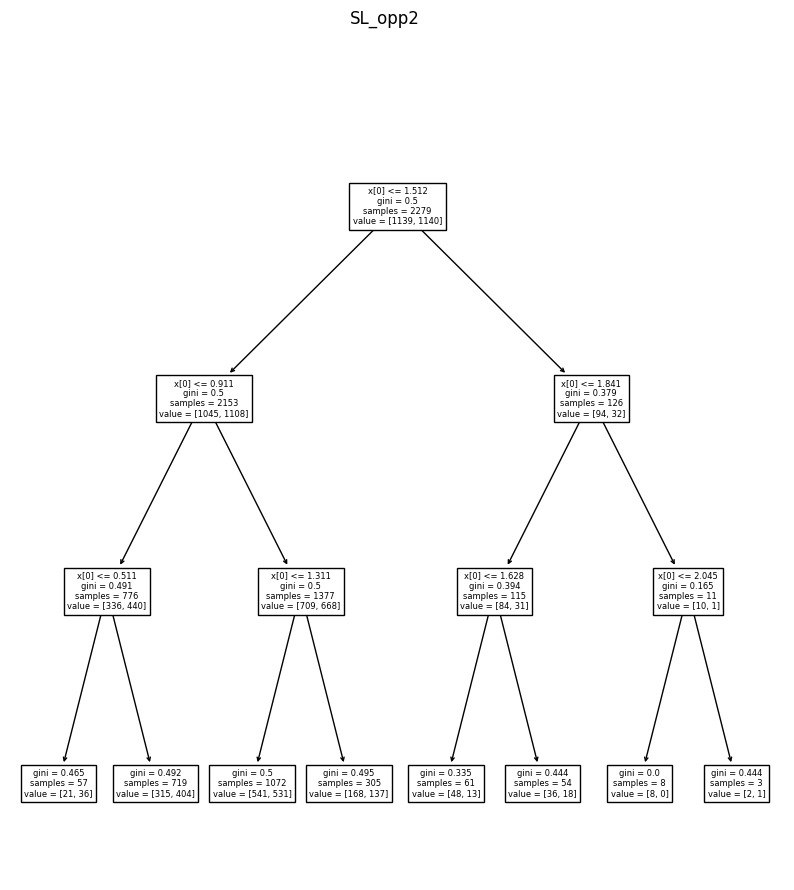

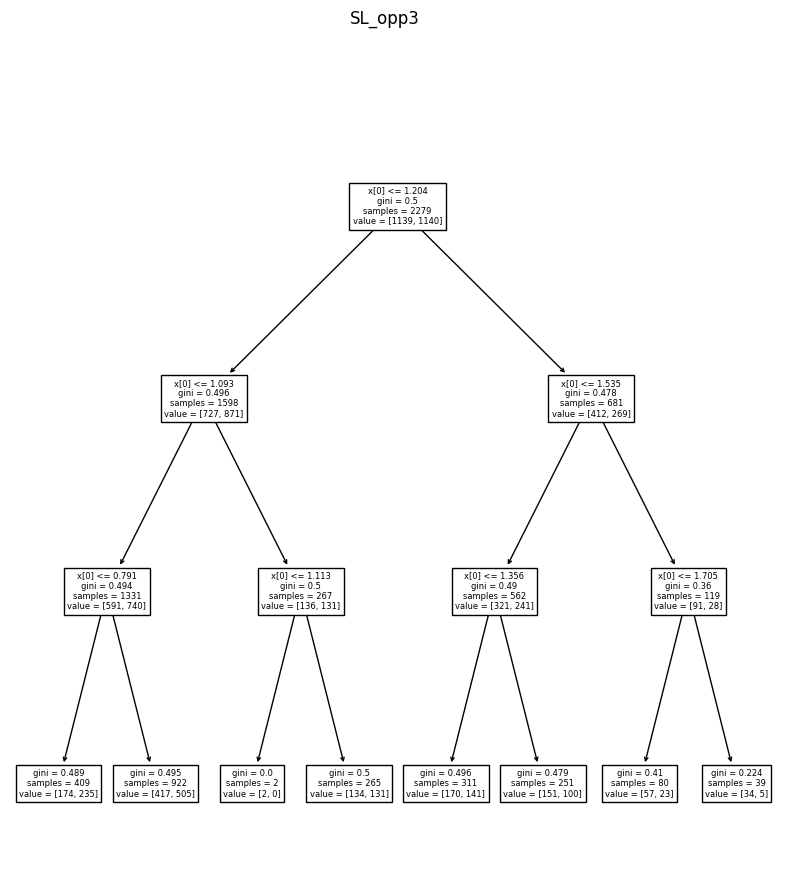

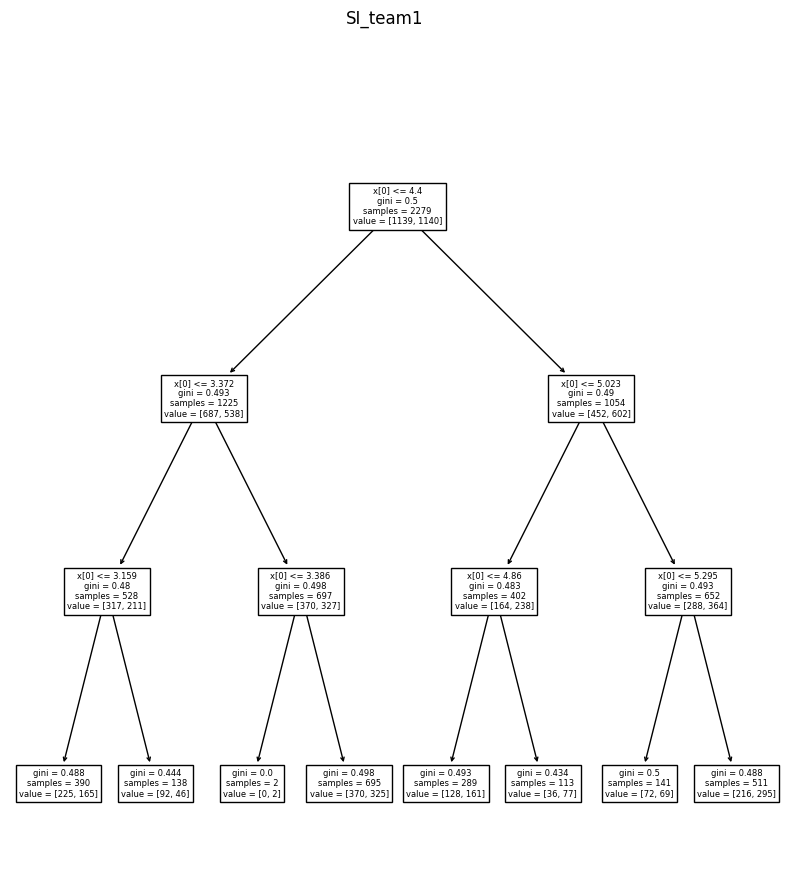

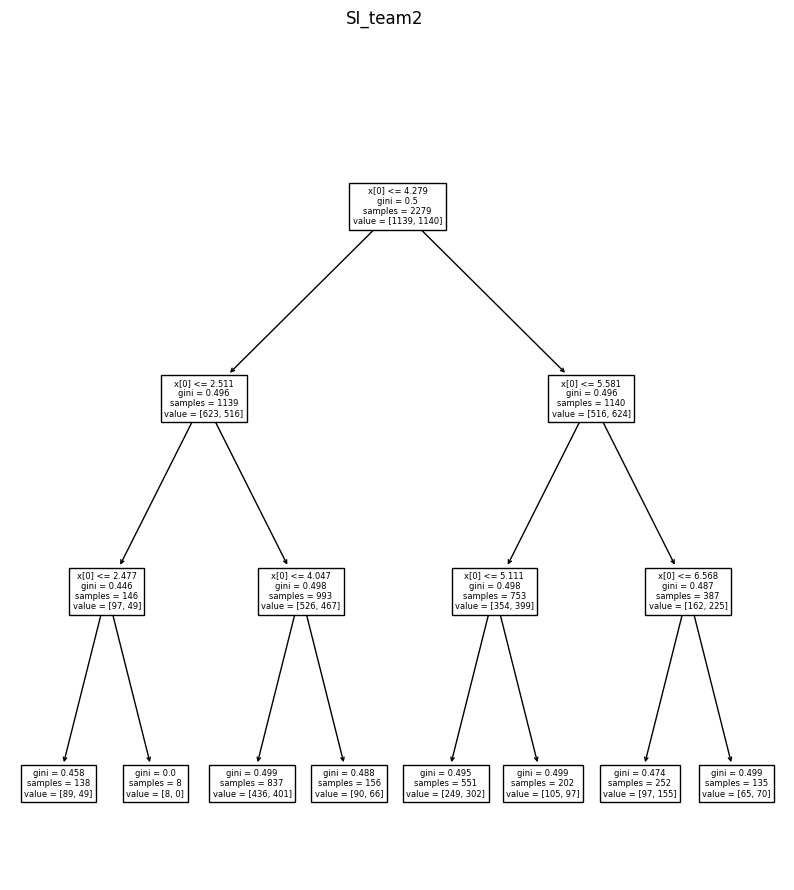

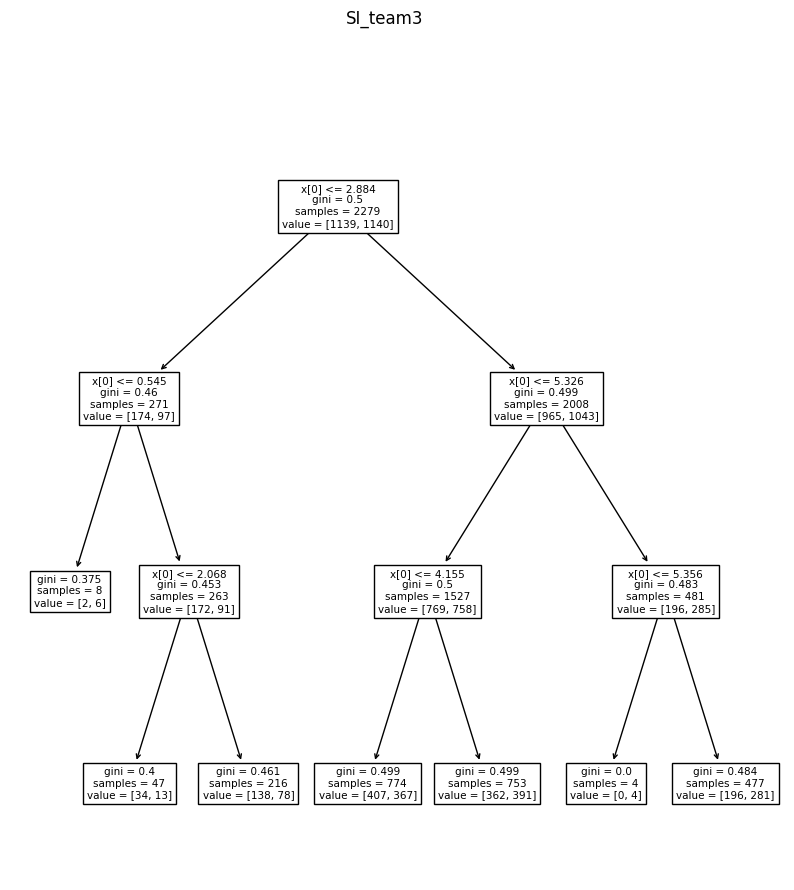

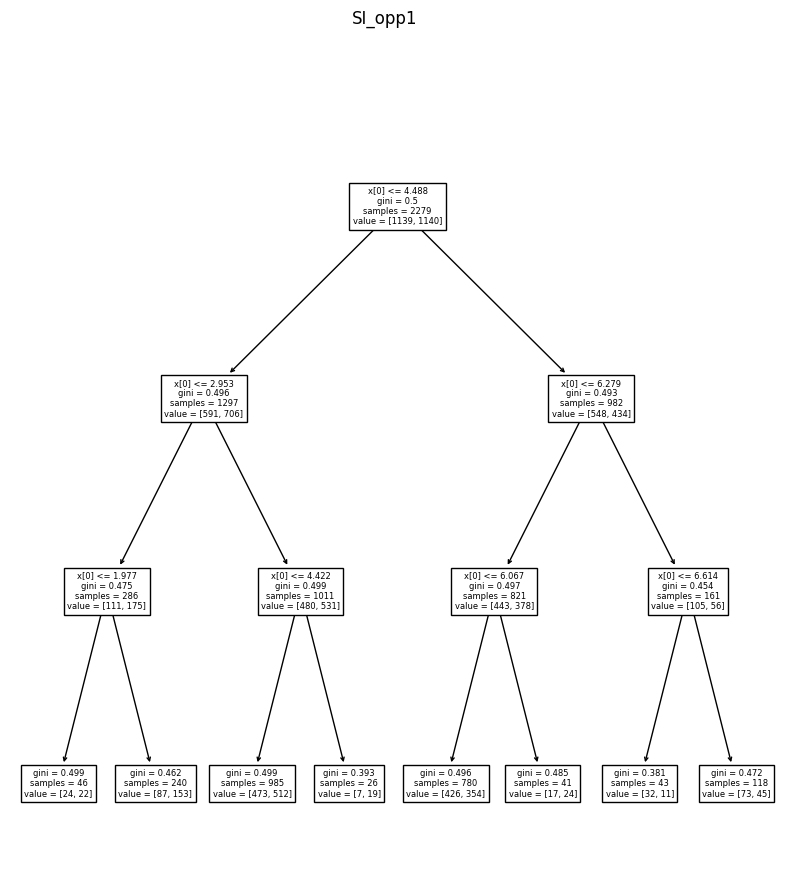

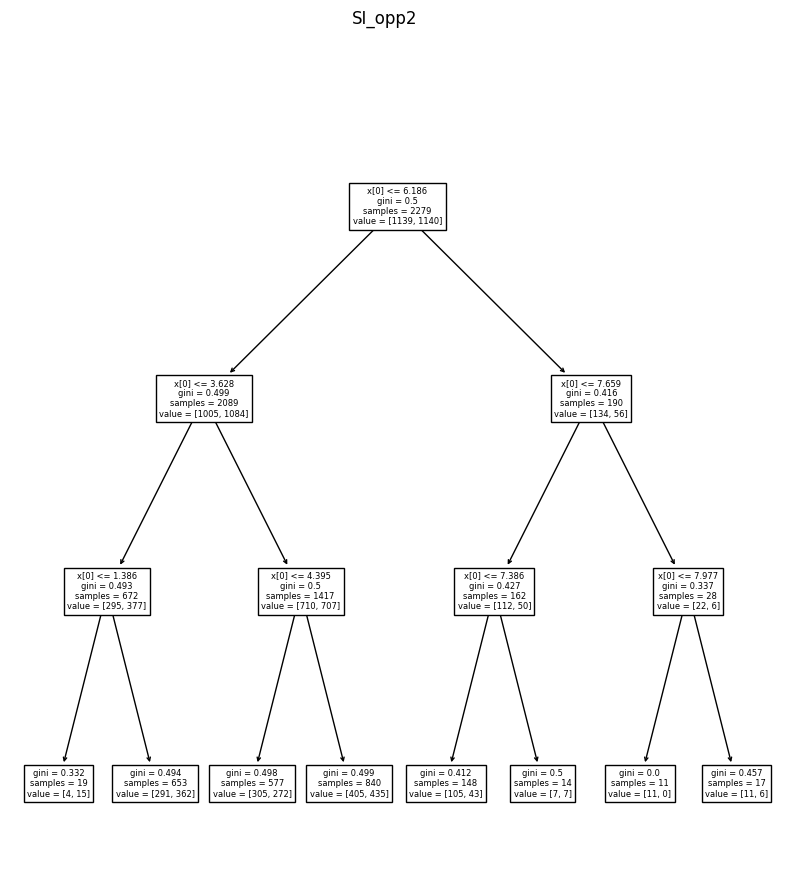

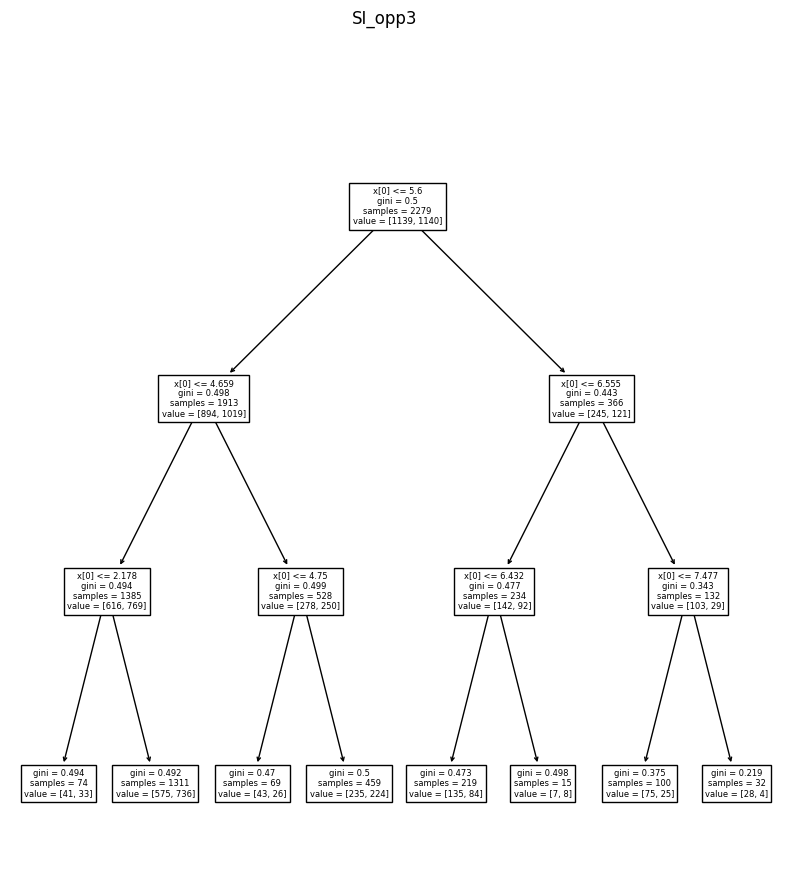

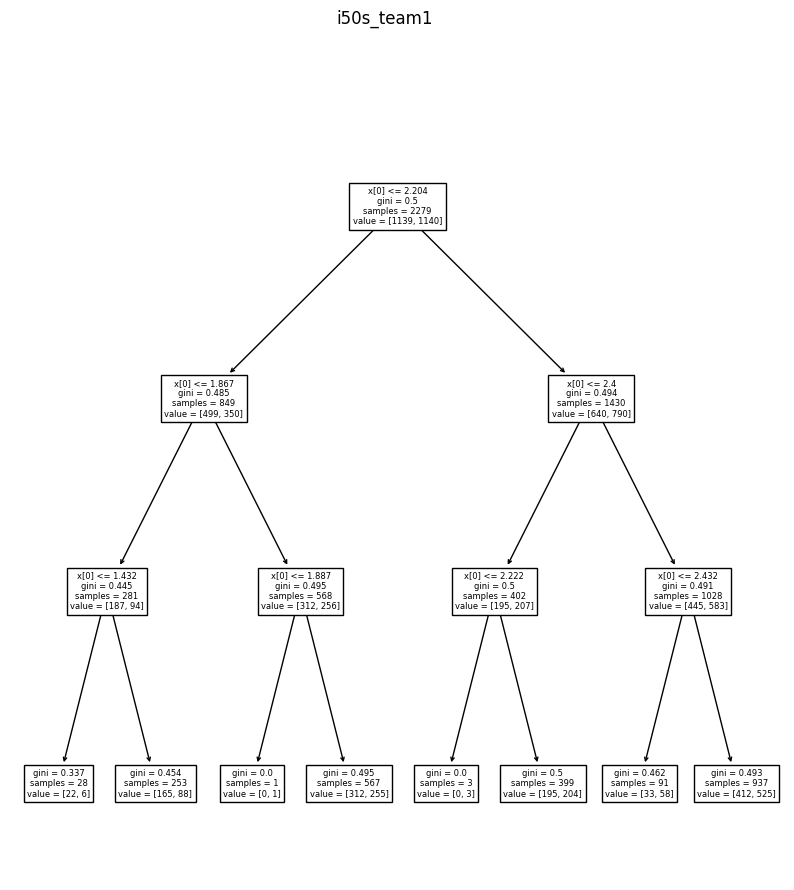

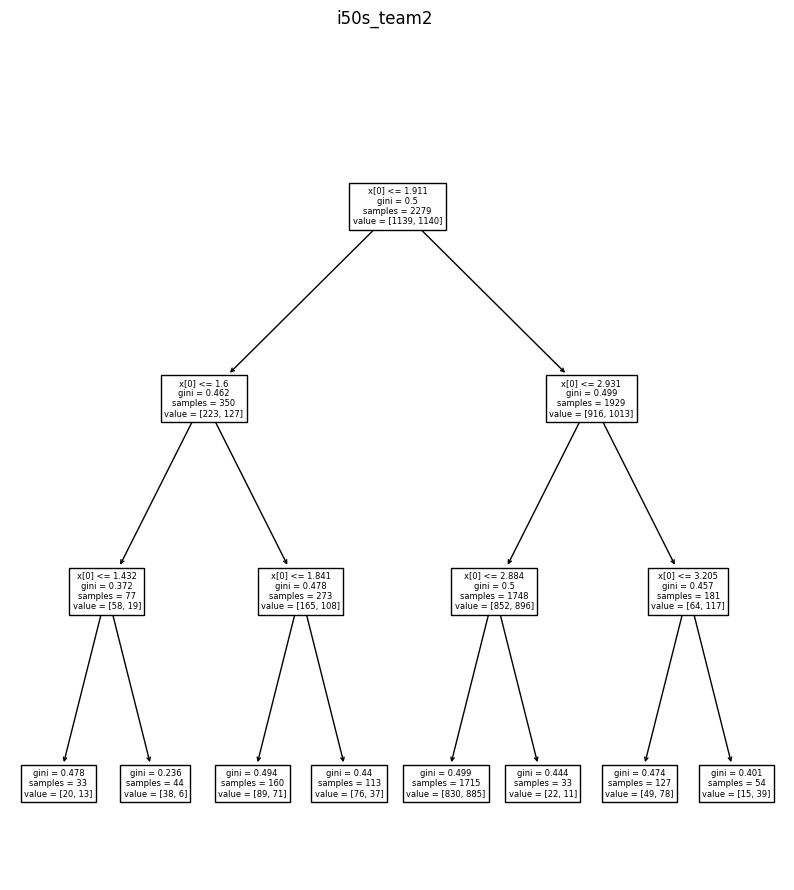

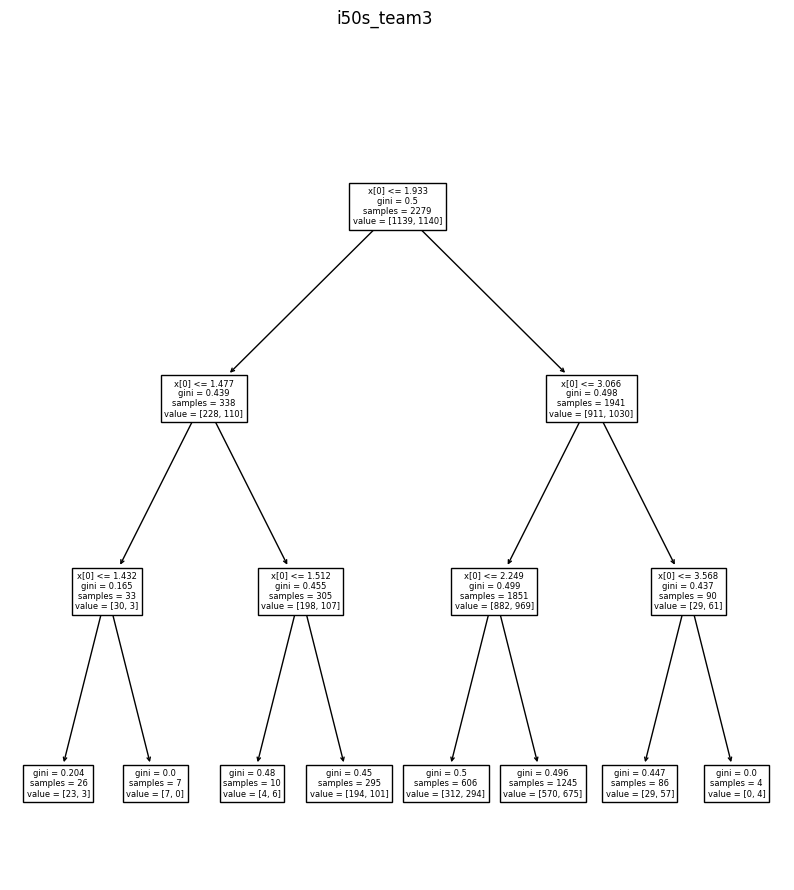

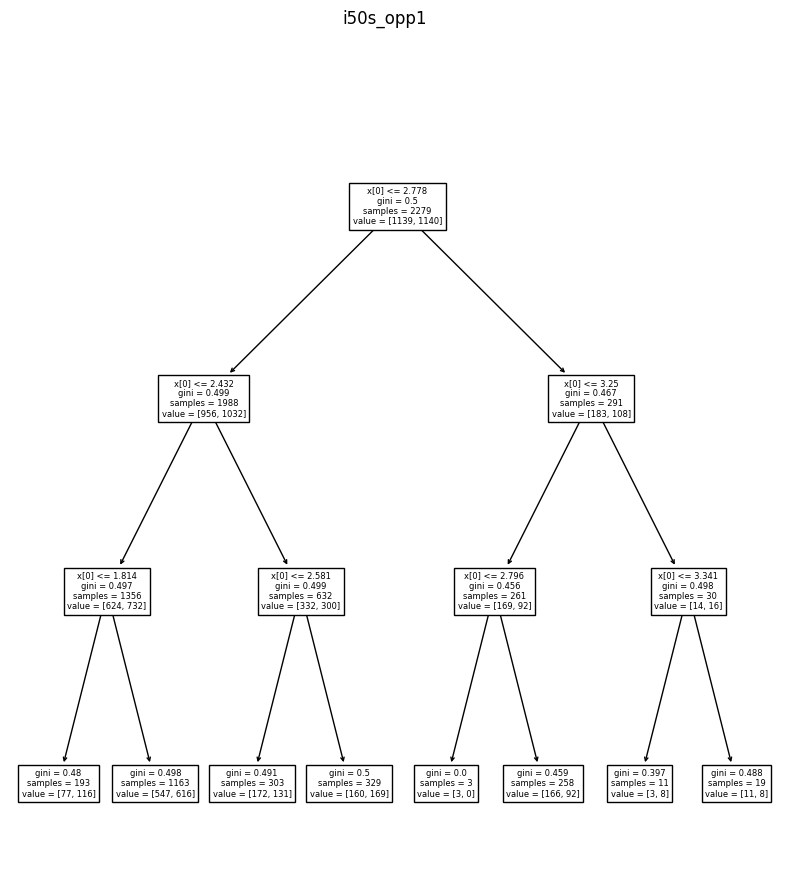

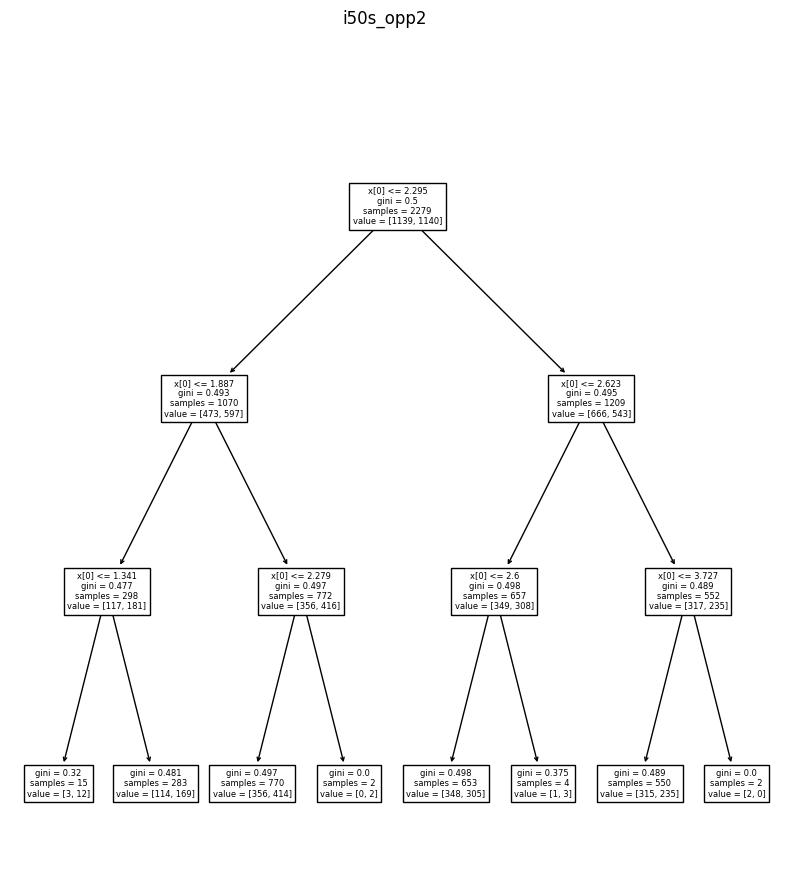

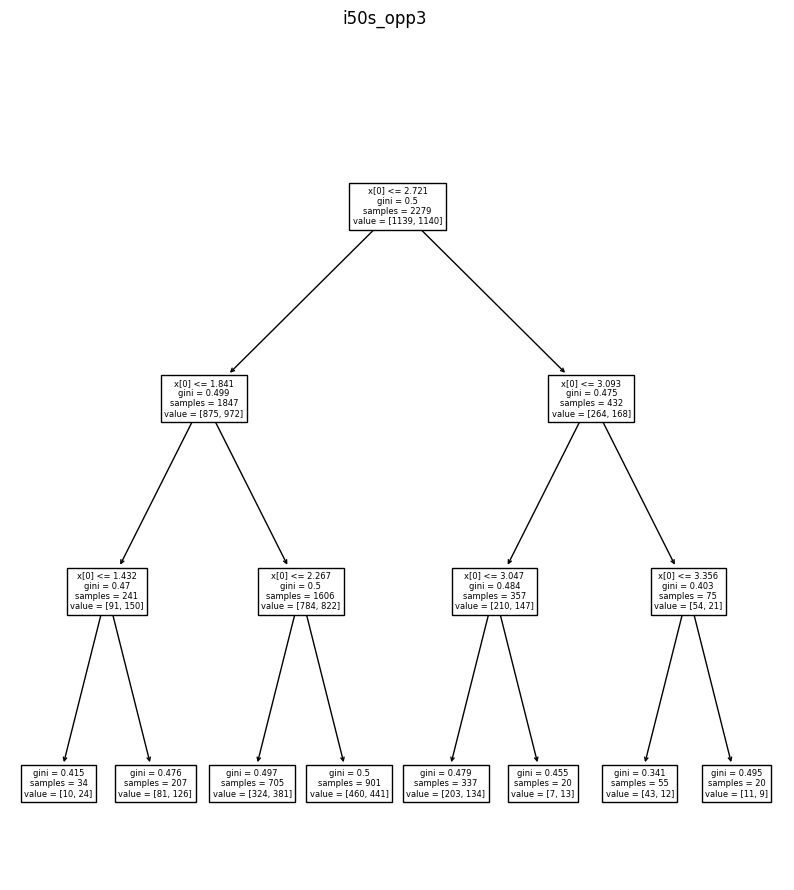

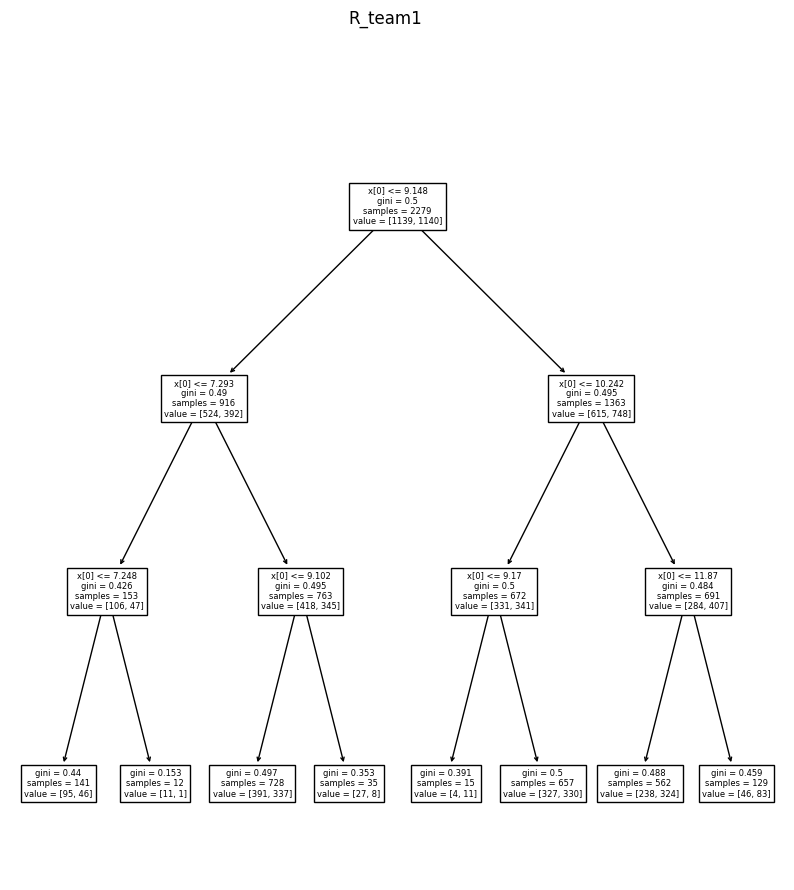

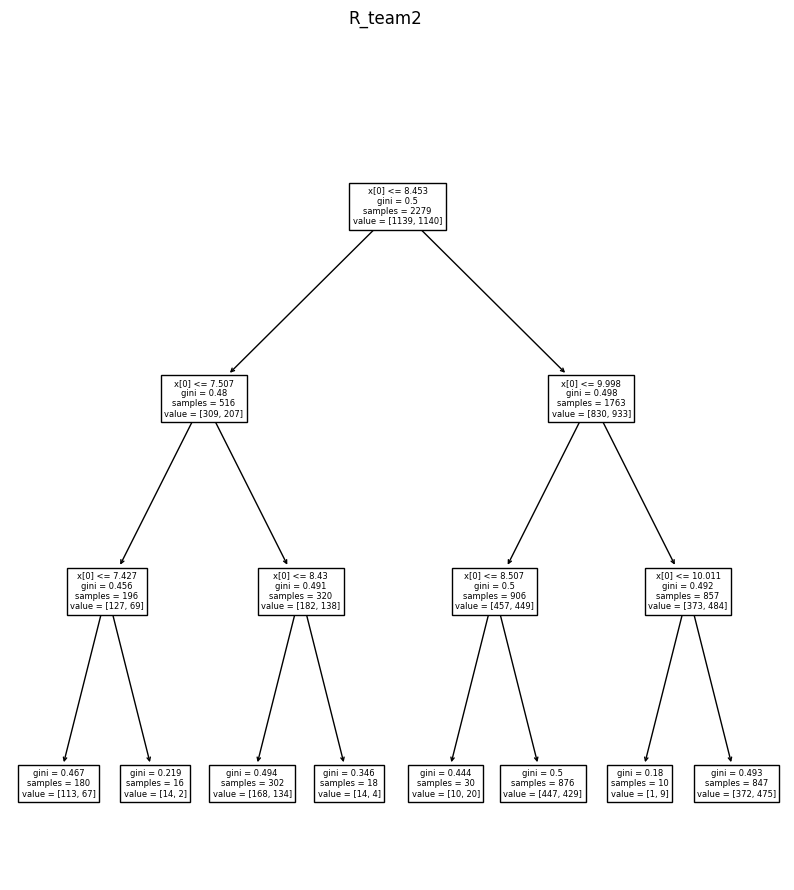

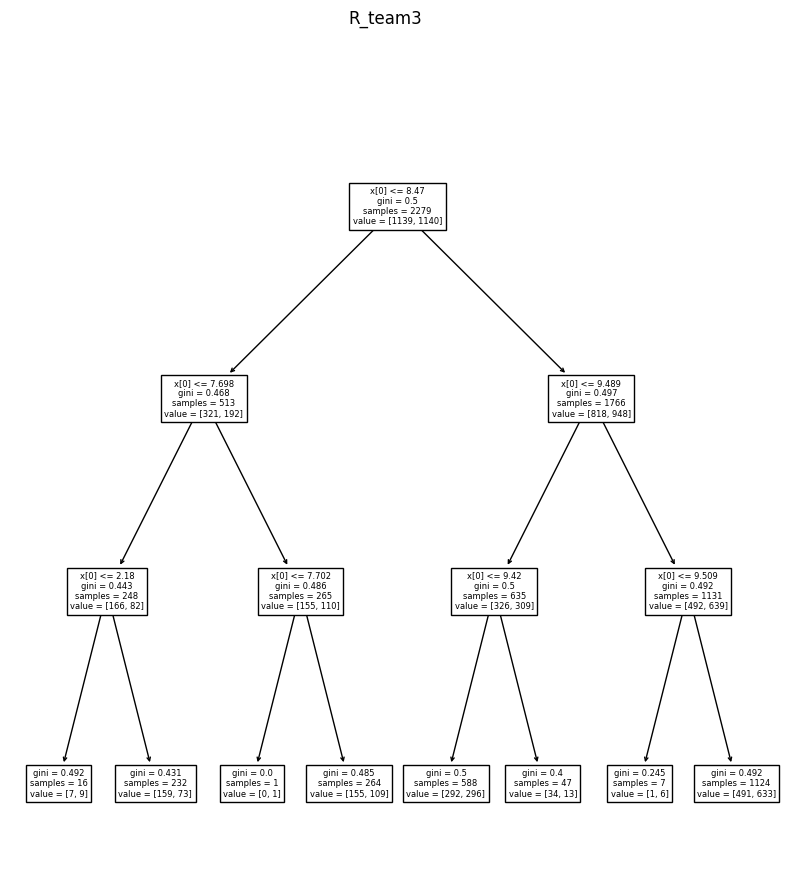

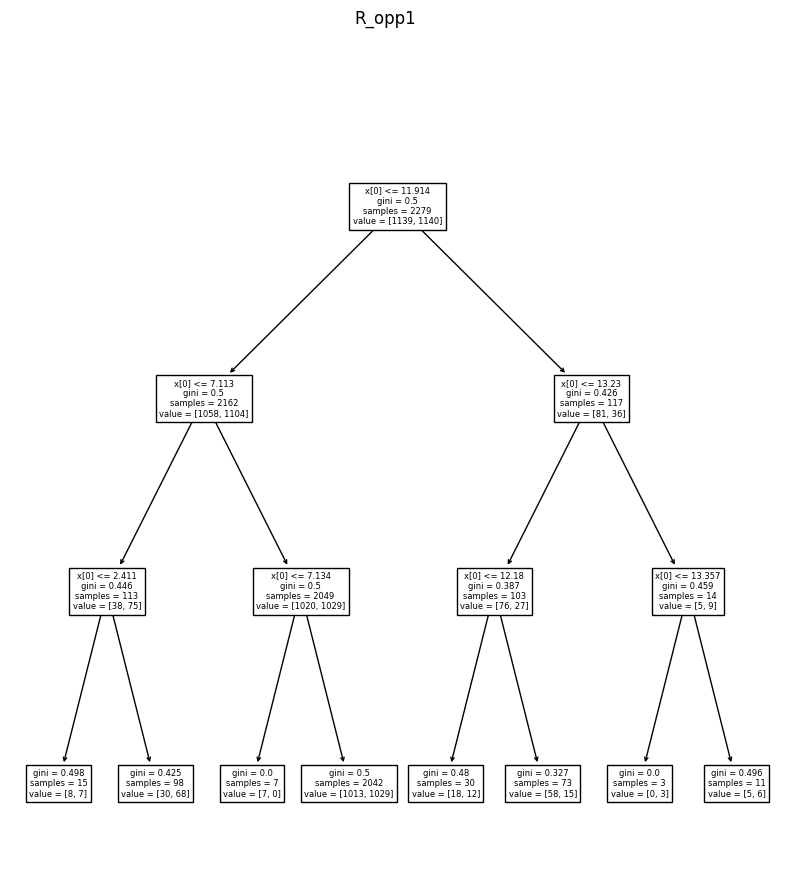

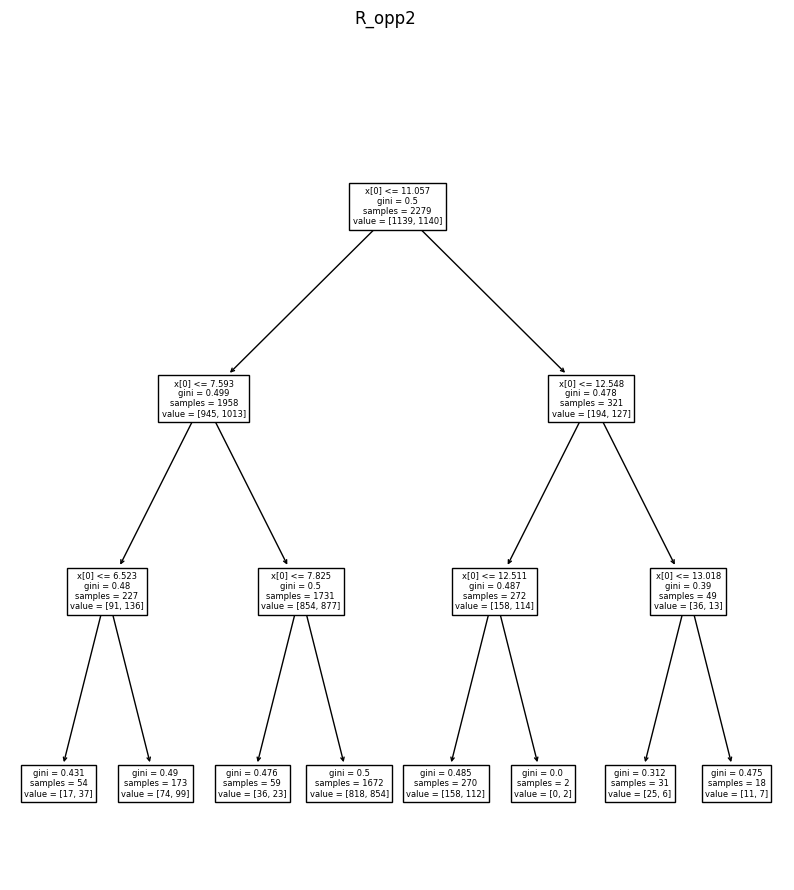

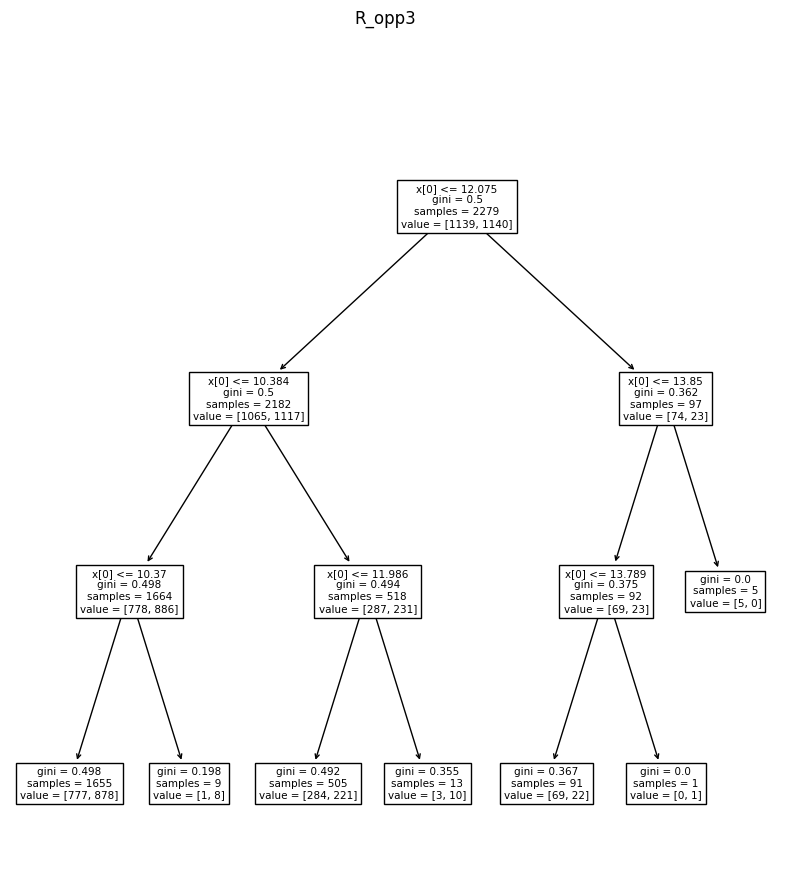

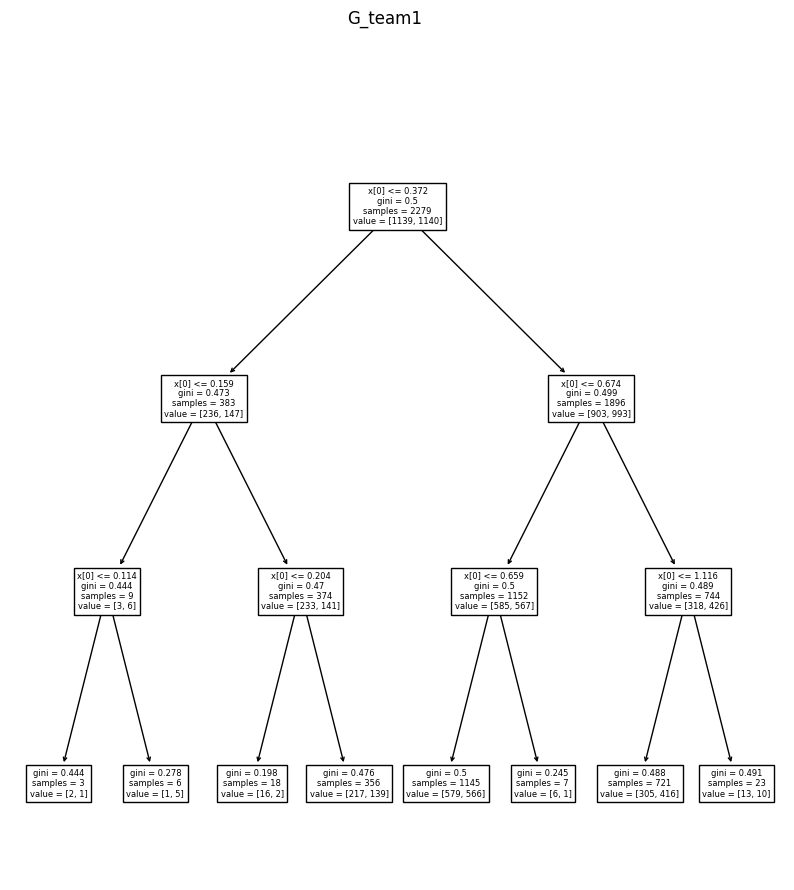

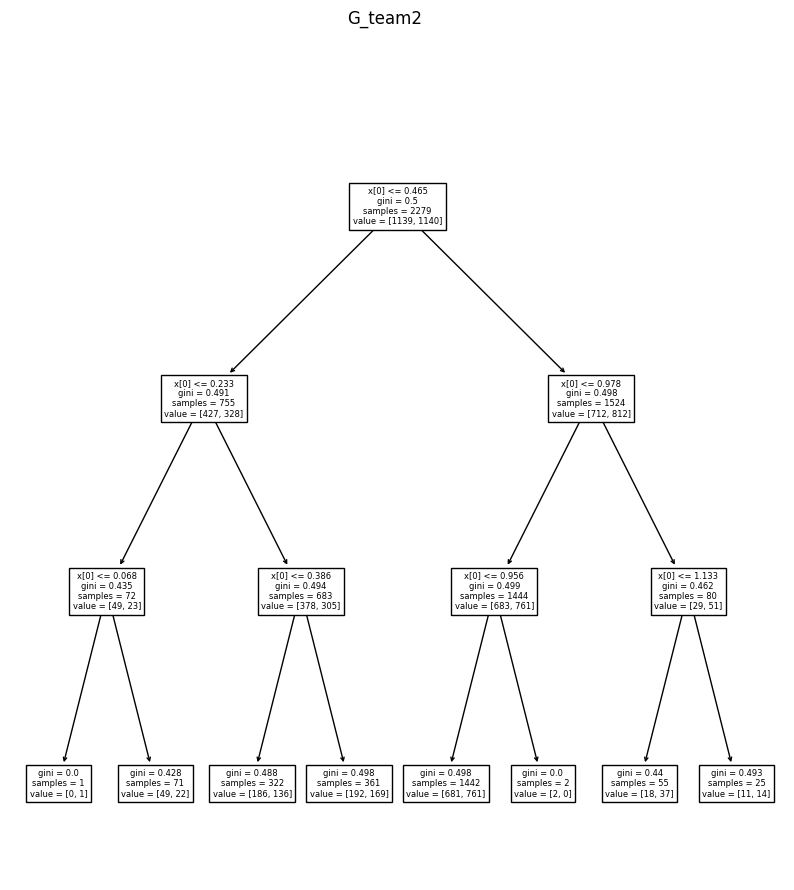

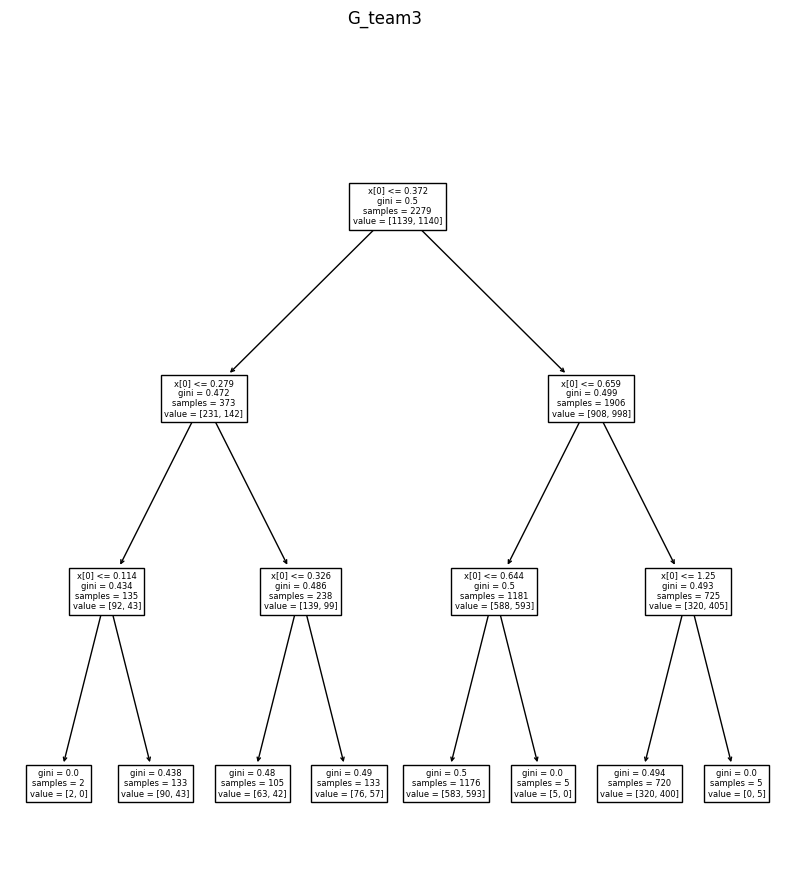

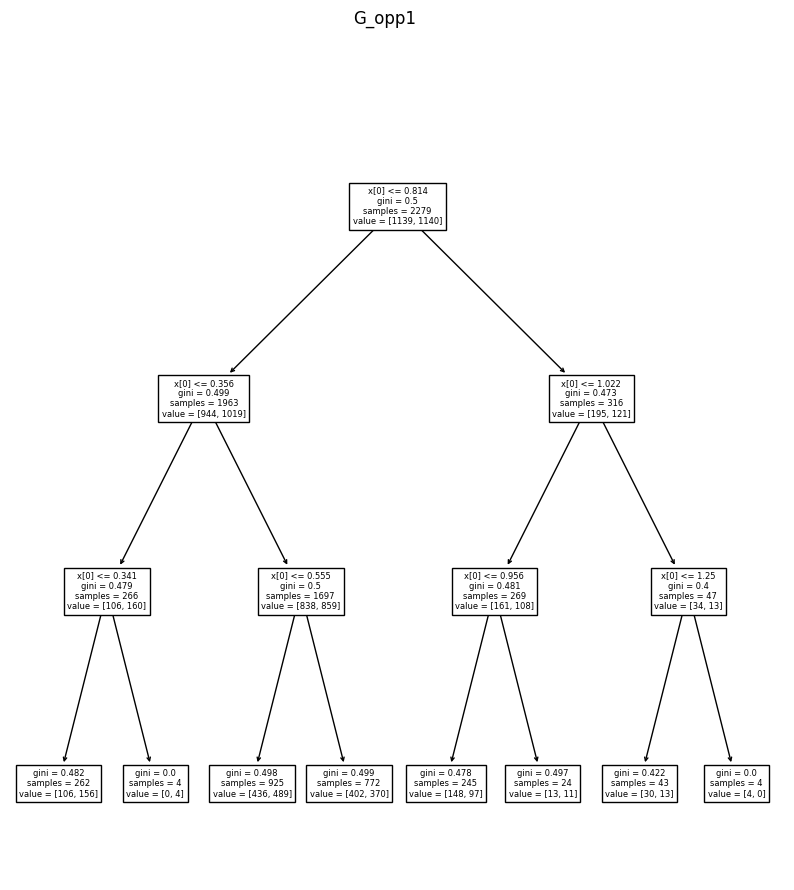

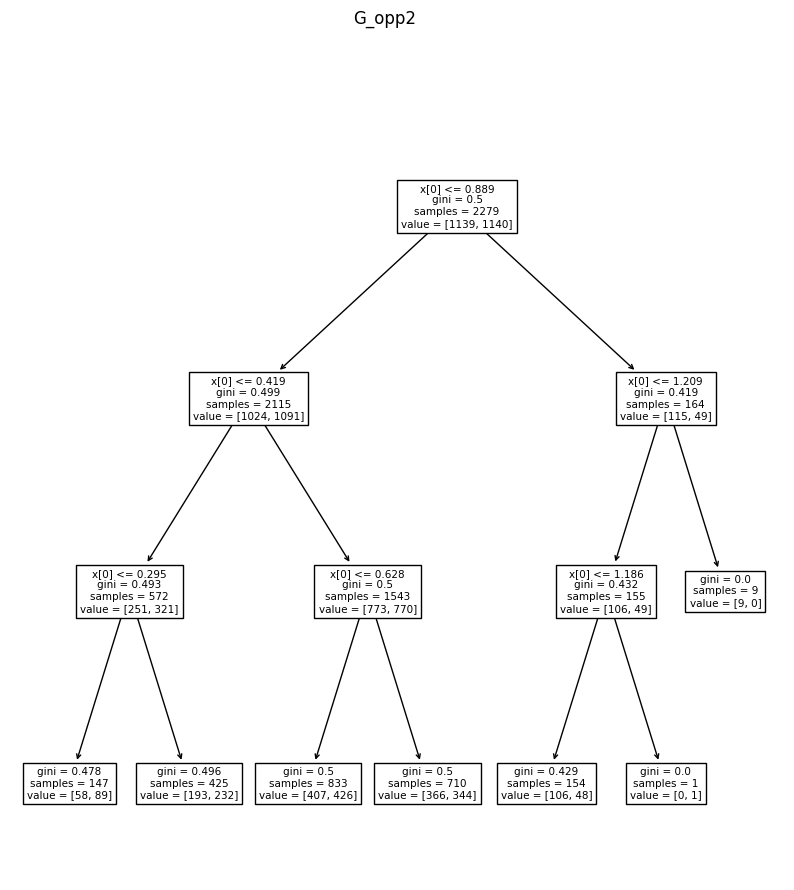

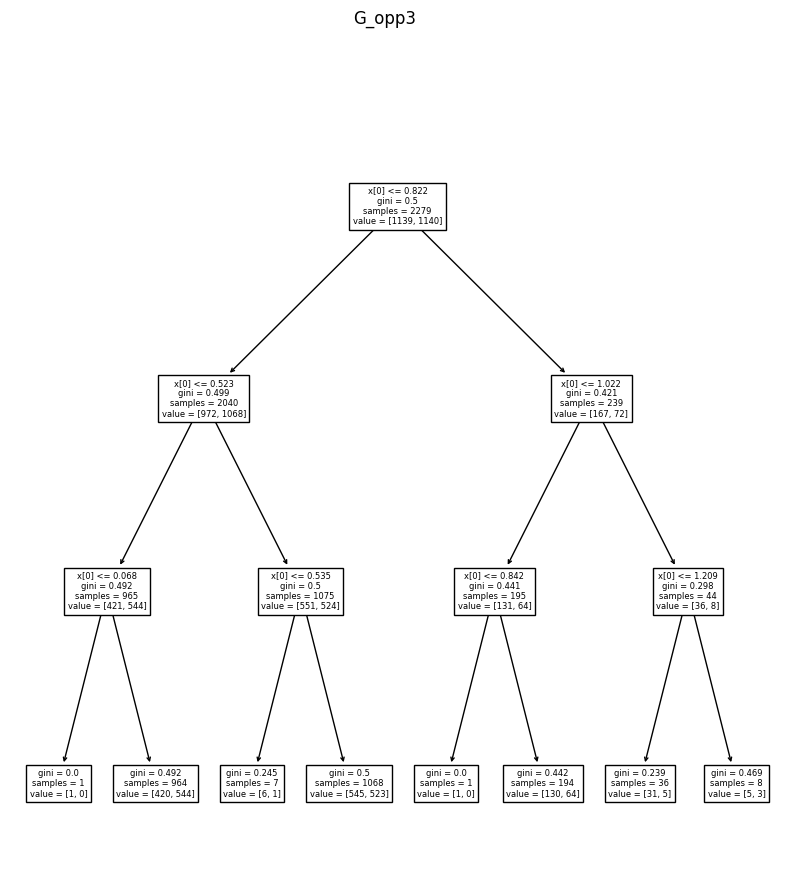

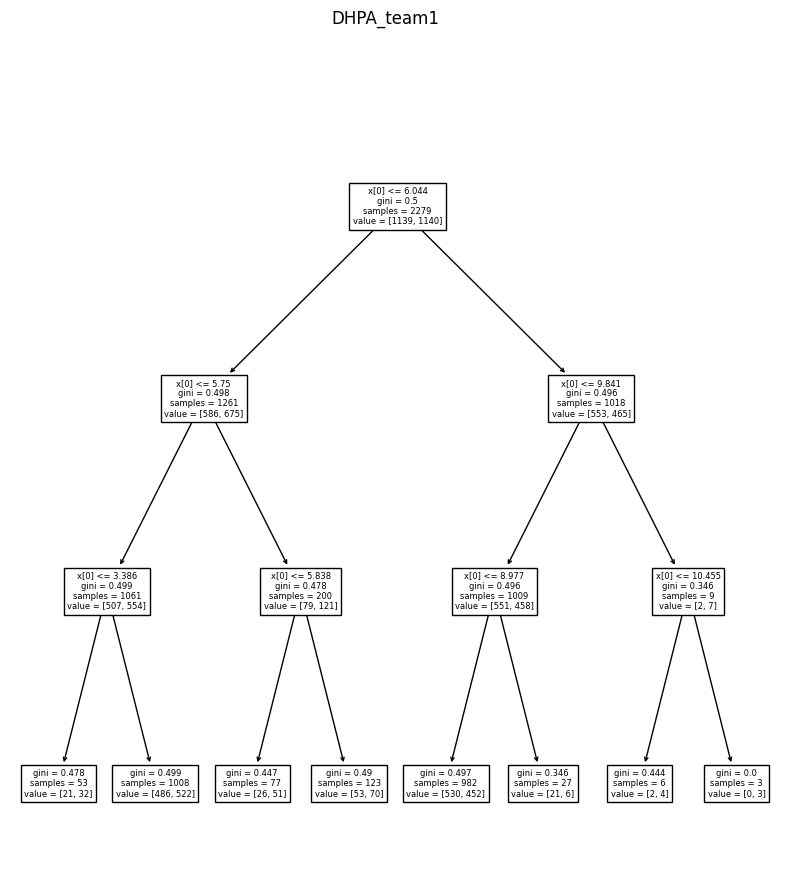

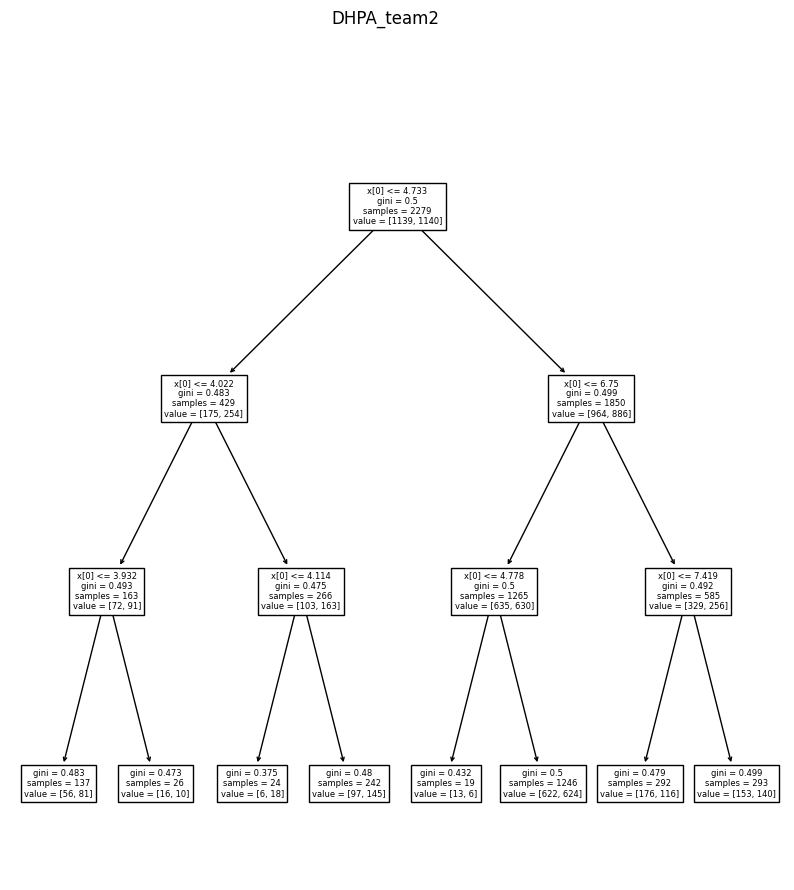

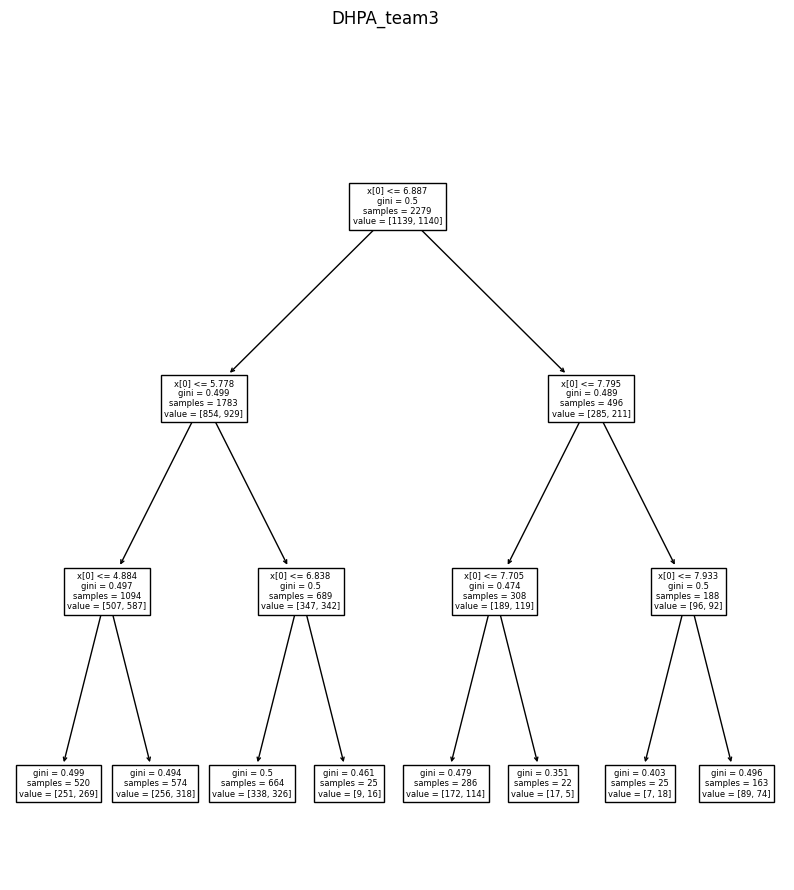

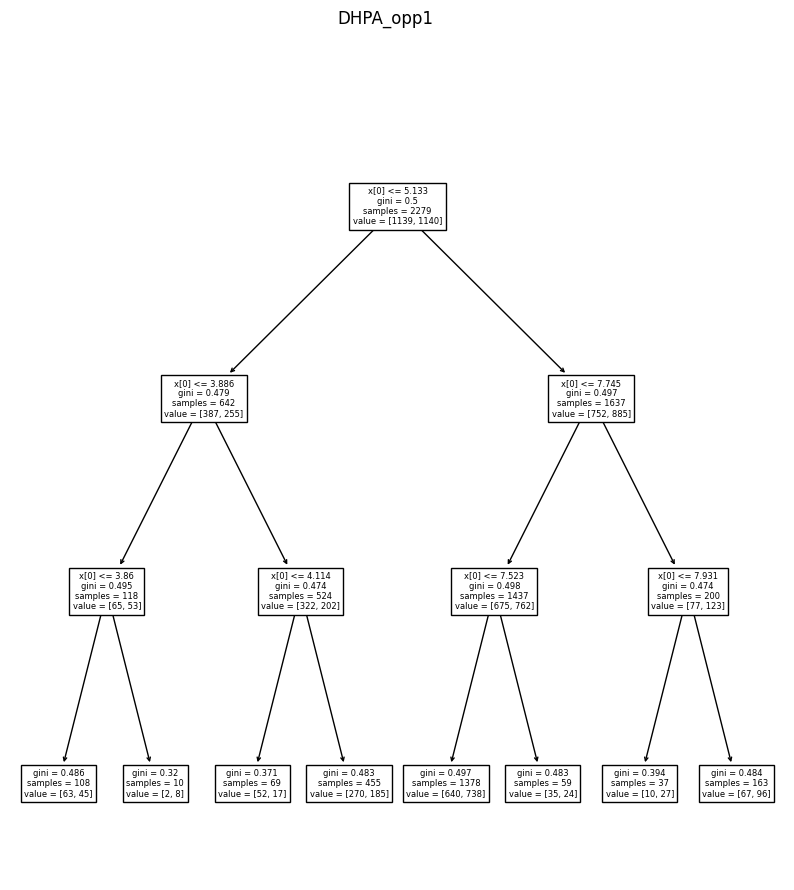

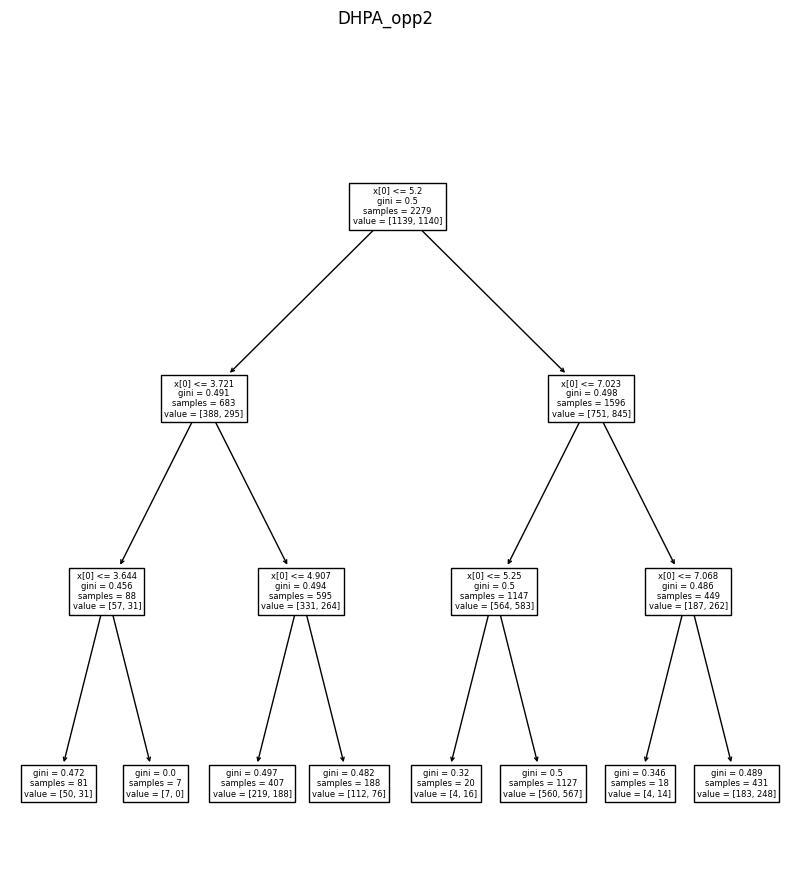

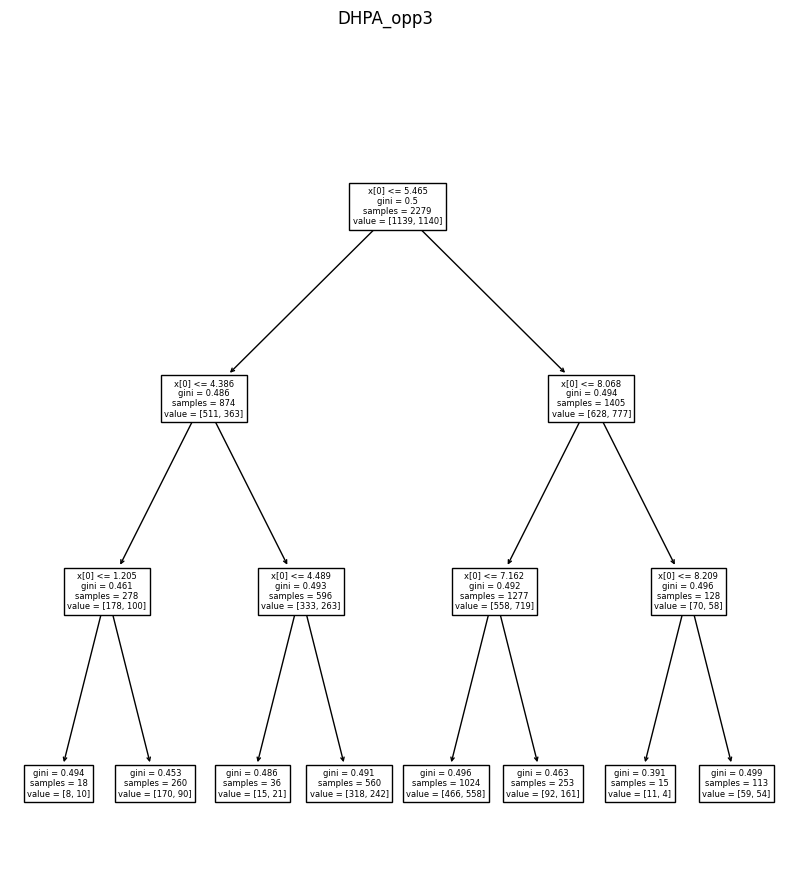

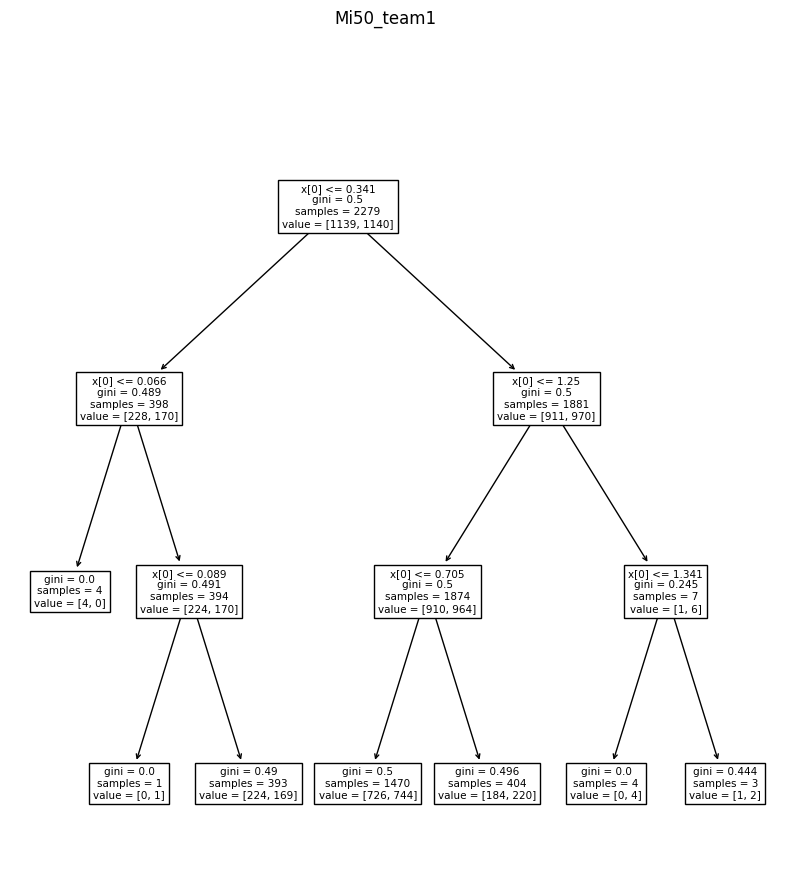

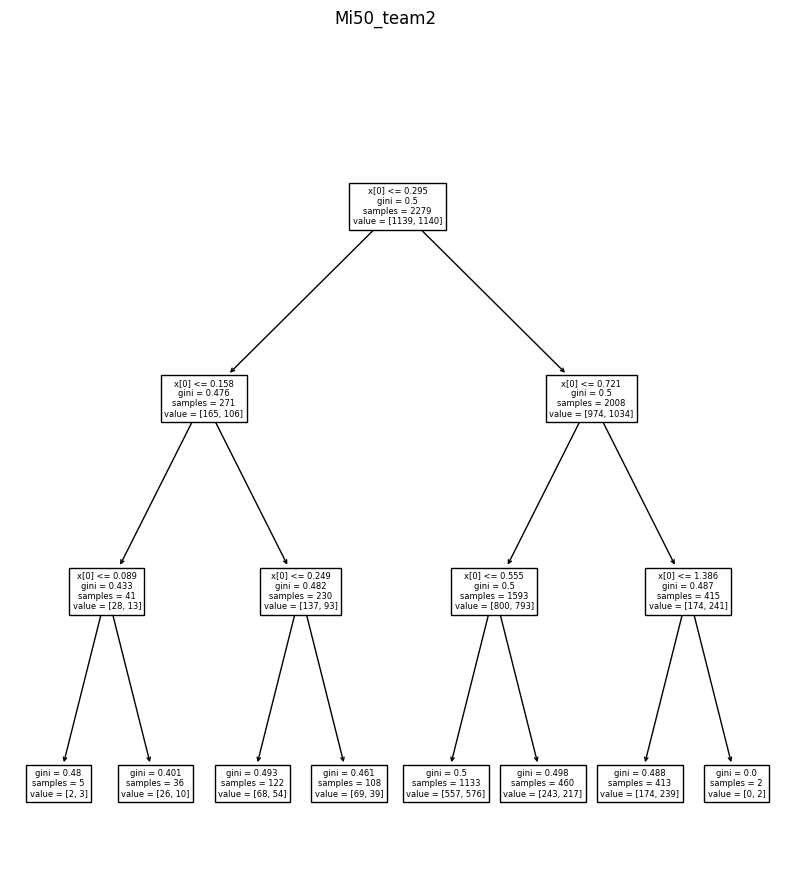

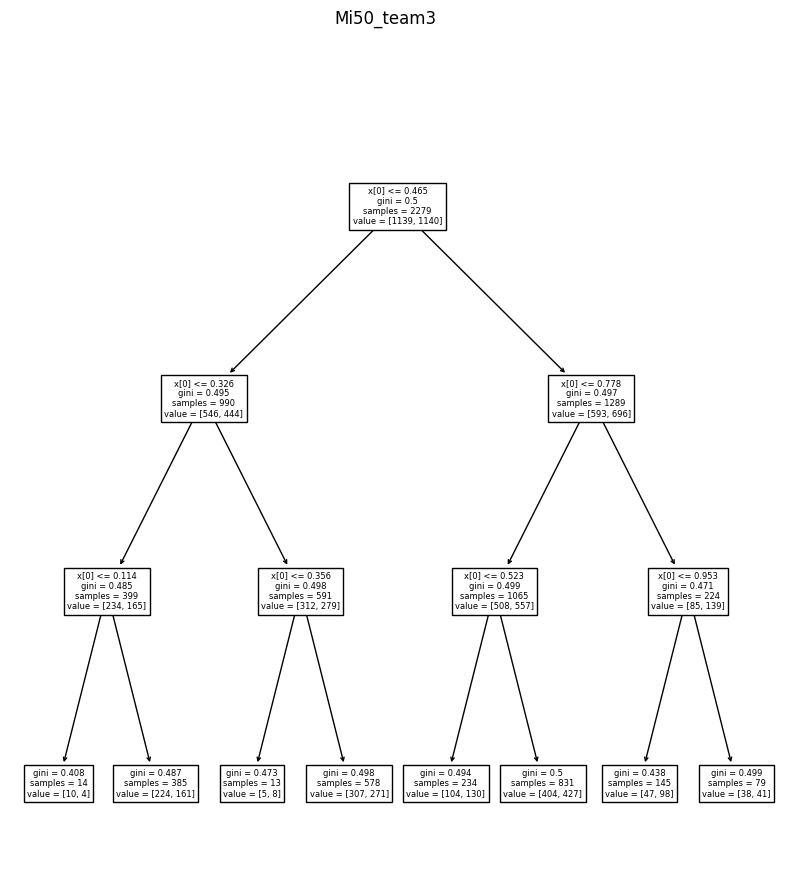

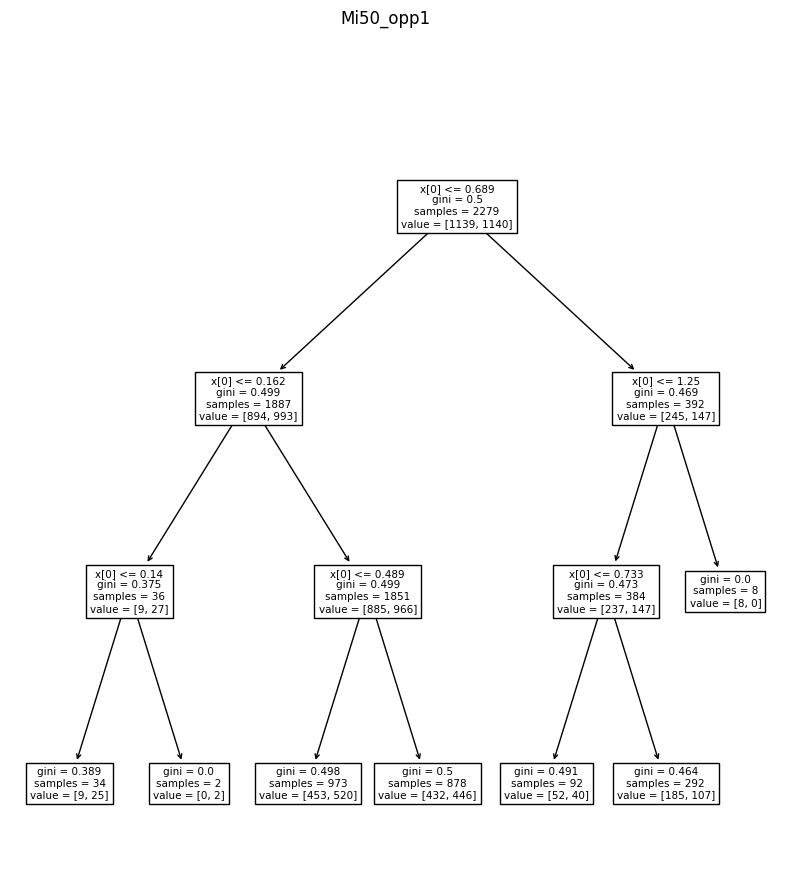

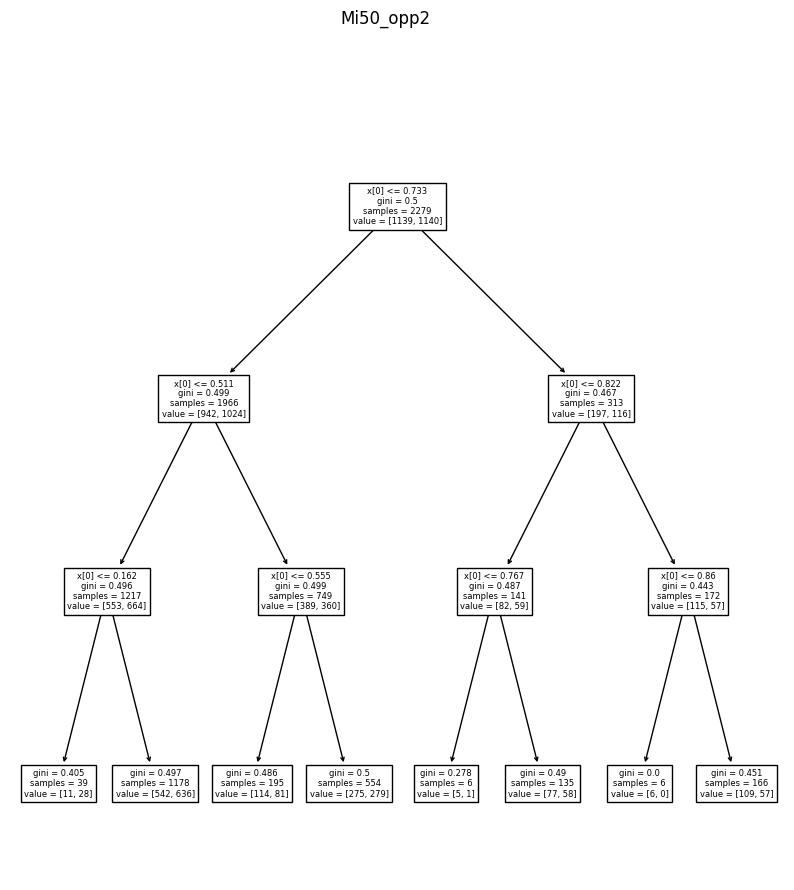

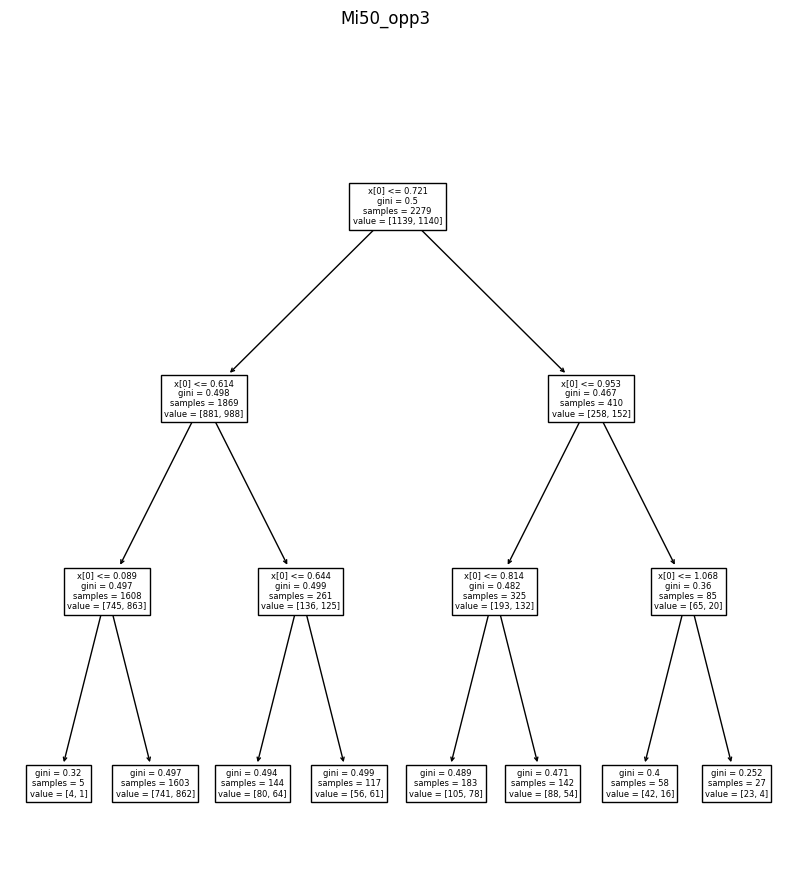

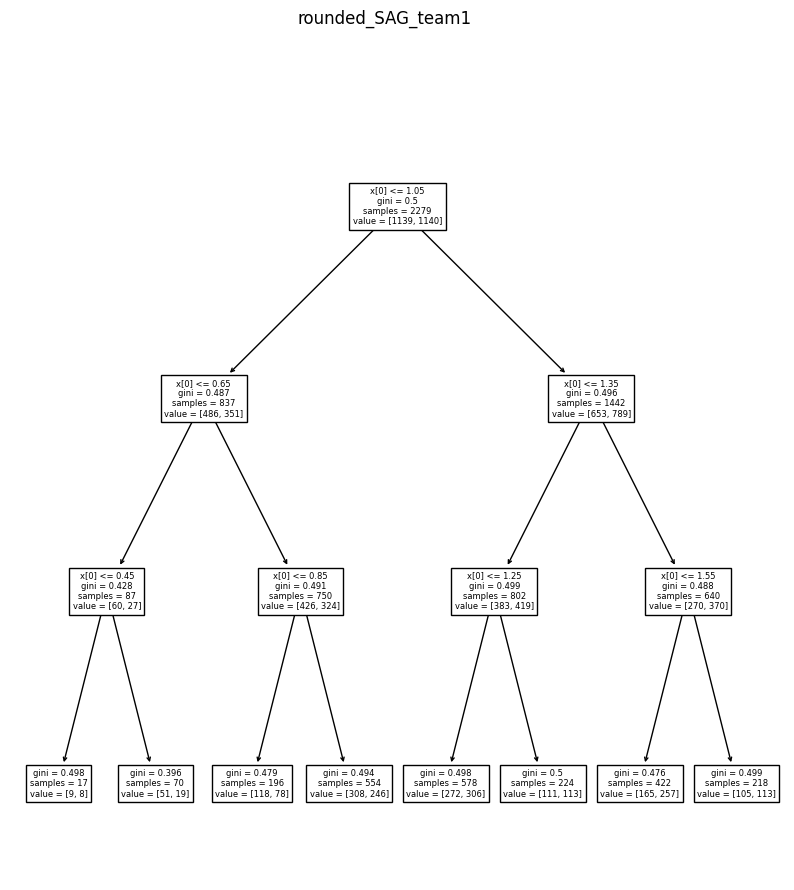

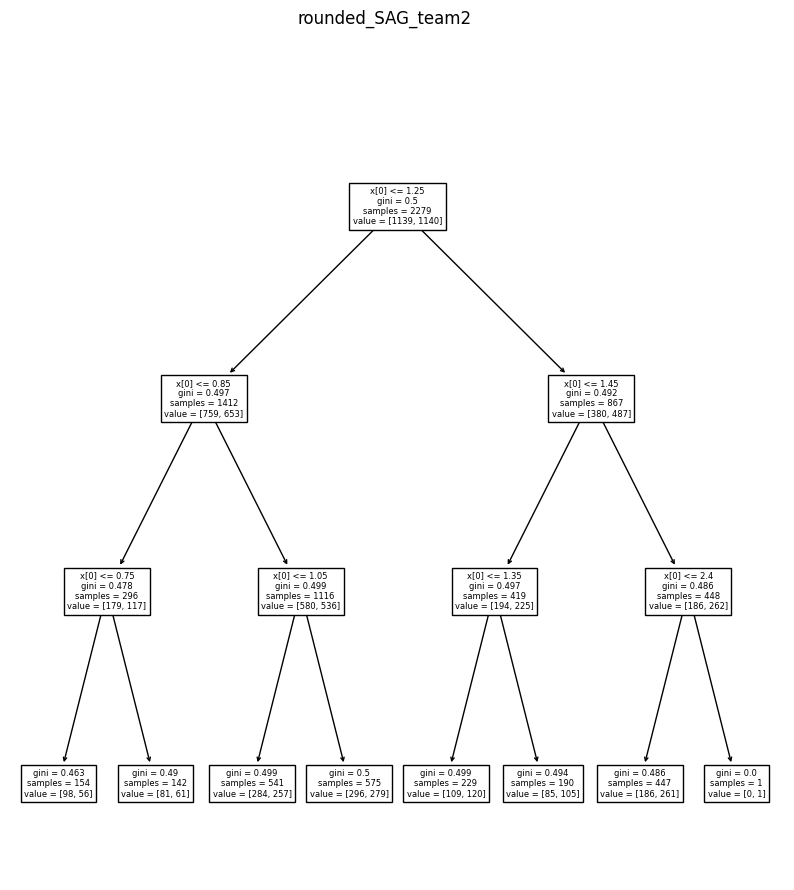

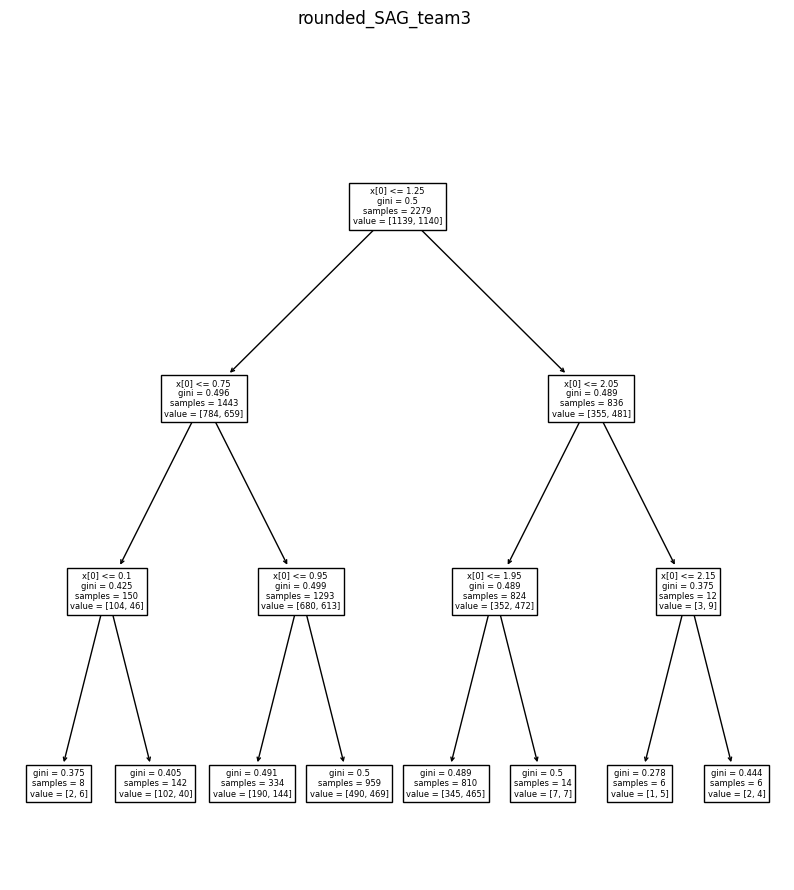

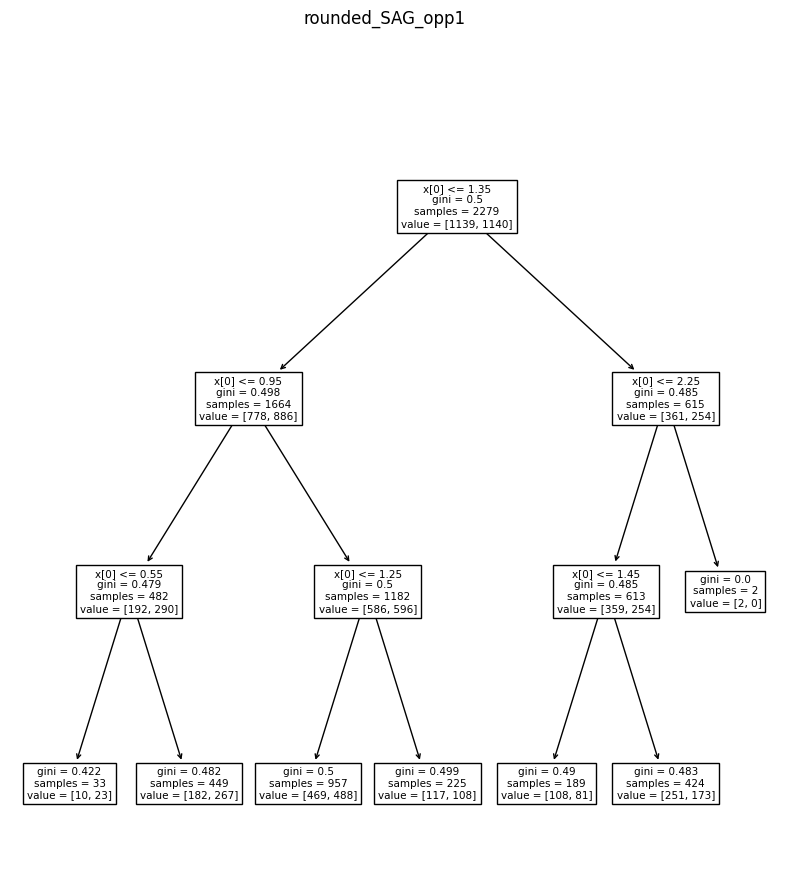

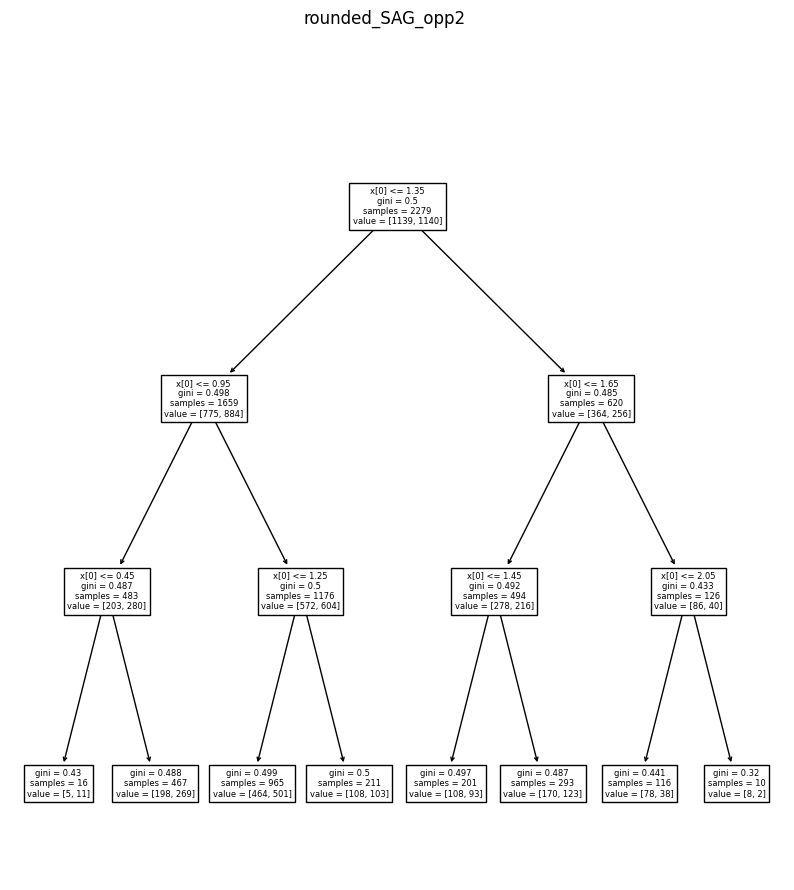

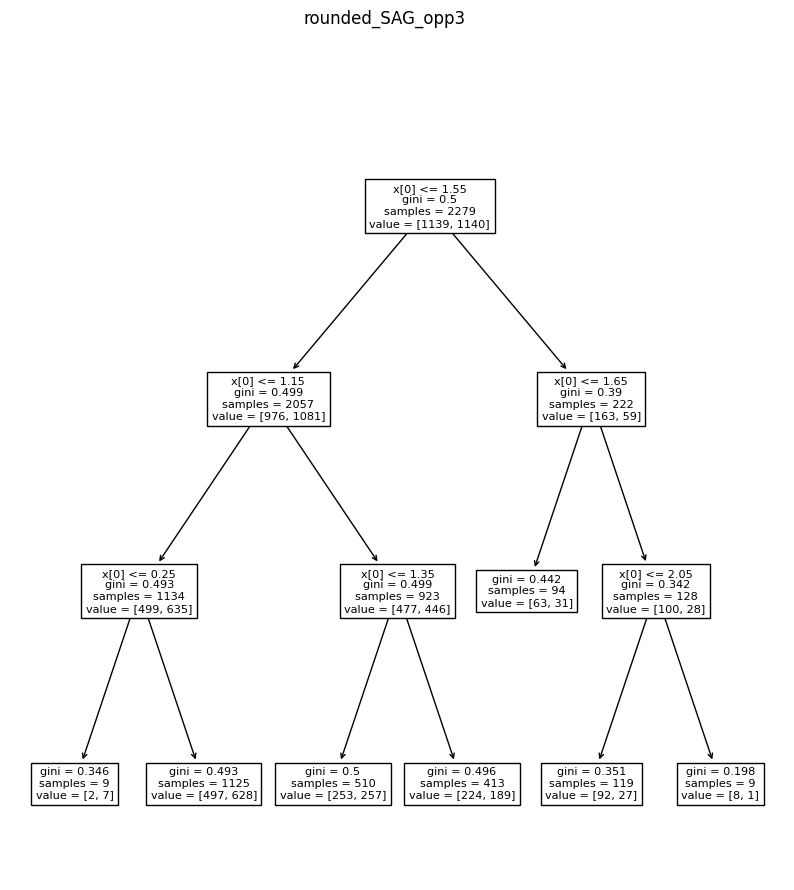

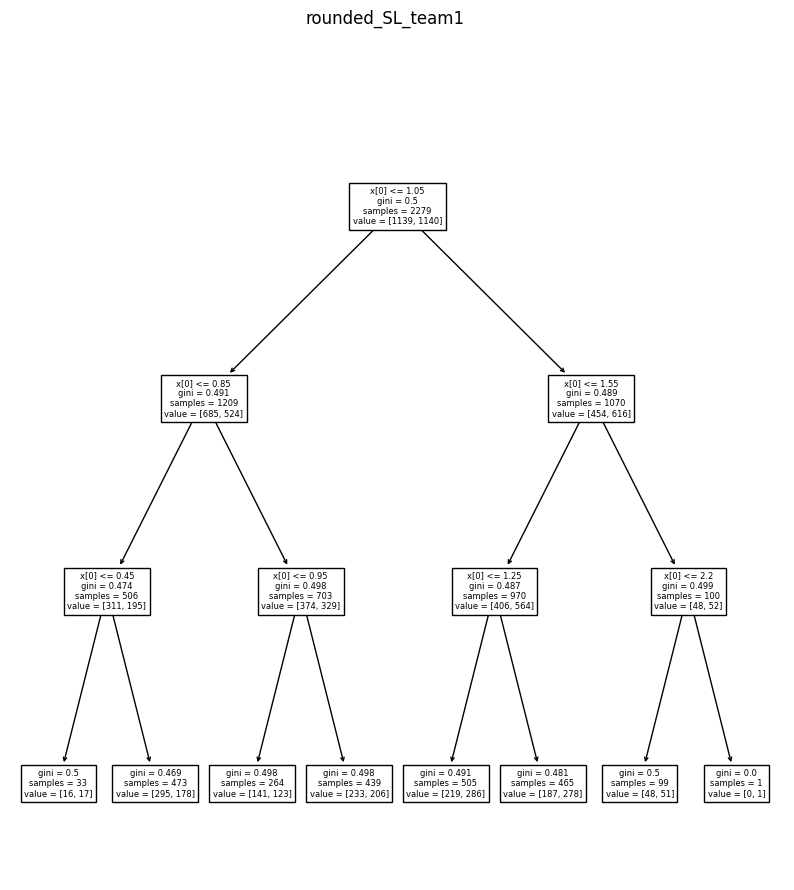

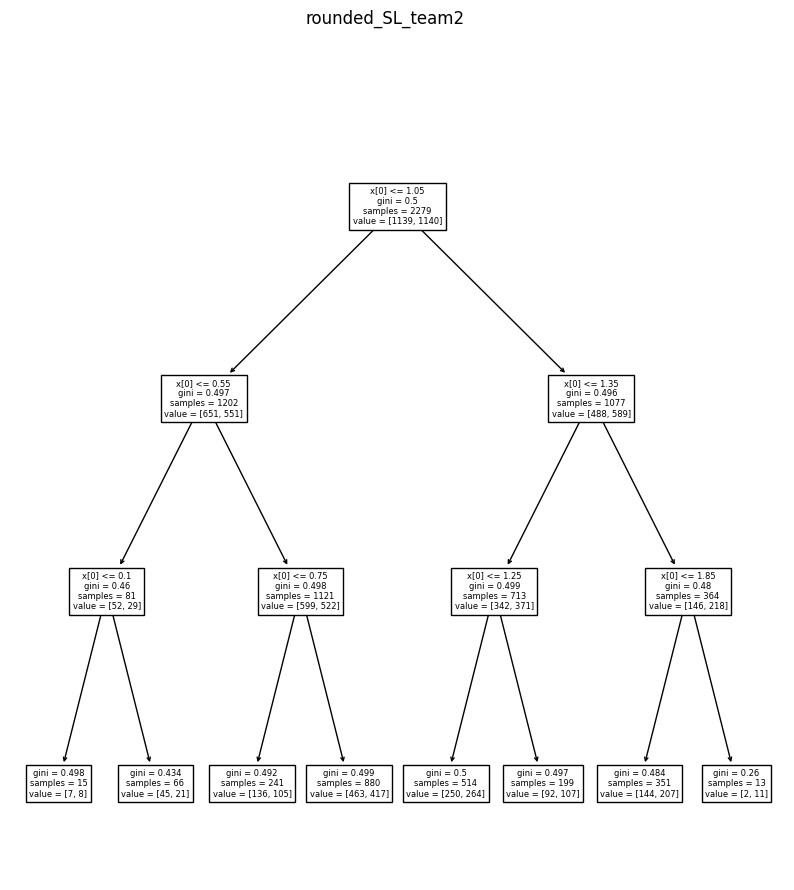

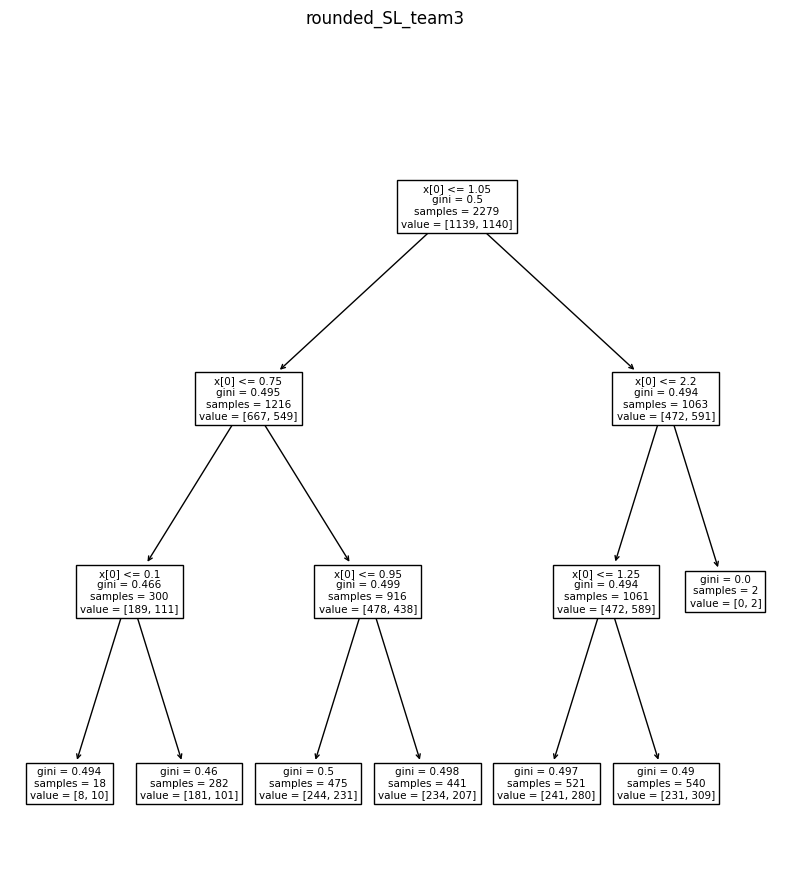

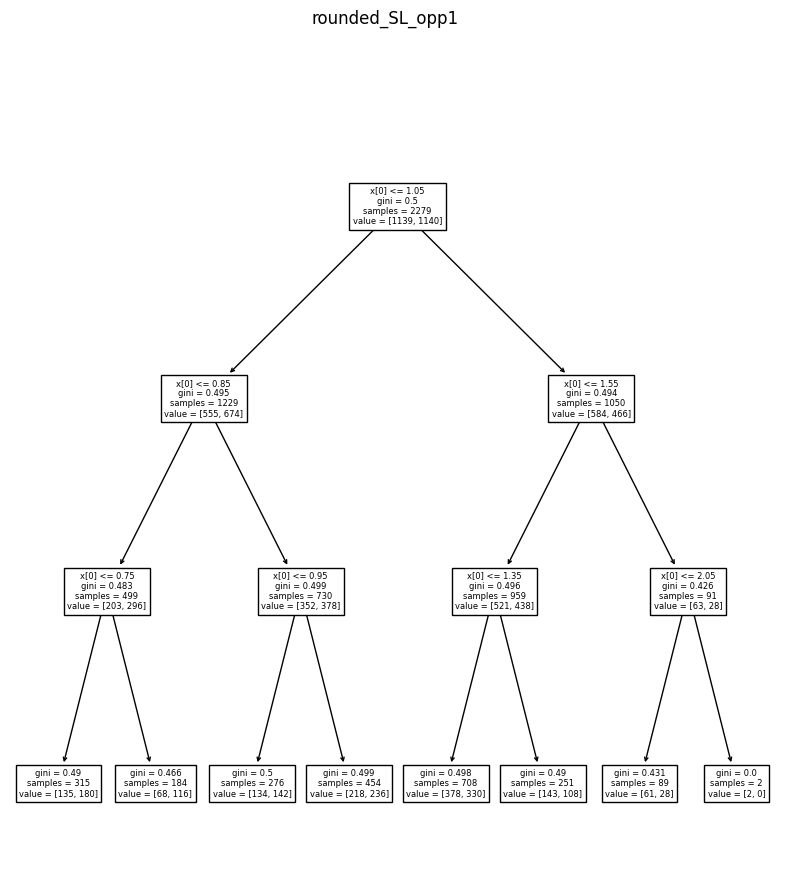

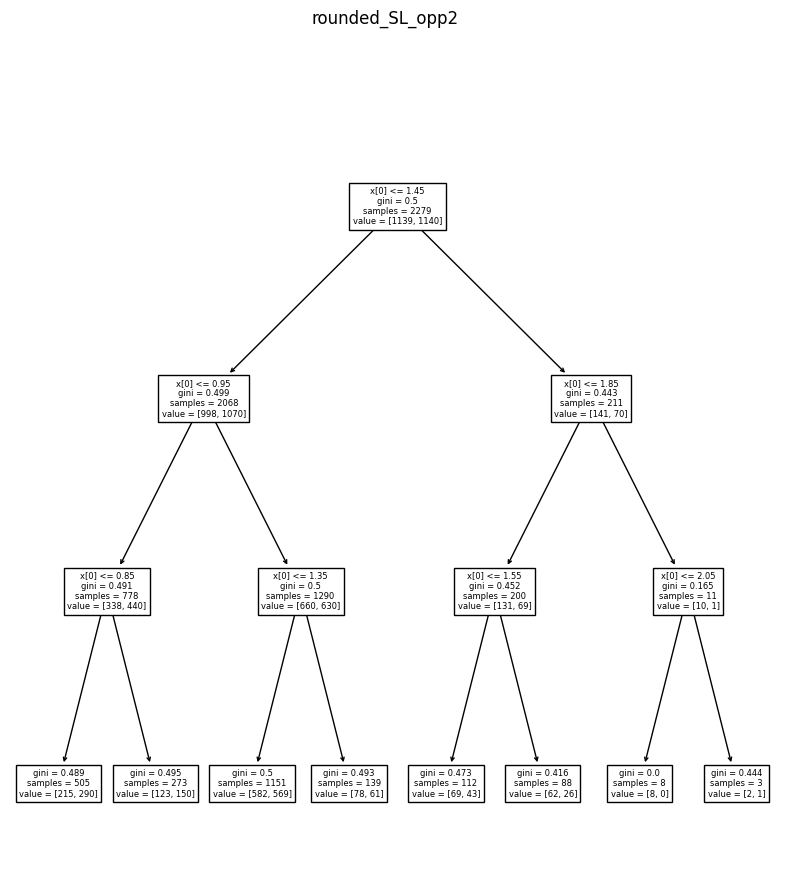

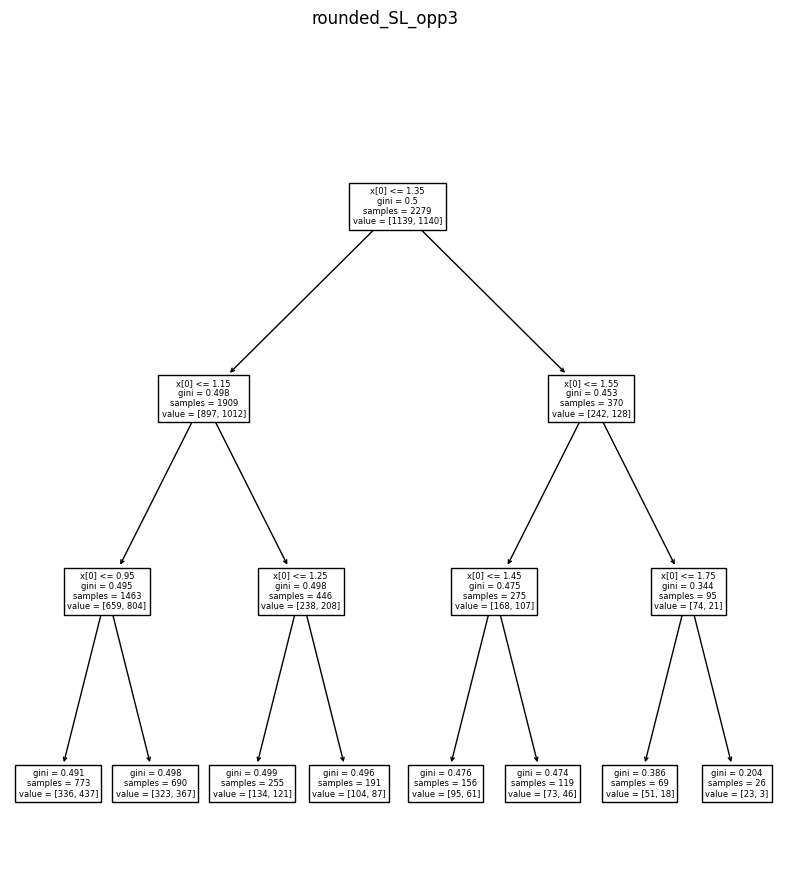

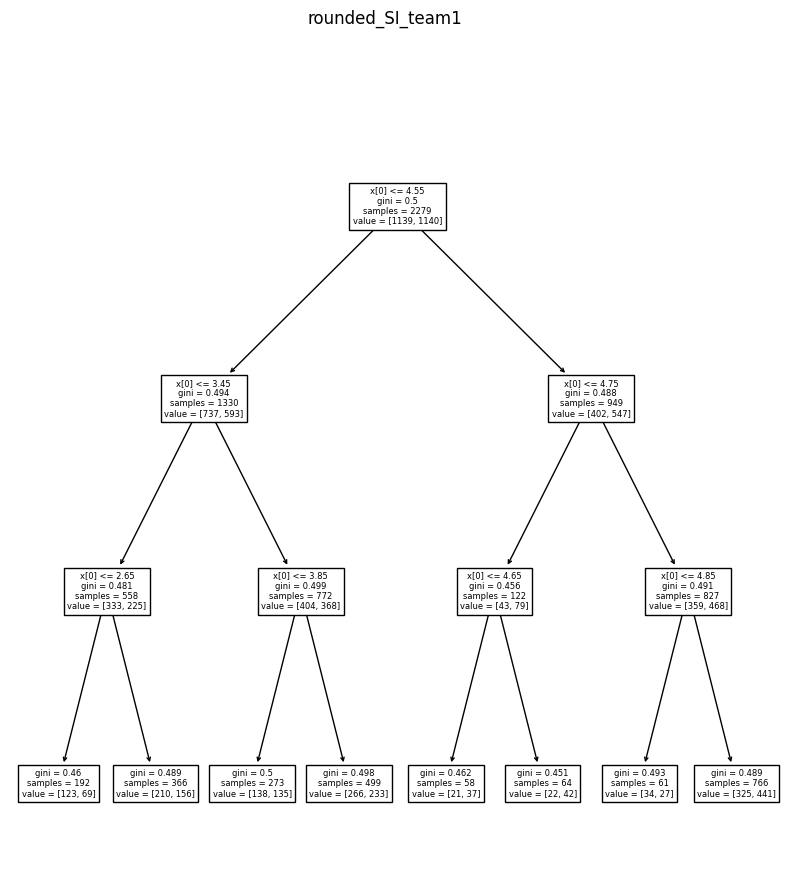

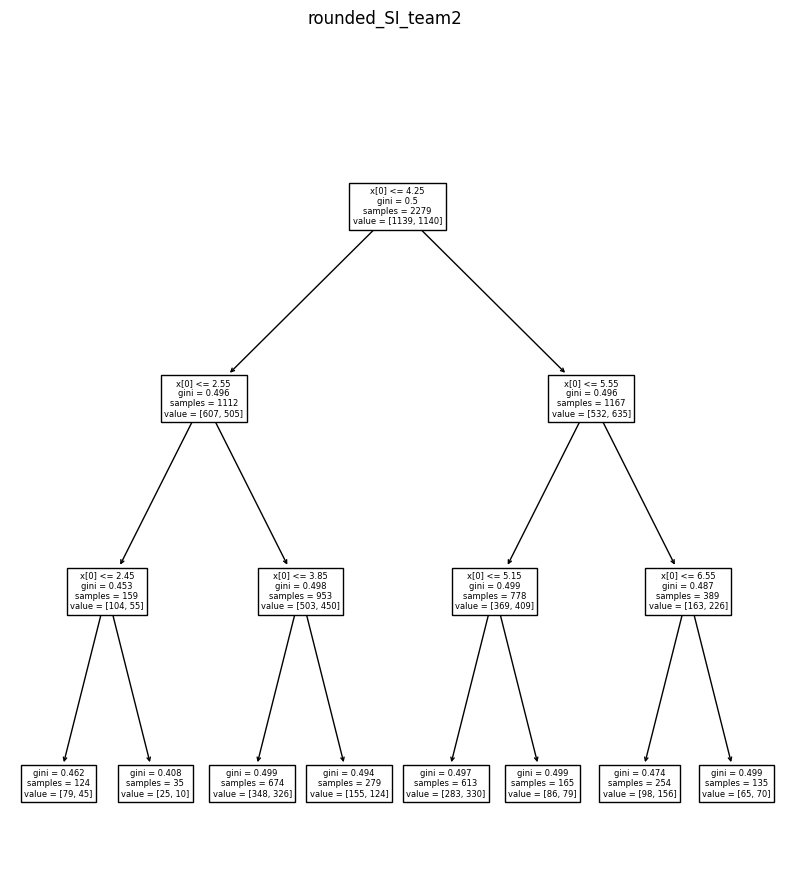

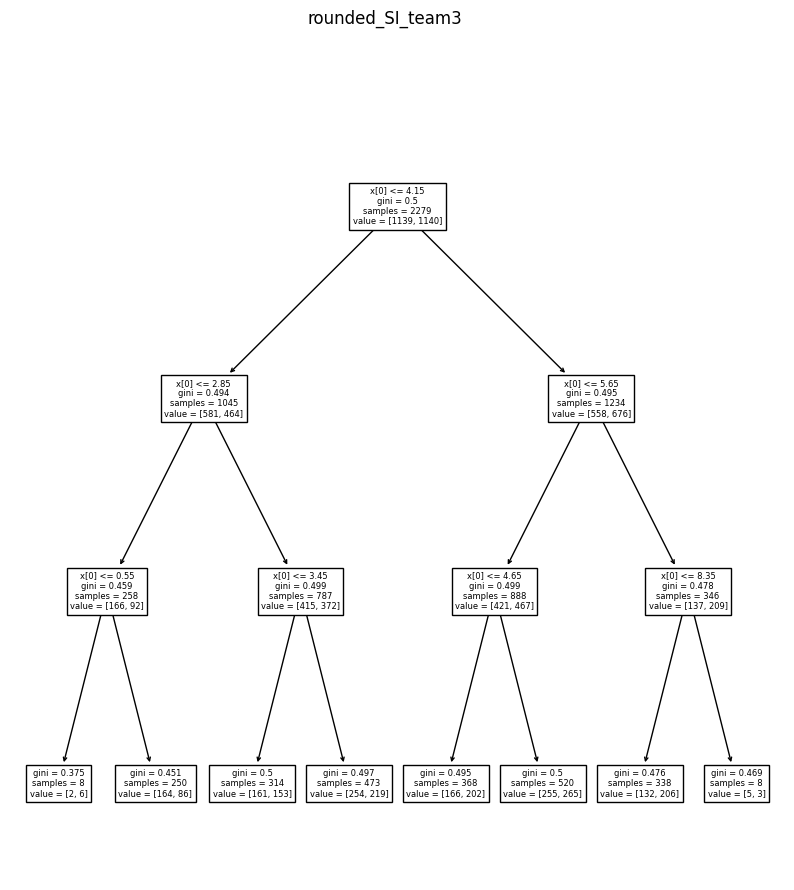

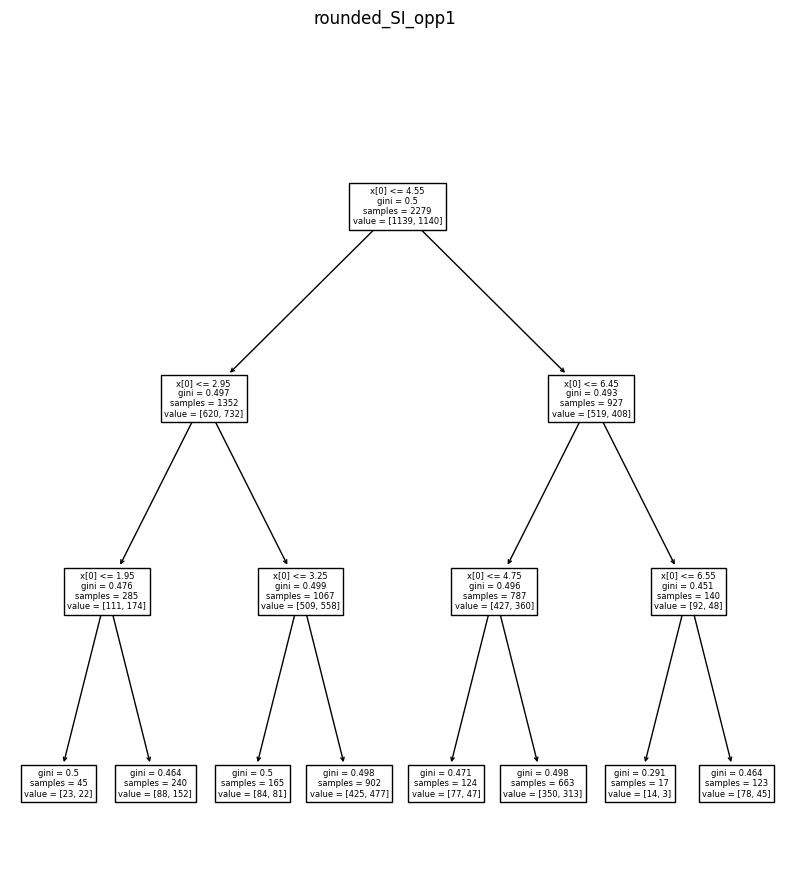

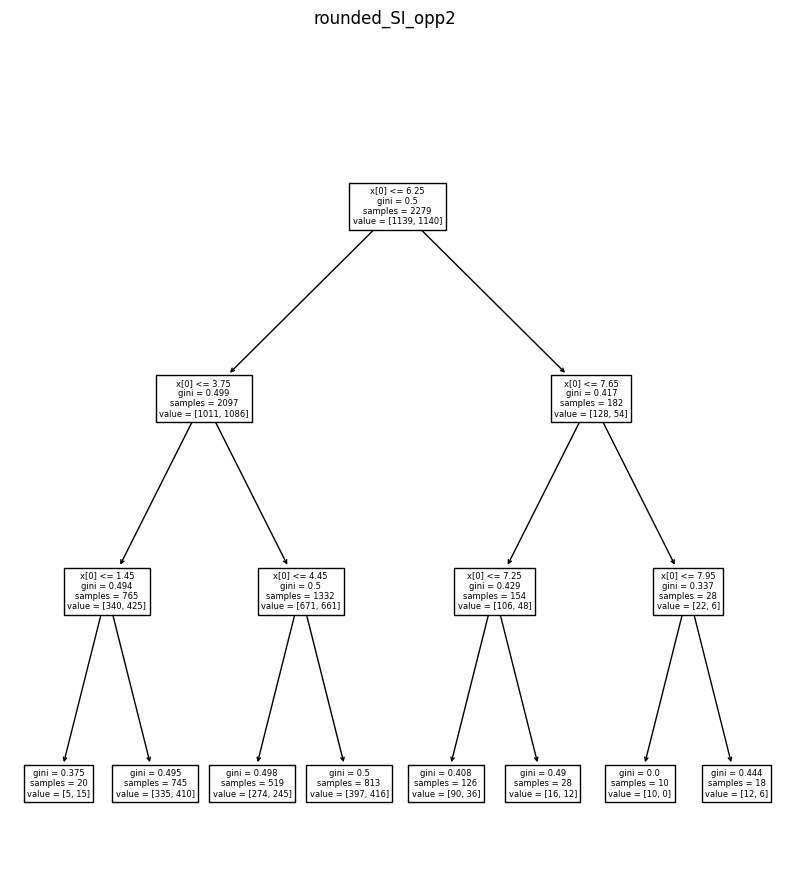

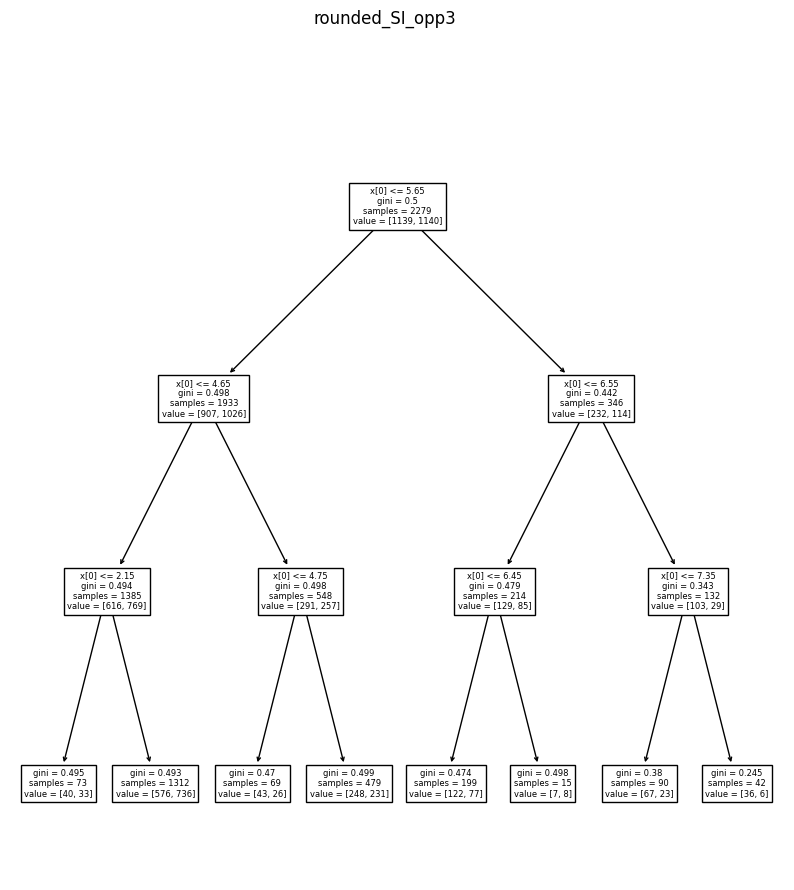

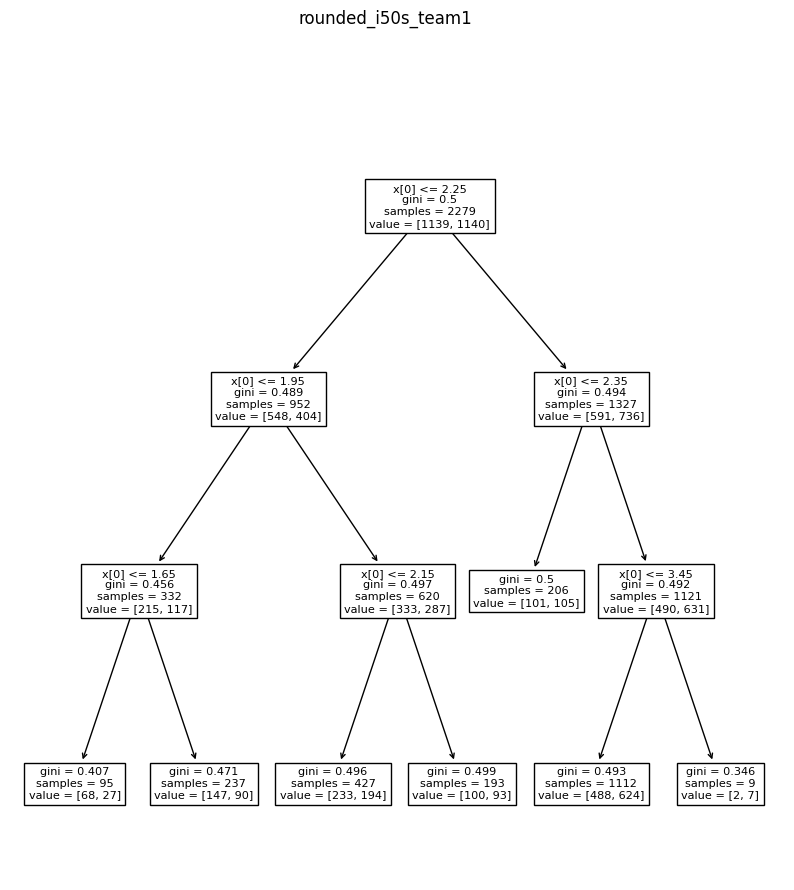

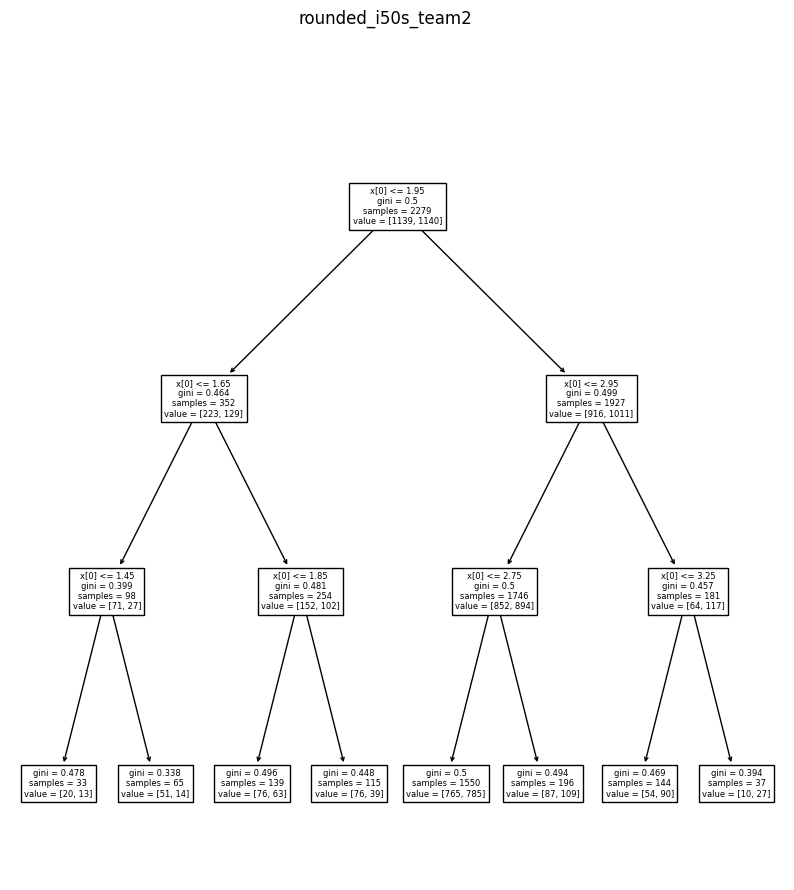

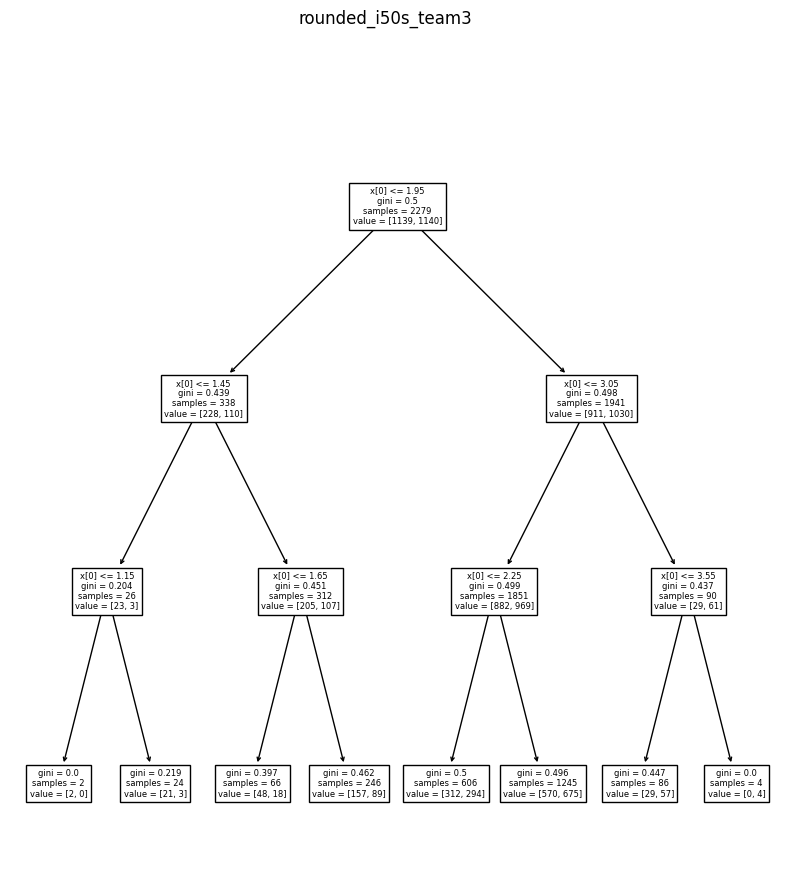

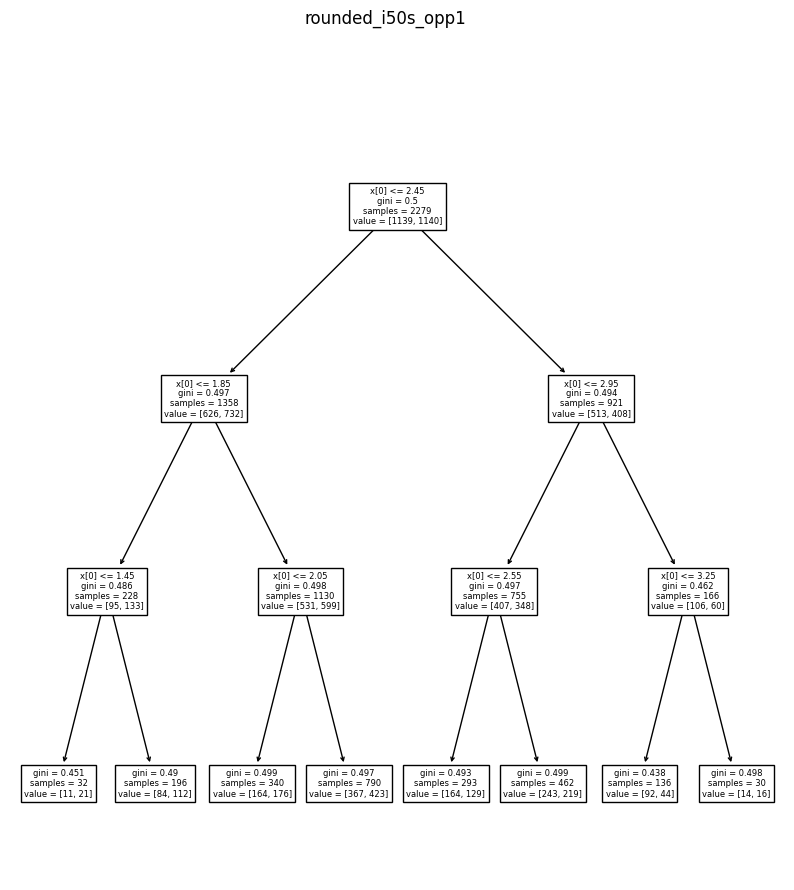

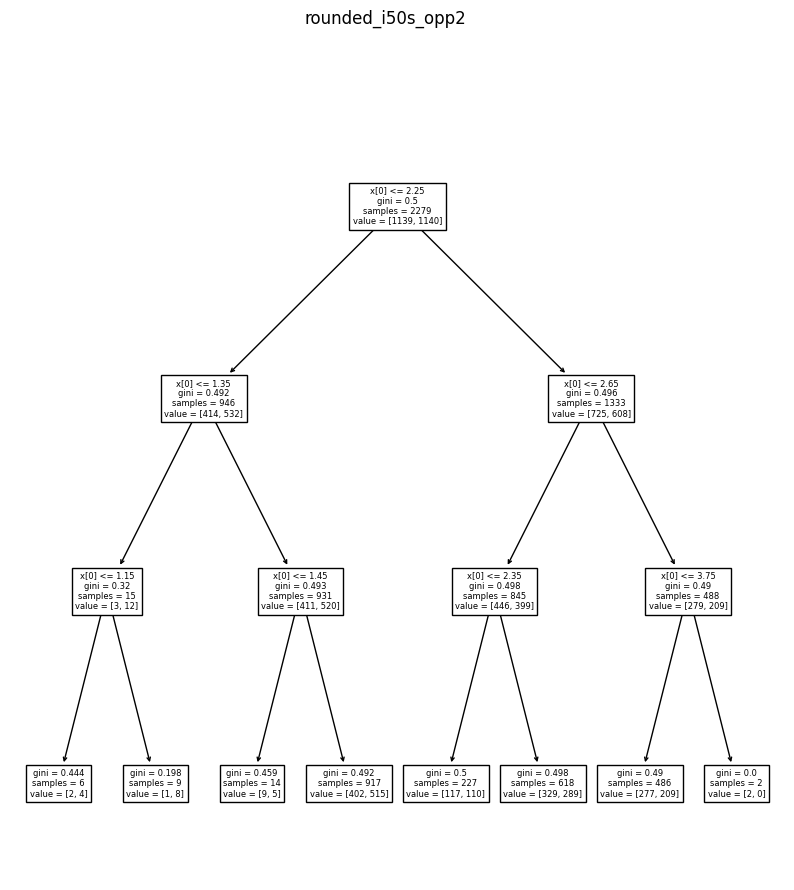

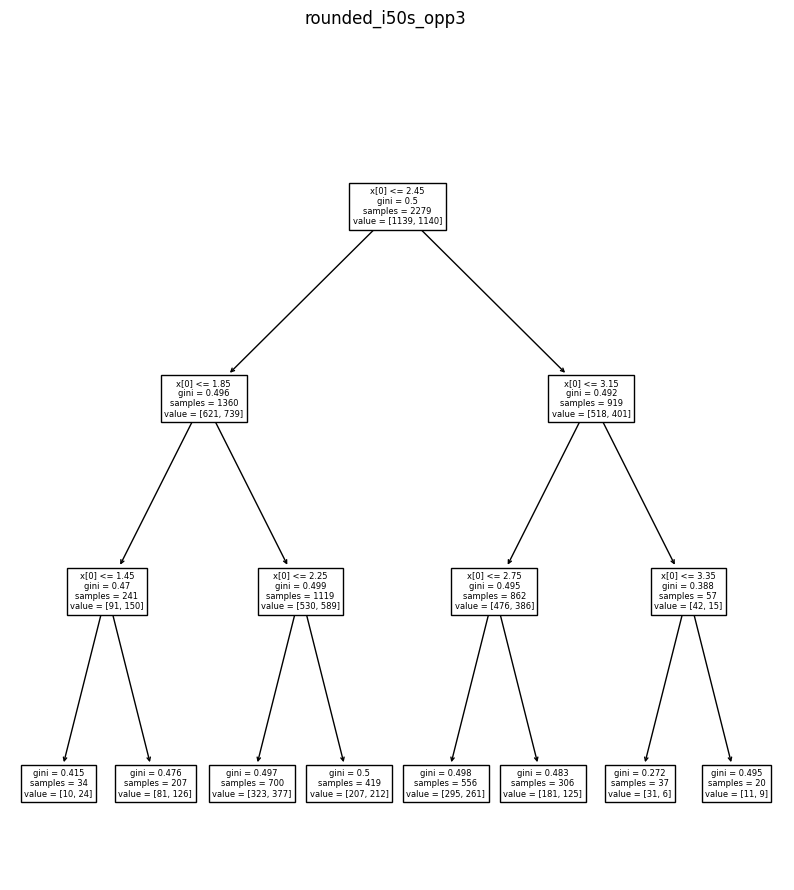

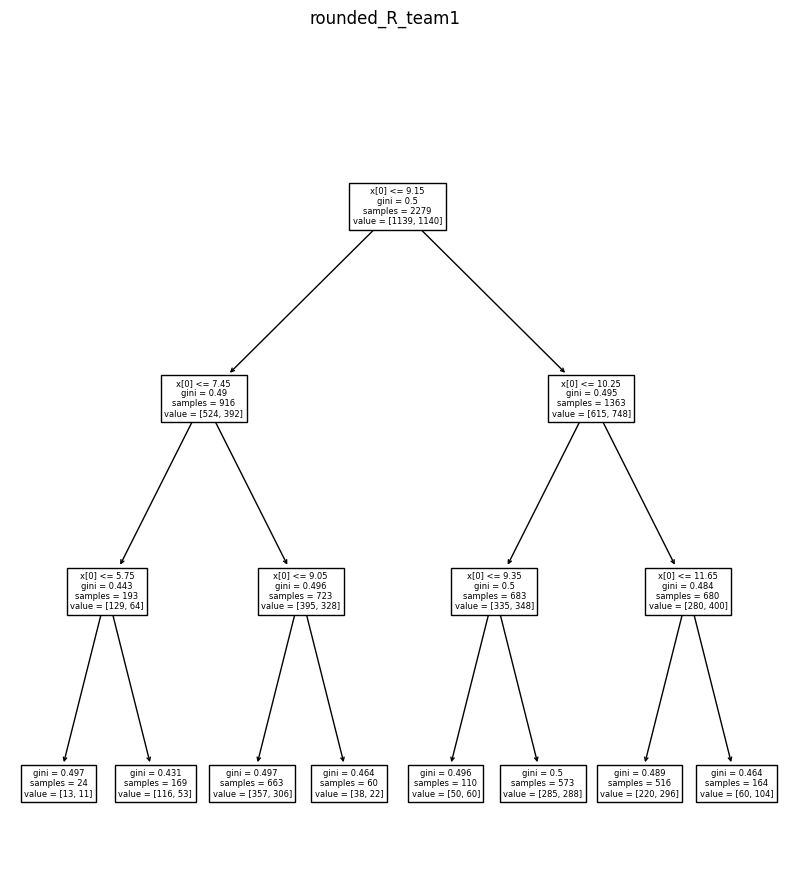

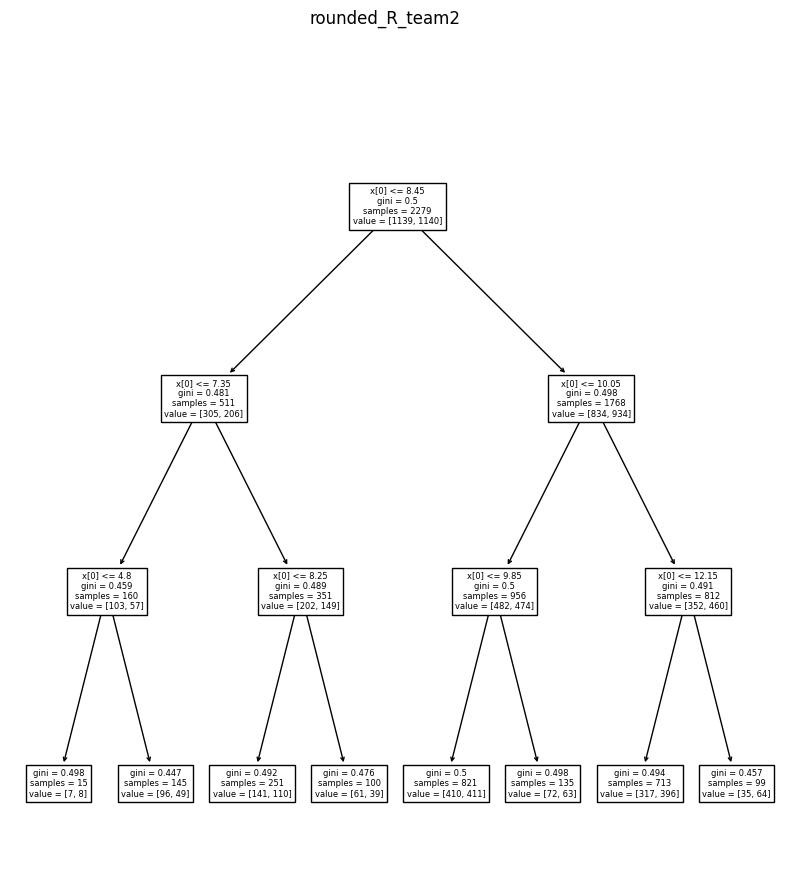

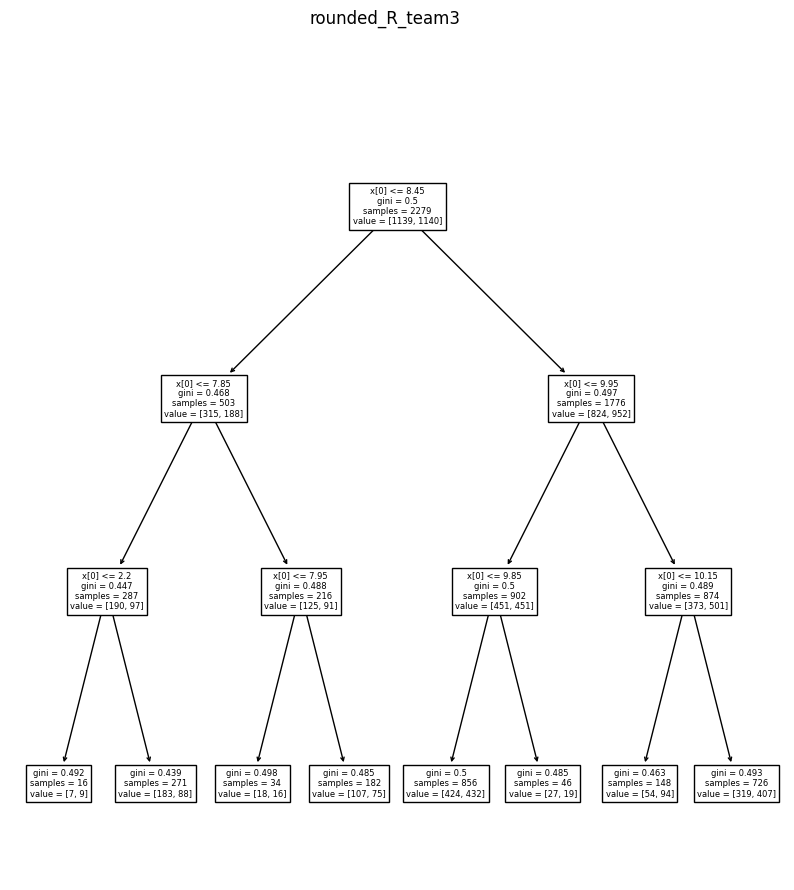

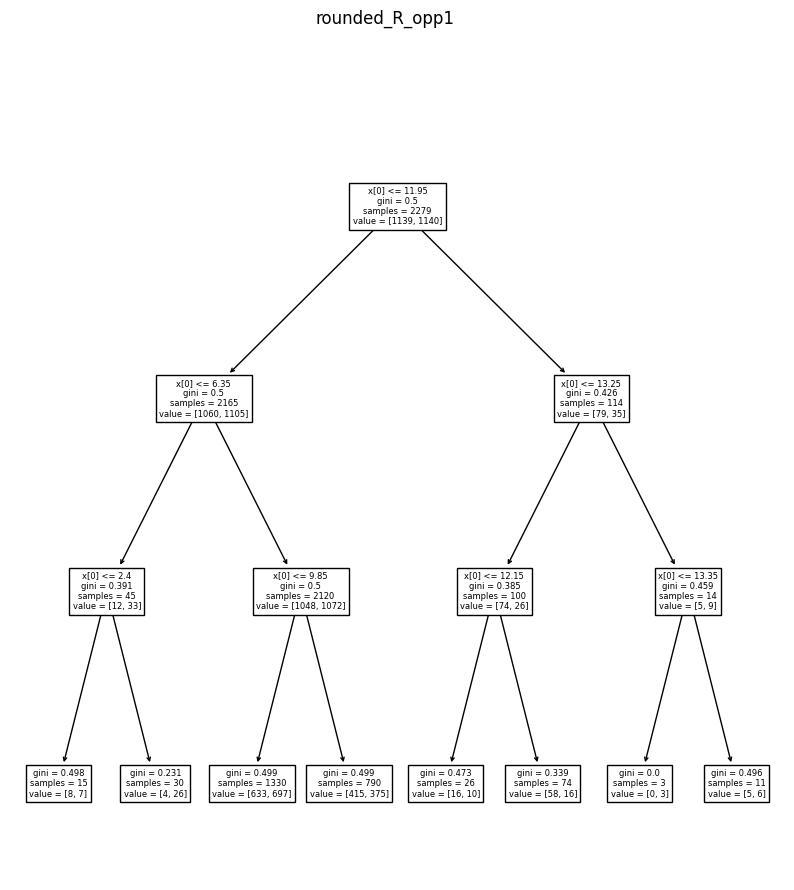

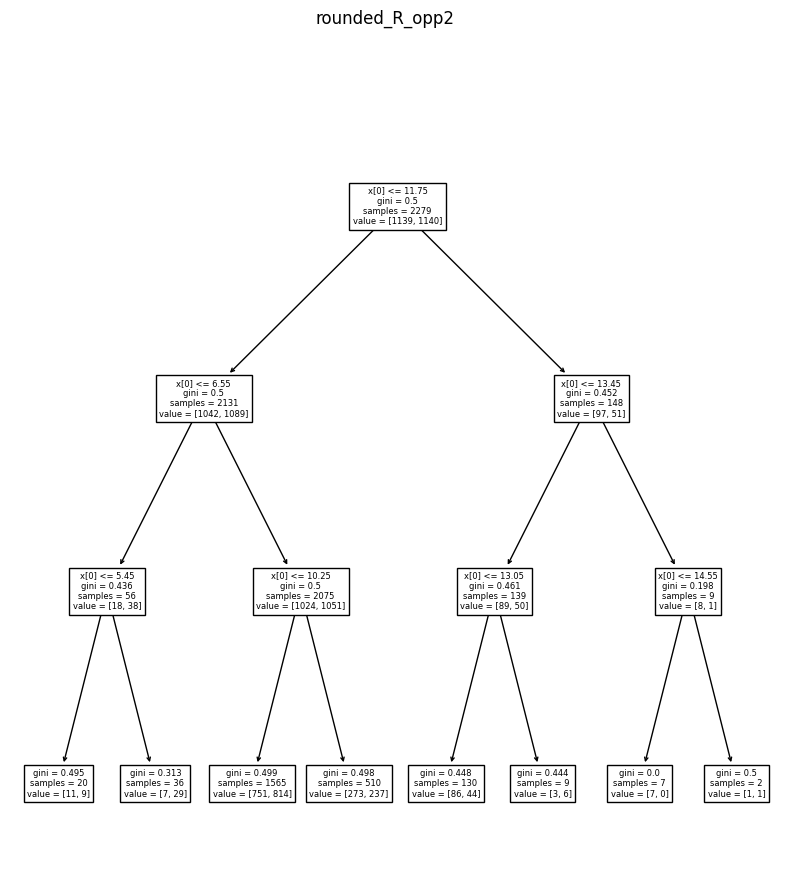

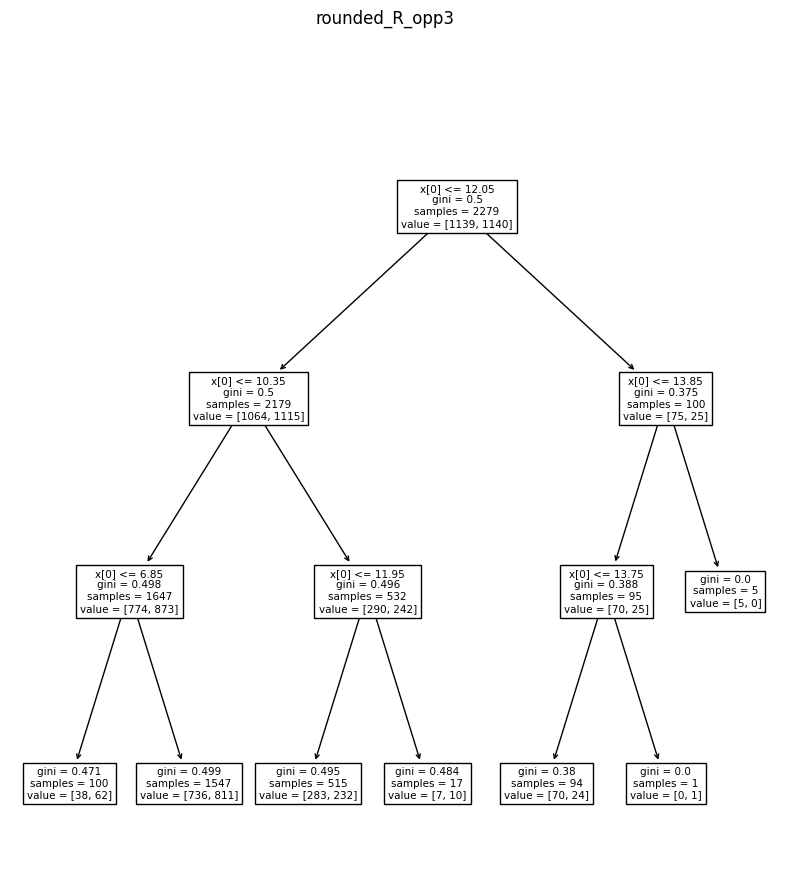

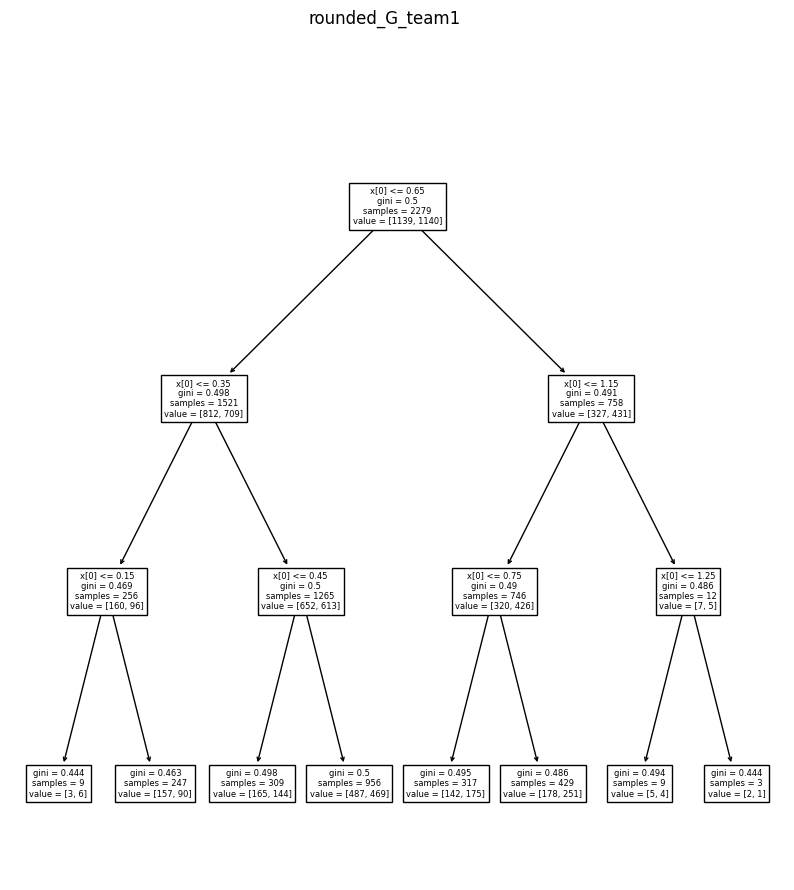

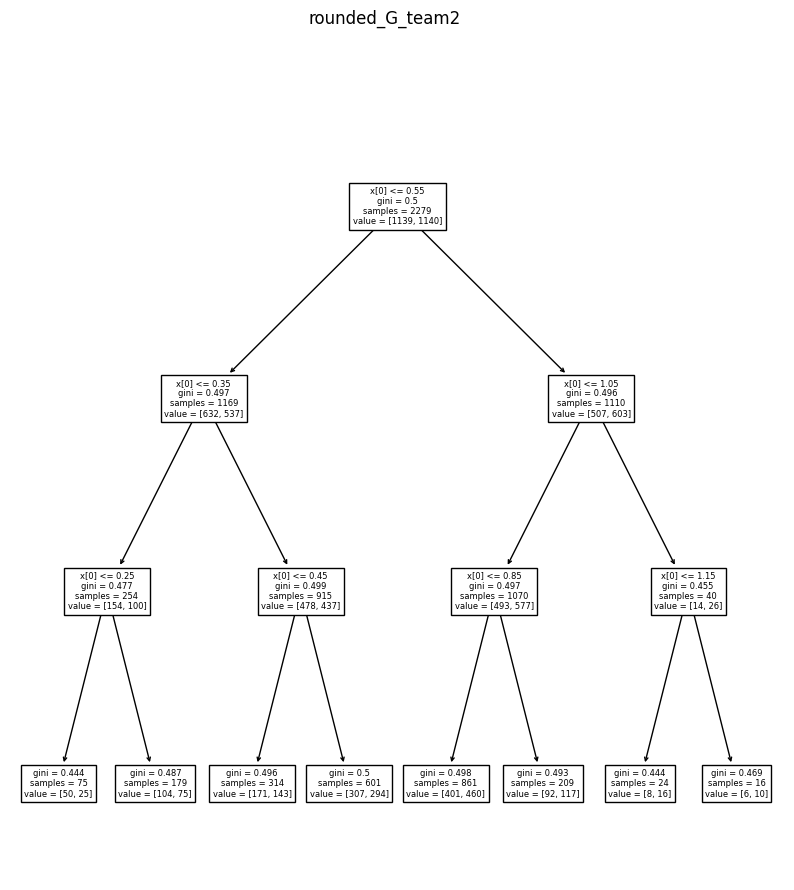

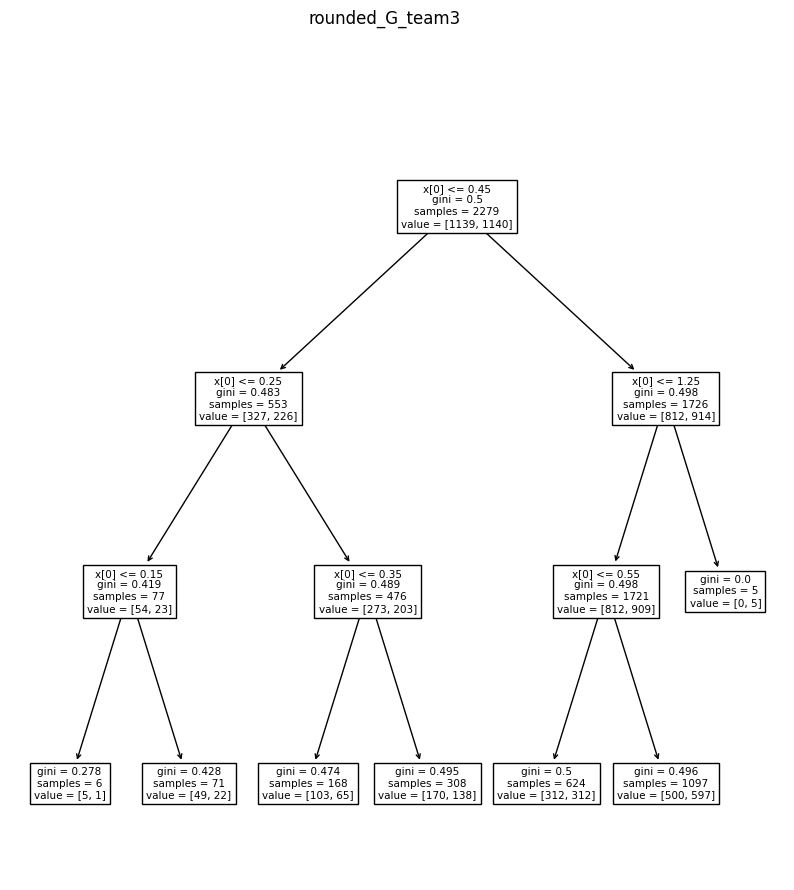

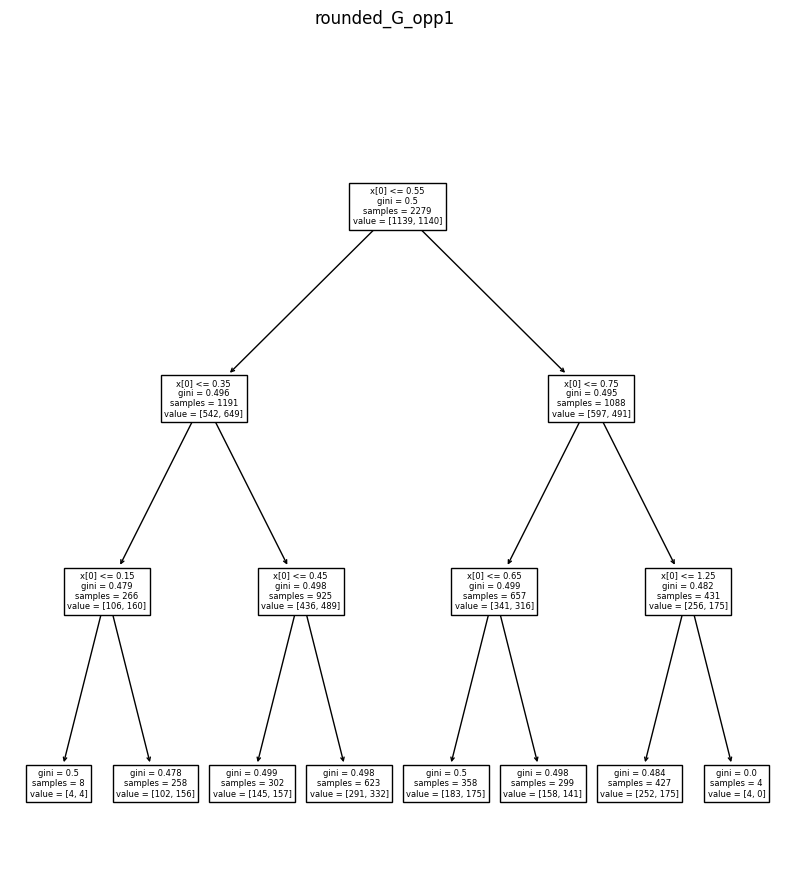

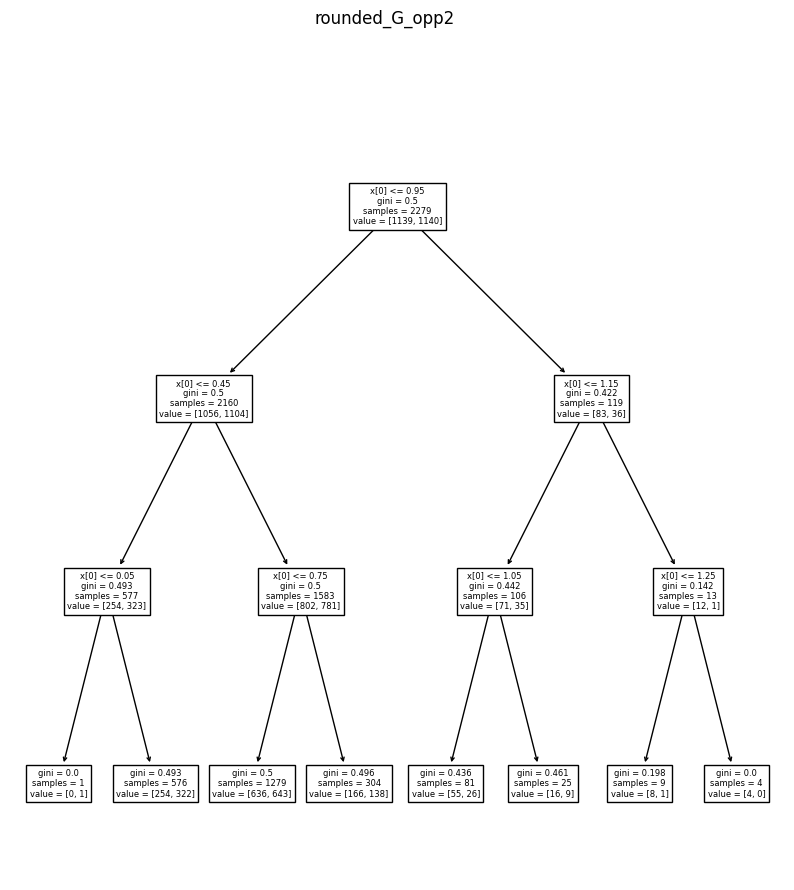

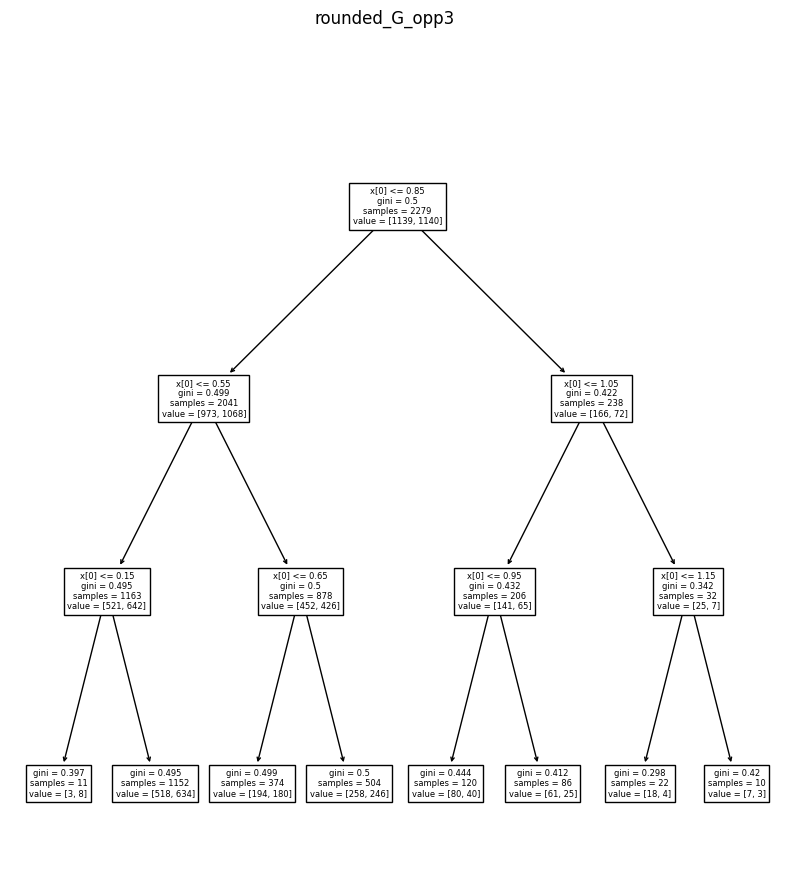

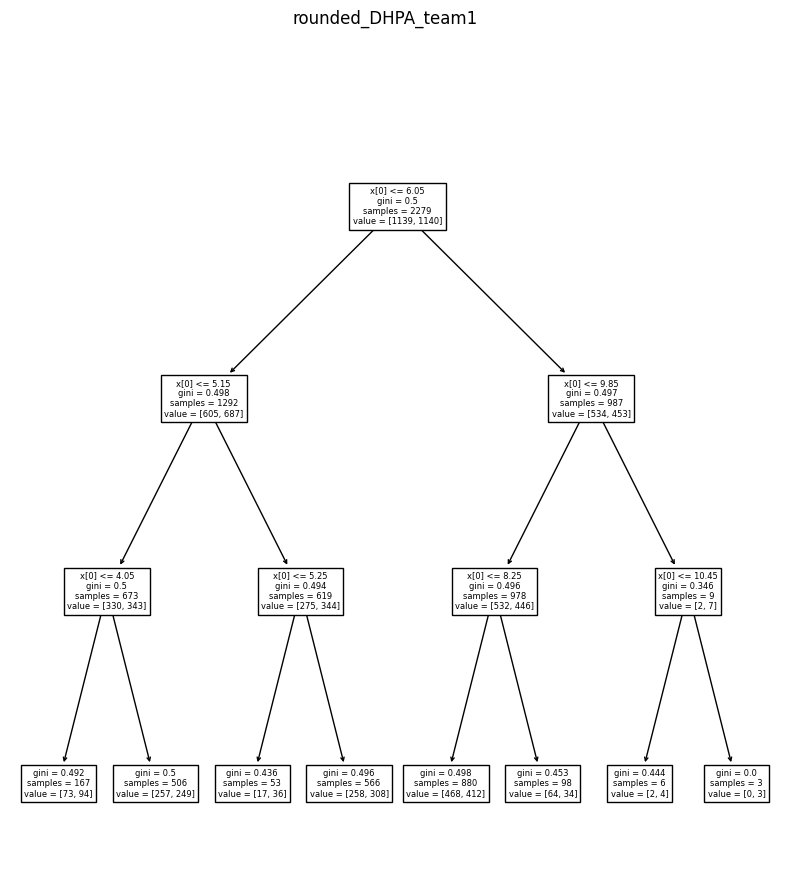

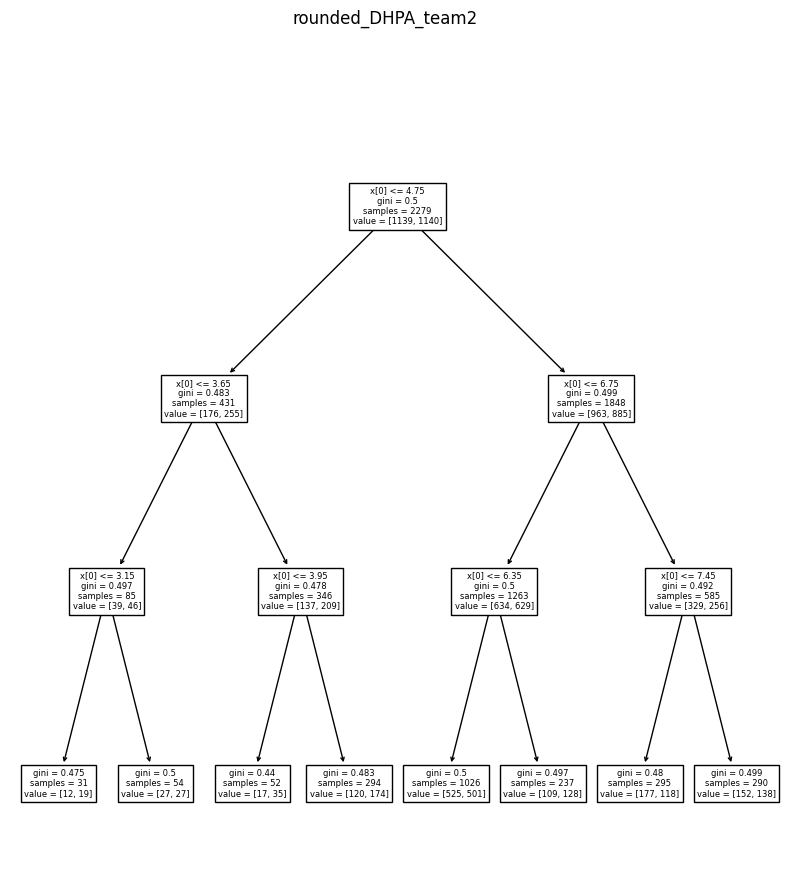

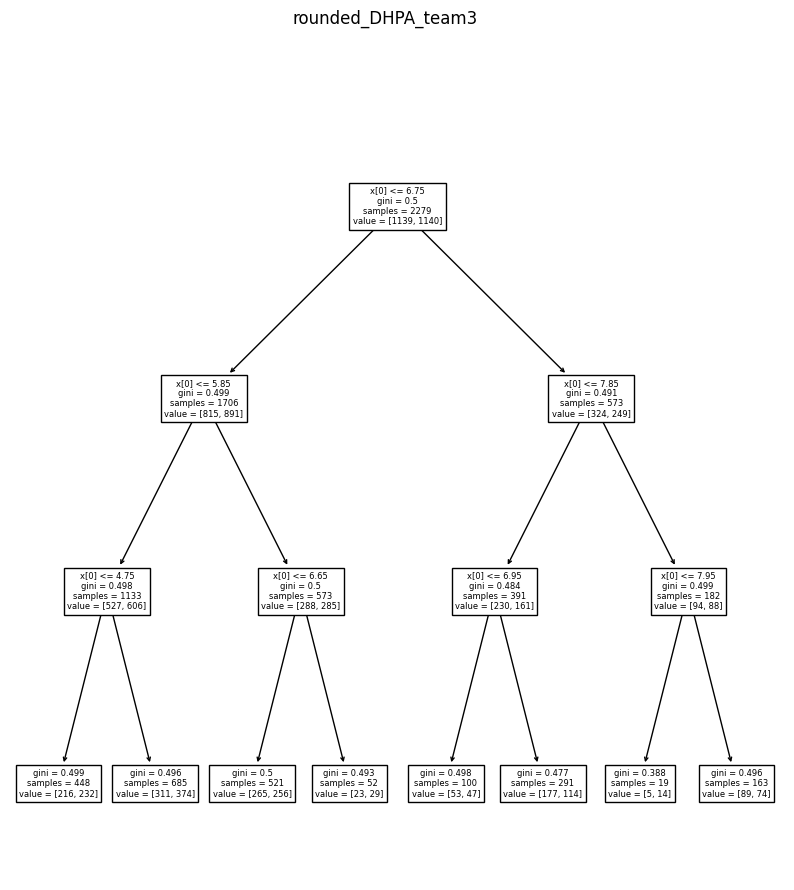

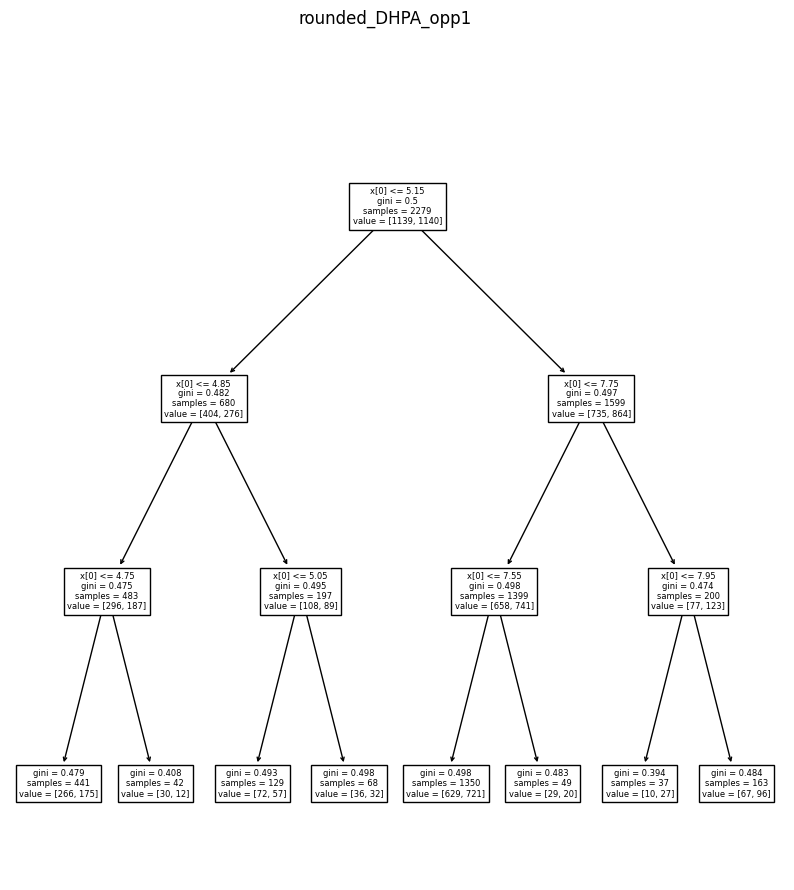

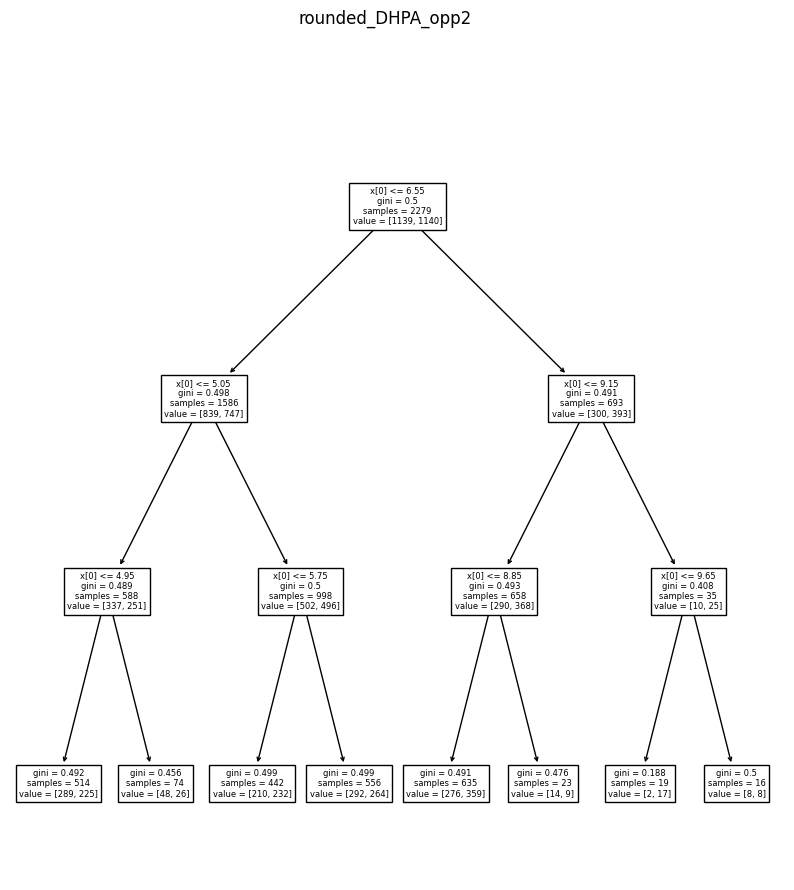

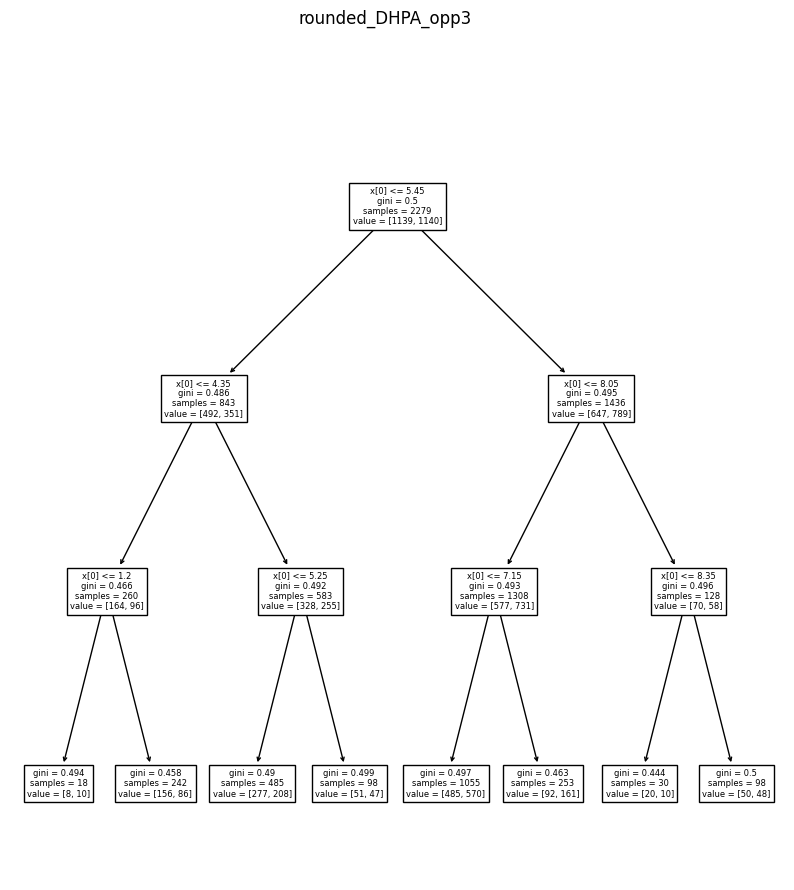

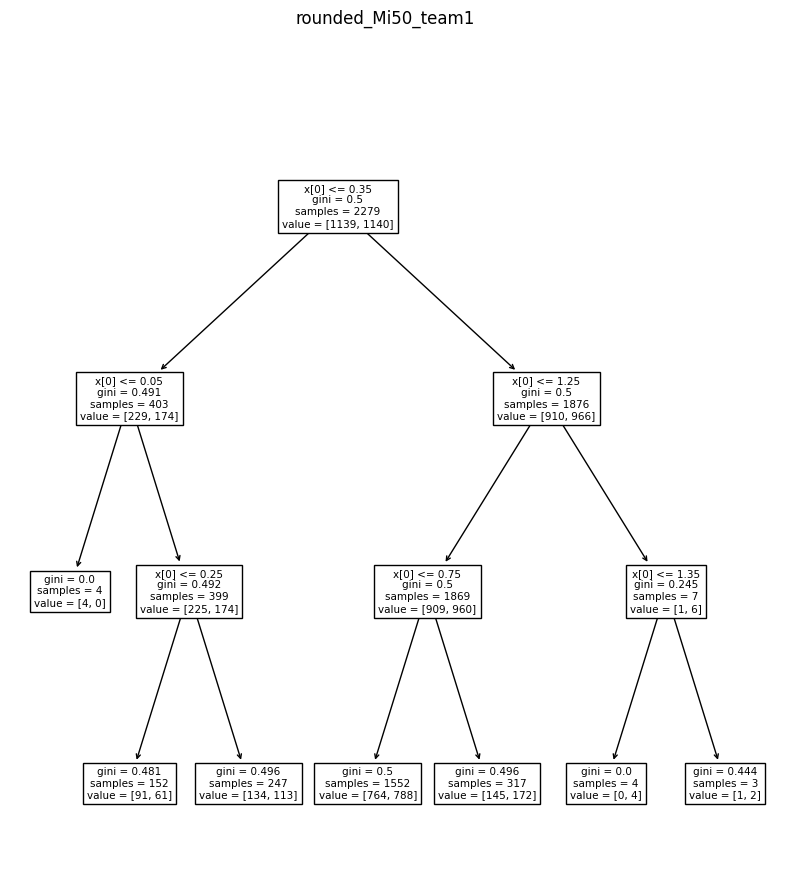

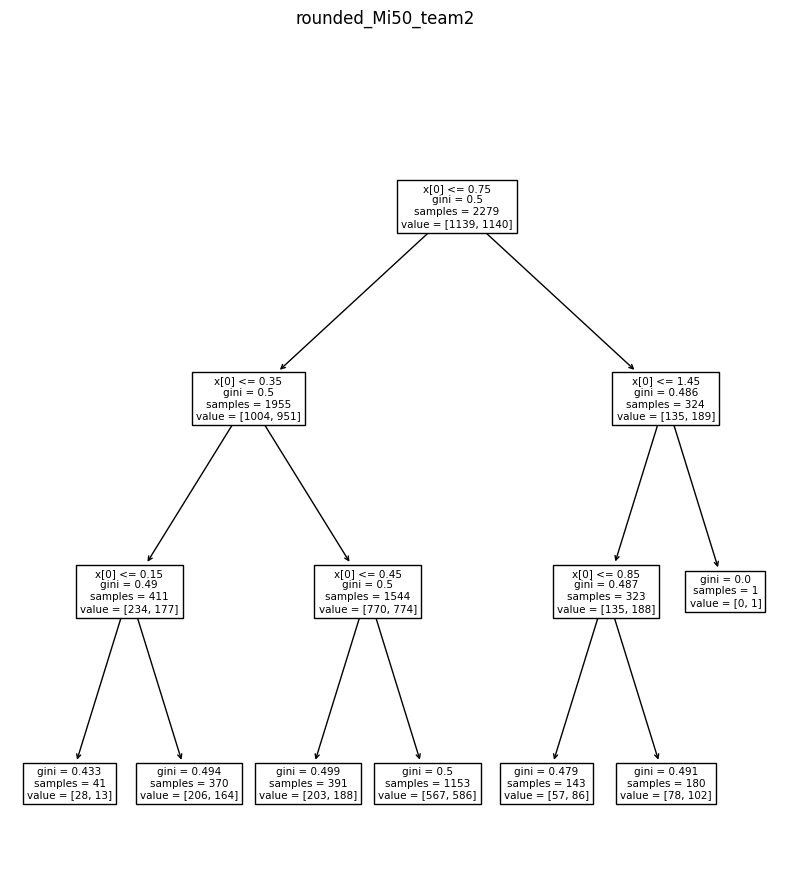

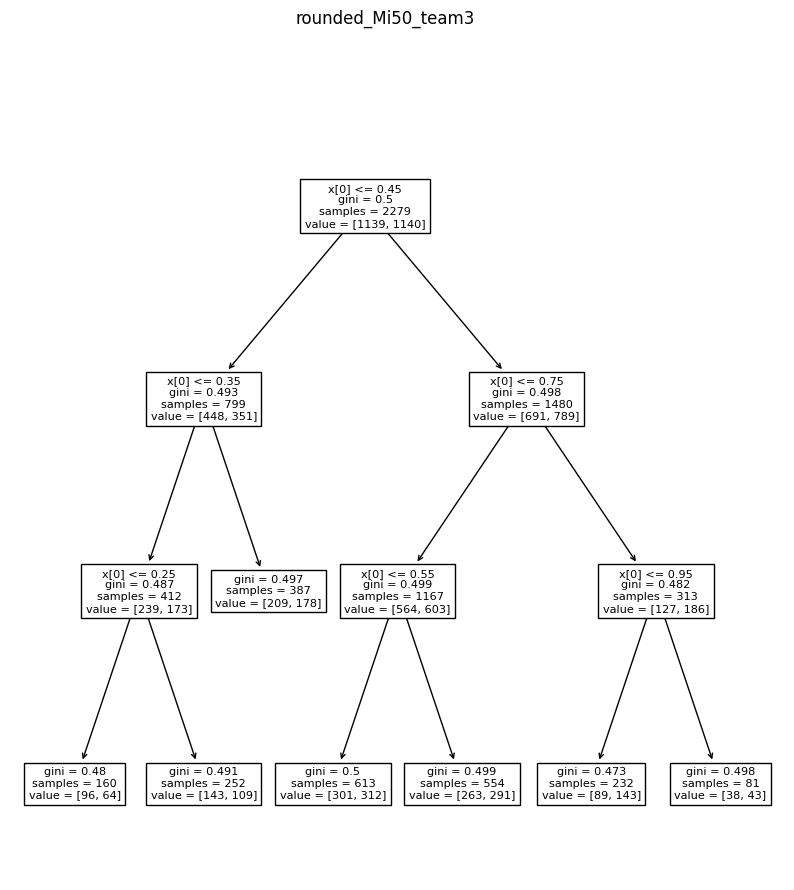

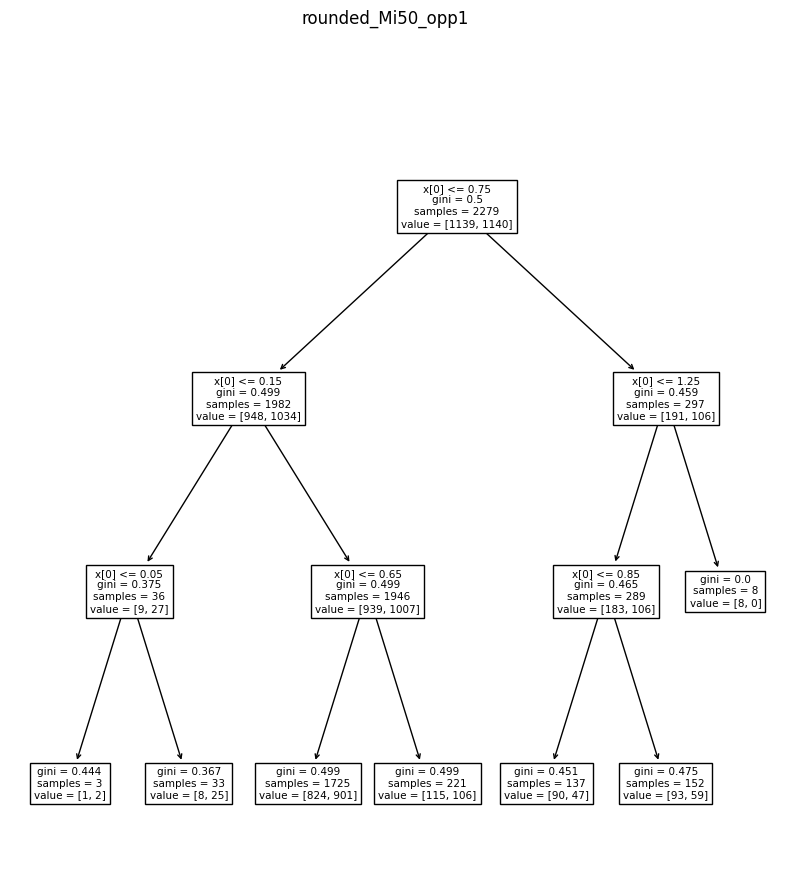

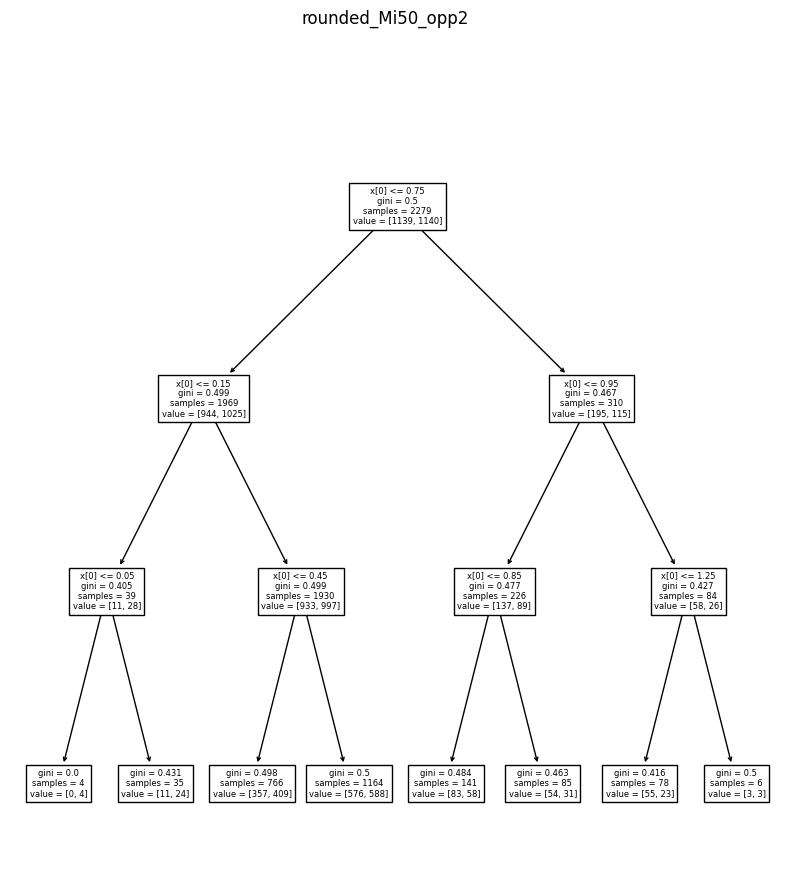

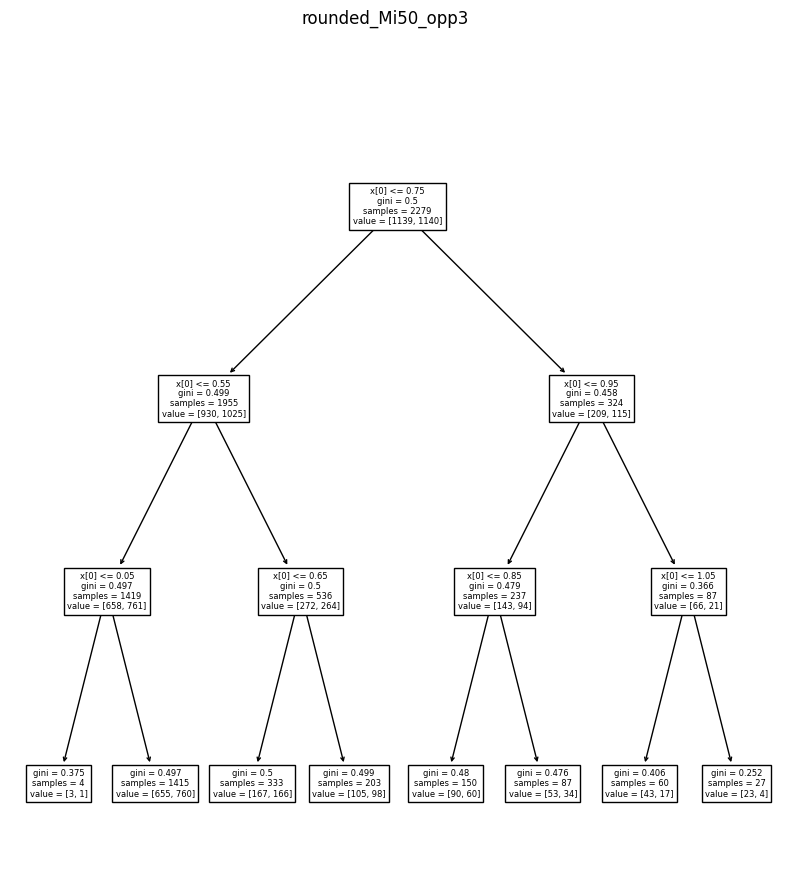

In [87]:
for col in num_cols:
    clf.fit(Xv2_train[col].values.reshape(-1,1),yv2_train)
    fig,ax = plt.subplots(figsize=(10,10))
    fig.suptitle(col)
    tree.plot_tree(clf,ax=ax)
    plt.show()

## Bin the Numeric variables

In [98]:
# SAG
bins_SAG = pd.IntervalIndex.from_tuples([(-np.inf, 0.8), (0.8, 1.0), (1.0, 1.25),(1.25,1.5),(1.5,np.inf)])
Xv2_train['SAG_team1_binned'] = pd.cut(Xv2_train['SAG_team1'],bins_SAG)
Xv2_train['SAG_team2_binned'] = pd.cut(Xv2_train['SAG_team2'],bins_SAG)
Xv2_train['SAG_team3_binned'] = pd.cut(Xv2_train['SAG_team3'],bins_SAG)
Xv2_train['SAG_opp1_binned'] = pd.cut(Xv2_train['SAG_opp1'],bins_SAG)
Xv2_train['SAG_opp2_binned'] = pd.cut(Xv2_train['SAG_opp2'],bins_SAG)
Xv2_train['SAG_opp3_binned'] = pd.cut(Xv2_train['SAG_opp3'],bins_SAG)

#SL
bins_SL = pd.IntervalIndex.from_tuples([(-np.inf, 0.8), (0.8, 1.1),(1.1, 1.5),(1.5,1.7),(1.7,np.inf)])
Xv2_train['SL_team1_binned'] = pd.cut(Xv2_train['SL_team1'],bins_SL)
Xv2_train['SL_team2_binned'] = pd.cut(Xv2_train['SL_team2'],bins_SL)
Xv2_train['SL_team3_binned'] = pd.cut(Xv2_train['SL_team3'],bins_SL)
Xv2_train['SL_opp1_binned'] = pd.cut(Xv2_train['SL_opp1'],bins_SL)
Xv2_train['SL_opp2_binned'] = pd.cut(Xv2_train['SL_opp2'],bins_SL)
Xv2_train['SL_opp3_binned'] = pd.cut(Xv2_train['SL_opp3'],bins_SL)

#SI
bins_SI = pd.IntervalIndex.from_tuples([(-np.inf, 2.5), (2.5, 3.0),(3.0, 4.5),(4.5,5.5),(5.5,np.inf)])
Xv2_train['SI_team1_binned'] = pd.cut(Xv2_train['SI_team1'],bins_SI)
Xv2_train['SI_team2_binned'] = pd.cut(Xv2_train['SI_team2'],bins_SI)
Xv2_train['SI_team3_binned'] = pd.cut(Xv2_train['SI_team3'],bins_SI)
Xv2_train['SI_opp1_binned'] = pd.cut(Xv2_train['SI_opp1'],bins_SI)
Xv2_train['SI_opp2_binned'] = pd.cut(Xv2_train['SI_opp2'],bins_SI)
Xv2_train['SI_opp3_binned'] = pd.cut(Xv2_train['SI_opp3'],bins_SI)

#i50s
bins_i50s = pd.IntervalIndex.from_tuples([(-np.inf, 1.5), (1.5, 1.9),(1.9, 2.5),(2.5,3),(3,np.inf)])
Xv2_train['i50s_team1_binned'] = pd.cut(Xv2_train['i50s_team1'],bins_i50s)
Xv2_train['i50s_team2_binned'] = pd.cut(Xv2_train['i50s_team2'],bins_i50s)
Xv2_train['i50s_team3_binned'] = pd.cut(Xv2_train['i50s_team3'],bins_i50s)
Xv2_train['i50s_opp1_binned'] = pd.cut(Xv2_train['i50s_opp1'],bins_i50s)
Xv2_train['i50s_opp2_binned'] = pd.cut(Xv2_train['i50s_opp2'],bins_i50s)
Xv2_train['i50s_opp3_binned'] = pd.cut(Xv2_train['i50s_opp3'],bins_i50s)

#R
bins_R = pd.IntervalIndex.from_tuples([(-np.inf, 7.5), (7.5, 8.5),(8.5, 10),(10,12),(12,np.inf)])
Xv2_train['R_team1_binned'] = pd.cut(Xv2_train['R_team1'],bins_R)
Xv2_train['R_team2_binned'] = pd.cut(Xv2_train['R_team2'],bins_R)
Xv2_train['R_team3_binned'] = pd.cut(Xv2_train['R_team3'],bins_R)
Xv2_train['R_opp1_binned'] = pd.cut(Xv2_train['R_opp1'],bins_R)
Xv2_train['R_opp2_binned'] = pd.cut(Xv2_train['R_opp2'],bins_R)
Xv2_train['R_opp3_binned'] = pd.cut(Xv2_train['R_opp3'],bins_R)

#G
bins_G = pd.IntervalIndex.from_tuples([(-np.inf, 0.25), (0.25, 0.35),(0.35, 0.45),(0.45,0.6),(0.6,np.inf)])
Xv2_train['G_team1_binned'] = pd.cut(Xv2_train['G_team1'],bins_G)
Xv2_train['G_team2_binned'] = pd.cut(Xv2_train['G_team2'],bins_G)
Xv2_train['G_team3_binned'] = pd.cut(Xv2_train['G_team3'],bins_G)
Xv2_train['G_opp1_binned'] = pd.cut(Xv2_train['G_opp1'],bins_G)
Xv2_train['G_opp2_binned'] = pd.cut(Xv2_train['G_opp2'],bins_G)
Xv2_train['G_opp3_binned'] = pd.cut(Xv2_train['G_opp3'],bins_G)

#DHPA
bins_DHPA = pd.IntervalIndex.from_tuples([(-np.inf, 4.5), (4.5, 5.5),(5.5, 6.5),(6.5,7.5),(7.5,np.inf)])
Xv2_train['DHPA_team1_binned'] = pd.cut(Xv2_train['DHPA_team1'],bins_DHPA)
Xv2_train['DHPA_team2_binned'] = pd.cut(Xv2_train['DHPA_team2'],bins_DHPA)
Xv2_train['DHPA_team3_binned'] = pd.cut(Xv2_train['DHPA_team3'],bins_DHPA)
Xv2_train['DHPA_opp1_binned'] = pd.cut(Xv2_train['DHPA_opp1'],bins_DHPA)
Xv2_train['DHPA_opp2_binned'] = pd.cut(Xv2_train['DHPA_opp2'],bins_DHPA)
Xv2_train['DHPA_opp3_binned'] = pd.cut(Xv2_train['DHPA_opp3'],bins_DHPA)

#Mi50
bins_Mi50 = pd.IntervalIndex.from_tuples([(-np.inf, 4.5), (4.5, 5.5),(5.5, 6.5),(6.5,7.5),(7.5,np.inf)])
Xv2_train['Mi50_team1_binned'] = pd.cut(Xv2_train['Mi50_team1'],bins_Mi50)
Xv2_train['Mi50_team2_binned'] = pd.cut(Xv2_train['Mi50_team2'],bins_Mi50)
Xv2_train['Mi50_team3_binned'] = pd.cut(Xv2_train['Mi50_team3'],bins_Mi50)
Xv2_train['Mi50_opp1_binned'] = pd.cut(Xv2_train['Mi50_opp1'],bins_Mi50)
Xv2_train['Mi50_opp2_binned'] = pd.cut(Xv2_train['Mi50_opp2'],bins_Mi50)
Xv2_train['Mi50_opp3_binned'] = pd.cut(Xv2_train['Mi50_opp3'],bins_Mi50)

In [101]:
#Join back on the outcome variable
Xv2_train = Xv2_train.drop('Outcome',axis=1)
Xv2_train = pd.concat([Xv2_train,yv2_train],axis=1)

## Logistic Regression

In [102]:
Xv2_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2279 entries, 4098 to 2638
Data columns (total 99 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Team               2279 non-null   object  
 1   Opponent           2279 non-null   object  
 2   SAG_team1          2279 non-null   float64 
 3   SAG_team2          2279 non-null   float64 
 4   SAG_team3          2279 non-null   float64 
 5   SAG_opp1           2279 non-null   float64 
 6   SAG_opp2           2279 non-null   float64 
 7   SAG_opp3           2279 non-null   float64 
 8   SL_team1           2279 non-null   float64 
 9   SL_team2           2279 non-null   float64 
 10  SL_team3           2279 non-null   float64 
 11  SL_opp1            2279 non-null   float64 
 12  SL_opp2            2279 non-null   float64 
 13  SL_opp3            2279 non-null   float64 
 14  SI_team1           2279 non-null   float64 
 15  SI_team2           2279 non-null   float64 
 16  SI_team3

In [116]:
import statsmodels.formula.api as smf
log_reg = smf.logit("Outcome ~ SAG_team1_binned +\
SAG_opp3_binned + \
SL_team1_binned +\
SL_opp3_binned +\
SI_team1_binned + SI_team2_binned + SI_team3_binned +\
SI_opp1_binned + SI_opp2_binned + SI_opp3_binned +\
i50s_team1_binned + i50s_team3_binned +\
R_team3_binned", data=Xv2_train).fit()

Optimization terminated successfully.
         Current function value: 0.652513
         Iterations 6


In [117]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                 2279
Model:                          Logit   Df Residuals:                     2226
Method:                           MLE   Df Model:                           52
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                 0.05862
Time:                        23:21:53   Log-Likelihood:                -1487.1
converged:                       True   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                 7.798e-17
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -0.8469      0.643     -1.317      0.188      -2.107       0.